## <p style="background-color:#18ffff; font-family:newtimeroman; color:#black; font-size:200%; text-align:center; border-radius:10px 10px;">Analysis of US Citizens by Income Levels</p>

## <p style="background-color:#18ffff; font-family:newtimeroman; color:#black; font-size:175%; text-align:center; border-radius:10px 10px;">Introduction</p>

One of the most important components to any data science experiment that doesn’t get as much importance as it should is **``Exploratory Data Analysis (EDA)``**. In short, EDA is **``"A first look at the data"``**. It is a critical step in analyzing the data from an experiment. It is used to understand and summarize the content of the dataset to ensure that the features which we feed to our machine learning algorithms are refined and we get valid, correctly interpreted results.
In general, looking at a column of numbers or a whole spreadsheet and determining the important characteristics of the data can be very tedious and boring. Moreover, it is good practice to understand the problem statement and the data before you get your hands dirty, which in view, helps to gain a lot of insights. 

The adult dataset is from the 1996 Census database. It is also known as “Census Income” dataset. The problem statement here is how to explore and prepare the dataset for Machine Learning modelling where we may predict whether the income exceeds 50k a year or not based on the census data.

## <p style="background-color:#18ffff; font-family:newtimeroman; color:#black; font-size:175%; text-align:center; border-radius:10px 10px;">Aim of the Project</p>

Applying Exploratory Data Analysis (EDA) and preparing the data to implement the Machine Learning Algorithms;
1. Analyzing the characteristics of individuals according to income groups
2. Preparing data to create a model that will predict the income levels of people according to their characteristics (So the "salary" feature is the target feature)

## <p style="background-color:#18ffff; font-family:newtimeroman; color:#black; font-size:175%; text-align:center; border-radius:10px 10px;">Dataset Info</p>

The Census Income dataset has 32561 entries. Each entry contains the following information about an individual:

- **salary (target feature/label):** whether or not an individual makes more than $50,000 annually. (<= 50K, >50K)
- **age:** the age of an individual. (Integer greater than 0)
- **workclass:** a general term to represent the employment status of an individual. (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked)
- **fnlwgt:** this is the number of people the census believes the entry represents. People with similar demographic characteristics should have similar weights.  There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.(Integer greater than 0)
- **education:** the highest level of education achieved by an individual. (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.)
- **education-num:** the highest level of education achieved in numerical form. (Integer greater than 0)
- **marital-status:** marital status of an individual. Married-civ-spouse corresponds to a civilian spouse while Married-AF-spouse is a spouse in the Armed Forces. Married-spouse-absent includes married people living apart because either the husband or wife was employed and living at a considerable distance from home (Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse)
- **occupation:** the general type of occupation of an individual. (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces)
- **relationship:** represents what this individual is relative to others. For example an individual could be a Husband. Each entry only has one relationship attribute. (Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried)
- **race:** Descriptions of an individual’s race. (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)
- **sex:** the biological sex of the individual. (Male, female)
- **capital-gain:** capital gains for an individual. (Integer greater than or equal to 0)
- **capital-loss:** capital loss for an individual. (Integer greater than or equal to 0)
- **hours-per-week:** the hours an individual has reported to work per week. (continuous)
- **native-country:** country of origin for an individual (United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands)

Having examined the features above, it can be concluded that some of the variables, such as **``fnlwgt``** are not related directly to the target variable **``income``** and are not self-explanatory. Therefore, they can be removed from the Dataset if Machine Learning model will be built. The continuous variable **``fnlwgt``** represents final weight, which is the number of units in the target population that the responding unit represents. The variable **``education_num``** stands for the number of years of education in total, which is a continuous representation of the discrete variable education. The variable **``relationship``** represents the responding unit’s role in the family. **``capital_gain``** and **``capital_loss``** are income from investment sources other than wage/salary.

## <p style="background-color:#18ffff; font-family:newtimeroman; color:#black; font-size:175%; text-align:center; border-radius:10px 10px;">Importing Related Libraries</p>

**Once you've installed NumPy, Pandas, Matplotlib, Seaborn & other related libraries you need, you can import them as a library :**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns
from termcolor import colored

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
# to disable scientific notation 
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# to reset to the original settings we can use
# pd.reset_option('display.float_format', silent=True)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
def show_nulls(data):
    
    '''
    
    This function plots missing values for each column by observation in the dataset.
    
    ''' 
    plt.figure(figsize=(10, 5))

    sns.displot(data=data.isnull().melt(value_name="missing"),
                y="variable",
                hue="missing",
                multiple="fill",
                height=9.25)

    plt.axvline(0.2, color="r")
    plt.show()

In [3]:
def show_distribution(col):
    
    '''
    
    This function will prints a Histogram and box plot which are graphical representations 
    for the frequency of numeric data values. It aims to describe the data and explore 
    the central tendency and variability before using advanced statistical analysis techniques. 
    
    '''
    # Get statistics
    from termcolor import colored

    print(colored('Statistical Calculations :', 'red', attrs=['bold']))
    print(colored('-'*26, 'red', attrs=['bold']))    
    min_val = col.min()
    max_val = col.max()
    mean_val = col.mean()
    med_val = col.median()
    mod_val = col.mode()[0]

    print(colored('Minimum:{:>7.2f}\nMean:{:>10.2f}\nMedian:{:>8.2f}\nMode:{:>10.2f}\nMaximum:{:>7.2f}\n'.format(min_val,
                                                                                             mean_val,
                                                                                             med_val,
                                                                                             mod_val,
                                                                                             max_val), 'blue', attrs=['bold']))
    
    

    
    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize=(15, 15))

    # Plot the histogram   
    ax[0].hist(col, bins=30)
    ax[0].set_ylabel('Frequency', fontsize=10)

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val,  color='yellow',     linestyle='dashed', linewidth=2, label='Minimum')
    ax[0].axvline(x=mean_val, color='lightgreen', linestyle='dashed', linewidth=2, label='Mean')
    ax[0].axvline(x=med_val,  color='cyan',       linestyle='dashed', linewidth=2, label='Median')
    ax[0].axvline(x=mod_val,  color='purple',     linestyle='dashed', linewidth=2, label='Mode')
    ax[0].axvline(x=max_val,  color='red',        linestyle='dashed', linewidth=2, label='Maximum')
    ax[0].legend(loc='upper right')

    # Plot the boxplot   
    medianprops = dict(linestyle='-', linewidth=3, color='m')
    boxprops=dict(linestyle='-', linewidth=1.5)
    meanprops={"marker":"d", "markerfacecolor":"red", "markeredgecolor":"black", "markersize":"10"}
    flierprops={'marker': 'o', 'markersize': 8, 'markerfacecolor': 'fuchsia'}
    
    ax[1].boxplot(col, 
                  vert=False,
                  notch=True, 
                  patch_artist=False,
                  medianprops=medianprops,
                  flierprops=flierprops,
                  showmeans=True,
                  meanprops=meanprops)
    
    ax[1].set_xlabel('value', fontsize=10)
    

    # Add a title to the Figure
    fig.suptitle('Data Distribution', fontsize=15)

In [4]:
def show_density(col):
    
    '''
    
    This function plots a 'density plot' which is a representation of the distribution of a numeric variable and display it. 
    It uses a kernel density estimate to show the probability density function of the variable.
    
    '''    
    from matplotlib import pyplot as plt

    fig = plt.figure(figsize=(15, 5))

    # Plot density
    col.plot.density()

    # Add titles and labels
    plt.title('Data Density', fontsize=15)

    # Show the mean, median, and mode
    plt.axvline(x=col.mean(),    color='cyan',   linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(x=col.median(),  color='red',    linestyle='dashed', linewidth=2, label='Median')
    plt.axvline(x=col.mode()[0], color='yellow', linestyle='dashed', linewidth=2, label='Mode')
    plt.legend()

    # Show the figure
    plt.show()

In [5]:
def show_compare(df, col1, col2):
    
    '''
    This function makes comparison among subcategories of target variable according to another variable.
    ''' 
    from matplotlib.patches import Patch
    from matplotlib.lines import Line2D
    
    # Get statistics
    from termcolor import colored

    print(colored('Statistical Calculations :', 'red', attrs=['bold']))
    print(colored('-'*26, 'red', attrs=['bold']))
    min_val = df[col1].min()
    max_val = df[col1].max()
    mean_val = df[col1].mean()
    med_val = df[col1].median()
    mod_val = df[col1].mode()[0]

    print(colored('Minimum:{:>7.2f}\nMean:{:>10.2f}\nMedian:{:>8.2f}\nMode:{:>10.2f}\nMaximum:{:>7.2f}\n'.format(min_val,
                                                                                             mean_val,
                                                                                             med_val,
                                                                                             mod_val,
                                                                                             max_val), 'blue', attrs=['bold']))

    fig, ax = plt.subplots(figsize=(12, 6))

    ax = sns.kdeplot(data=df, x=col1, hue=col2, fill=True)
    
    plt.title("Data Density", fontsize=20, color="darkblue")
    ax.ticklabel_format(style='plain')

    h, l = ax.get_legend_handles_labels()

    legend_elements1 = [Line2D([0], [0], marker='s', color='lightblue', label=df[col2].unique()[0], markersize=15),
                       Line2D([0], [0], marker='s', color='orange', label=df[col2].unique()[1], markersize=15)]
    l1 = plt.legend(handles=legend_elements1, title='Salary Type', bbox_to_anchor=(0.84, 1))

    legend_elements2 = [Line2D([0], [0], color='green',  label='Overall Mean',   markersize=15, linestyle='dashed'),
                        Line2D([0], [0], color='blue',   label='Group Mean', markersize=15, linestyle='-'),
                        Line2D([0], [0],  color='orange', label='Group Mean', markersize=15, linestyle='-'),
                        Line2D([0], [0],  color='red',    label='Median', markersize=15, linestyle='dashed'),
                        Line2D([0], [0],  color='yellow', label="Mode",   markersize=15, linestyle='dashed')]
    l2 = plt.legend(handles=legend_elements2,
                    title=f"Overall Mean {round(df[col1].mean(), 2)}\
                    \nGroup Mean {round(df.groupby([col2])[col1].mean()[0], 2)}\
                    \nGroup Mean {round(df.groupby([col2])[col1].mean()[1], 2)}\
                    \nOverall Median {round(np.median(df[col1]), 2)}\
                    \nOverall Mode {round(df[col1].mode()[0], 2)}", 
                    bbox_to_anchor=(0.9, 0.81))

    plt.axvline(x=df[col1].mean(),    color='green',   linestyle='dashed', linewidth=2, label='Overall Mean')
    plt.axvline(x=df[col1].median(),  color='red',     linestyle='dashed', linewidth=2, label='Overall Median')
    plt.axvline(x=df[col1].mode()[0], color='yellow',  linestyle='dashed', linewidth=2, label='Overall Mode')
    
    
    group_mean1 = df.groupby([col2])[col1].mean()[0]
    group_mean2 = df.groupby([col2])[col1].mean()[1]
    
    plt.axvline(x=group_mean1, color='blue',  linestyle='-', linewidth=2, label='Group Mean')
    plt.axvline(x=group_mean2, color='orange',  linestyle='-', linewidth=2, label='Group Mean')    


    ax.add_artist(l1); # we need this because the 2nd call to legend() erases the first one

## <p style="background-color:#18ffff; font-family:newtimeroman; color:#black; font-size:175%; text-align:center; border-radius:10px 10px;">Reading the data from file</p>

In [6]:
df0 = pd.read_csv("adult_eda.csv", sep=",")
df = df0.copy()

## <p style="background-color:#18ffff; font-family:newtimeroman; color:#black; font-size:175%; text-align:center; border-radius:10px 10px;">Recognizing and Understanding Data</p>

### 1.Try to understand what the data looks like
- Check the head, shape, data-types of the features.
- Check if there are some dublicate rows or not. If there are, then drop them. 
- Check the statistical values of features.
- If needed, rename the columns' names for easy use. 
- Basically check the missing values.

**[head()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)** function is used to access the first n rows of a dataframe or series.

In [7]:
df.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors         13.000   
1   50  Self-emp-not-inc   83311  Bachelors         13.000   
2   38           Private  215646    HS-grad          9.000   
3   53           Private  234721       11th          7.000   
4   28           Private  338409  Bachelors         13.000   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country salary  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

The **[shape](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.shape.html)** attribute of pandas demonstrates the number of rows and columns as a tuple stored in the given DataFrame. 

In [8]:
df.shape

(32561, 15)

**There are 32561 samples in the dataset. There are 15 columns (features) in the dataset including both categorical and numerical ones.**

The **[info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)** method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

In [9]:
# Dataset information

print(colored('US Citizens Income Levels Dataset Information:\n', 'blue', attrs=['bold']))
df.info()

US Citizens Income Levels Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   31759 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    27493 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


**The columns of education-num and relationship seems to have missing values. However, we are not sure if the others have some inappropriate values.**

**[duplicated()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html)** method is used to find duplicate rows in a DataFrame. It returns a boolean series which identifies whether a row is duplicate or unique.

In [10]:
# Checking and detecting the duplicated rows

df.duplicated().value_counts()  

False    32537
True        24
dtype: int64

Pandas **[drop_duplicates()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html)** method helps in removing duplicates from the data frame.

In [11]:
# Drop duplicated rows with df.drop_duplicates(inplace=True) permanently

df.drop_duplicates(keep='first', inplace=True)  

In [12]:
# checking the shape of the dataset after droping the duplicated rows 

df.shape

(32537, 15)

**What happened? drop_duplicates did NOT work as expected. Why?**

In [13]:
t_df = df.select_dtypes(include=['object']).applymap(type)
t_df

workclass      education marital-status     occupation  \
0      <class 'str'>  <class 'str'>  <class 'str'>  <class 'str'>   
1      <class 'str'>  <class 'str'>  <class 'str'>  <class 'str'>   
2      <class 'str'>  <class 'str'>  <class 'str'>  <class 'str'>   
3      <class 'str'>  <class 'str'>  <class 'str'>  <class 'str'>   
4      <class 'str'>  <class 'str'>  <class 'str'>  <class 'str'>   
...              ...            ...            ...            ...   
32556  <class 'str'>  <class 'str'>  <class 'str'>  <class 'str'>   
32557  <class 'str'>  <class 'str'>  <class 'str'>  <class 'str'>   
32558  <class 'str'>  <class 'str'>  <class 'str'>  <class 'str'>   
32559  <class 'str'>  <class 'str'>  <class 'str'>  <class 'str'>   
32560  <class 'str'>  <class 'str'>  <class 'str'>  <class 'str'>   

          relationship           race            sex native-country  \
0        <class 'str'>  <class 'str'>  <class 'str'>  <class 'str'>   
1        <class 'str'>  <class 'str'>  <class 'str'>  <class 'str'>   
2        <class 'str'>  <class 'str'>  <class 'str'>  <class 'str'>   
3        <class 'str'>  <class 'str'>  <class 'str'>  <class 'str'>   
4        <class 'str'>  <class 'str'>  <class 'str'>  <class 'str'>   
...                ...            ...            ...            ...   
32556    <class 'str'>  <class 'str'>  <class 'str'>  <class 'str'>   
32557    <class 'str'>  <class 'str'>  <class 'str'>  <class 'str'>   
32558    <class 'str'>  <class 'str'>  <class 'str'>  <class 'str'>   
32559  <class 'float'>  <class 'str'>  <class 'str'>  <class 'str'>   
32560    <class 'str'>  <class 'str'>  <class 'str'>  <class 'str'>   

              salary  
0      <class 'str'>  
1      <class 'str'>  
2      <class 'str'>  
3      <class 'str'>  
4      <class 'str'>  
...              ...  
32556  <class 'str'>  
32557  <class 'str'>  
32558  <class 'str'>  
32559  <class 'str'>  
32560  <class 'str'>  

[32537 rows x 9 columns]

In [14]:
set(t_df["education"].values)

{str}

In [15]:
set(t_df["relationship"].values)

{float, str}

In [16]:
def check_obj_columns(df):
    '''
    Returns nothing or column/s which has/have mixed object types.
    
    '''    
    
    t_df = df.select_dtypes(include=['object']).applymap(type)
    for col in t_df:
        if len(set(t_df[col].values)) > 1:
            print("Column {} has mixed object types.".format(col))

In [17]:
check_obj_columns(df)

Column relationship has mixed object types.


**In this given case, the problem is the mixed types "relationship" column have. In Pandas the object type can hold different types which can create a tricky situation.**

In [18]:
df["relationship"]

0        Not-in-family
1              Husband
2        Not-in-family
3              Husband
4                 Wife
             ...      
32556             Wife
32557          Husband
32558        Unmarried
32559              NaN
32560             Wife
Name: relationship, Length: 32537, dtype: object

In [19]:
df["relationship"].value_counts(dropna=False)

Husband           13187
Not-in-family      8292
NaN                5064
Unmarried          3445
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [20]:
print(df.loc[32559]["relationship"])
type(df.loc[32559]["relationship"])

nan


float

**Some Remarks on Duplicated Values :** Duplicated values are not handled for now since there have been similarities among some features, such as "relationship and "marital-status", when their unique values are compared. After deciding which one is picked up for the analysis and handling NaN values, the consideration will be taken again.

The **[describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)** method computes and displays summary statistics for a Python dataframe. (It also operates on dataframe columns and Pandas series objects.) So if you have a Pandas dataframe or a Series object, you can use the describe method and it will calculate some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame. It analyzes both numeric and object series and also the DataFrame column sets of mixed data types.

In [21]:
# Descriptive Statistics of the dataset

df.describe().T

count       mean        std       min        25%  \
age            32537.000     38.586     13.638    17.000     28.000   
fnlwgt         32537.000 189780.849 105556.471 12285.000 117827.000   
education-num  31735.000     10.084      2.575     1.000      9.000   
capital-gain   32537.000   1078.444   7387.957     0.000      0.000   
capital-loss   32537.000     87.368    403.102     0.000      0.000   
hours-per-week 32537.000     40.440     12.347     1.000     40.000   

                      50%        75%         max  
age                37.000     48.000      90.000  
fnlwgt         178356.000 236993.000 1484705.000  
education-num      10.000     12.000      16.000  
capital-gain        0.000      0.000   99999.000  
capital-loss        0.000      0.000    4356.000  
hours-per-week     40.000     45.000      99.000

**Rename the features of;**

**``"education-num"``**, **``"marital-status"``**, **``"capital-gain"``**, **``"capital-loss"``**, **``"hours-per-week"``**, **``"native-country``**", and **``"sex"``** as
**``"education_num"``**, **``"marital_status"``**, **``"capital_gain"``**, **``"capital_loss"``**, **``"hours_per_week"``**, **``"native_country"``**, and **``"gender"``**, respectively and permanently.

Pandas **[rename()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html)** method is used to rename any index, column or row. Renaming of column can also be done by dataframe.

In [22]:
# Changing the names of some columns for convenience

df.rename(columns={"education-num" : "education_num",
                   "marital-status" : "marital_status",
                   "capital-gain" : "capital_gain",
                   "capital-loss": "capital_loss",
                   "hours-per-week" : "hours_per_week",
                   "native-country" : "native_country",
                   "sex" : "gender"},
          inplace = True)

Pandas **[isnull()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html)** & **[sum()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html)** together return the number of missing values in the columns of any given dataframe.

In [23]:
# Checking the sum of Missing Values per column

df.isnull().sum() 

age                  0
workclass            0
fnlwgt               0
education            0
education_num      802
marital_status       0
occupation           0
relationship      5064
race                 0
gender               0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country       0
salary               0
dtype: int64

In [24]:
# Check the Percentage of Missing Values for each column. len(df): 32537

df.isnull().sum() / df.shape[0] * 100  

age               0.000
workclass         0.000
fnlwgt            0.000
education         0.000
education_num     2.465
marital_status    0.000
occupation        0.000
relationship     15.564
race              0.000
gender            0.000
capital_gain      0.000
capital_loss      0.000
hours_per_week    0.000
native_country    0.000
salary            0.000
dtype: float64

In [25]:
print(colored('Missing Value Information Per Column:\n', 'blue', attrs=['bold']))
missing_count = df.isnull().sum()
missing_per = df.isnull().sum()/df.shape[0]*100

missing_df = pd.concat({"missing_count": missing_count, "missing_percentage": missing_per}, axis=1)
missing_df

Missing Value Information Per Column:



missing_count  missing_percentage
age                         0               0.000
workclass                   0               0.000
fnlwgt                      0               0.000
education                   0               0.000
education_num             802               2.465
marital_status              0               0.000
occupation                  0               0.000
relationship             5064              15.564
race                        0               0.000
gender                      0               0.000
capital_gain                0               0.000
capital_loss                0               0.000
hours_per_week              0               0.000
native_country              0               0.000
salary                      0               0.000

<Figure size 1000x500 with 0 Axes>

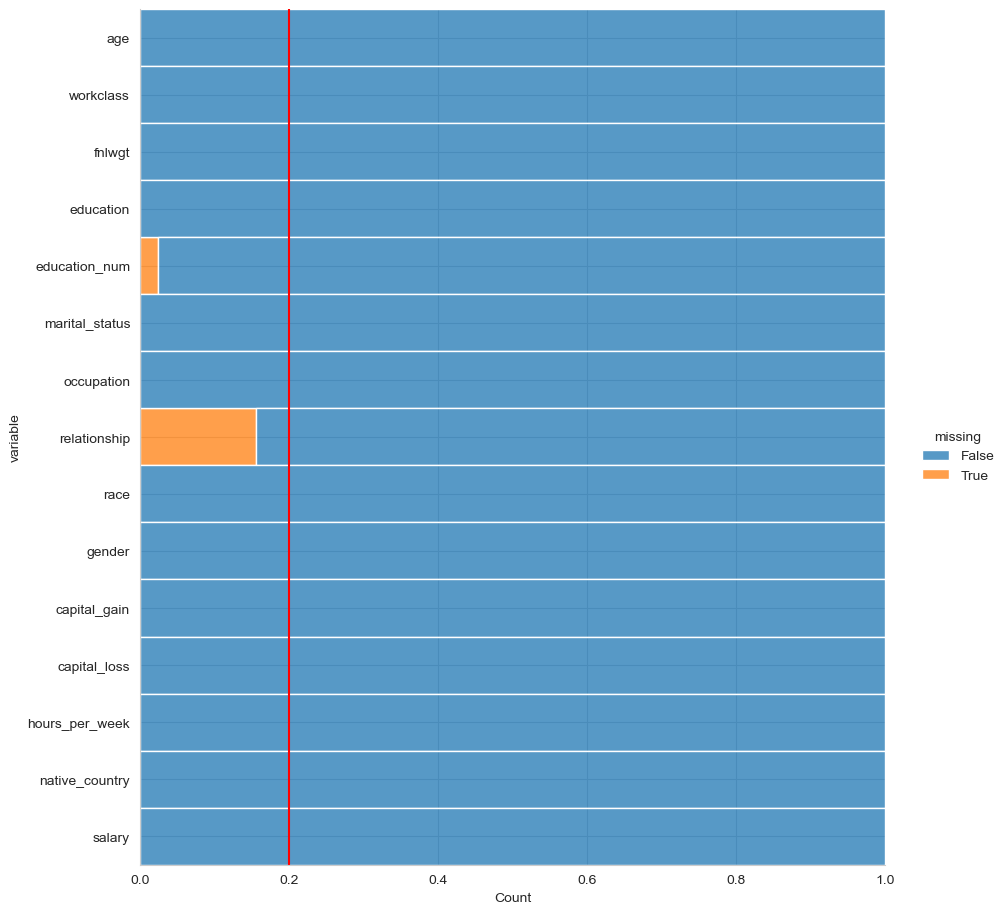

In [26]:
show_nulls(df)

**Some Remarks on Missing Values:** There is a high number of missing values in the Relationship column. People might prefer not to disclose their relationships in the family or hesitate to answer as "not-in-family", which might be a sensitive/personal issue. Even if its percentage is small, Education column is also missing with the value of 2.5% of the inputs. There might be some individuals who never attended a school as there is no option given in the survey or they might hesitate to disclose their educational background.

### 2.Look at the value counts of columns that have object datatype and detect strange values apart from the NaN Values

Pandas **[columns](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html)** attribute return the column labels of the given Dataframe.

In [27]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

In [28]:
# Descriptive Statistics of Categorical Features in the Dataset
# So we selected the categorical columns using the select_dtypes() function.

print(colored('Descriptive Statistics of Categorical Features:\n', 'blue', attrs=['bold']))
df.describe(include="object").T

Descriptive Statistics of Categorical Features:



count unique                 top   freq
workclass       32537      9             Private  22673
education       32537     16             HS-grad  10494
marital_status  32537      7  Married-civ-spouse  14970
occupation      32537     15      Prof-specialty   4136
relationship    27473      5             Husband  13187
race            32537      5               White  27795
gender          32537      2                Male  21775
native_country  32537     42       United-States  29153
salary          32537      2               <=50K  24698

The **[select_dtypes()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html)** method returns a new DataFrame that includes/excludes columns of the specified dtype(s). Use the include parameter to specify the included columns, or use the exclude parameter to specify which columns to exclude.

In [29]:
object_col = df.select_dtypes(include='object').columns
object_col

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'gender', 'native_country', 'salary'],
      dtype='object')

In [30]:
# Checking uniques and their numbers at Categorical Features in the Dataset

for col in object_col:
    print(col)
    print("--"*13)
    print(df[col].value_counts(dropna=False))
    print("--"*20)

workclass
--------------------------
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
----------------------------------------
education
--------------------------
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64
----------------------------------------
marital_status
--------------------------
Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
M

The **[isin()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html)** method checks if the Dataframe contains the specified value(s).

It returns a DataFrame similar to the original DataFrame, but the original values have been replaced with True if the value was one of the specified values, otherwise False.

In [31]:
# Checking if any column includes "?" as an input

df[df.isin(['?'])].any()

age               False
workclass          True
fnlwgt            False
education         False
education_num     False
marital_status    False
occupation         True
relationship      False
race              False
gender            False
capital_gain      False
capital_loss      False
hours_per_week    False
native_country     True
salary            False
dtype: bool

In [32]:
df.isin(["?"]).sum(axis=0)

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
gender               0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     582
salary               0
dtype: int64

**Some Remarks on "?" Mark:** If the questions for the workclass, occupation, and native country columns are drop-down or multiple-choice style with the pre-determined answer choices, some people might not be able to fit in and/or might submit a question mark as their answers. There is another posibility that workclass and occupation items are not very clear to understand for some people.

**The important point** is that the incomplete/misleading data can only be discarded/excluded if the test suggest that they are **Missing Completely At Random (MCAR)**; otherwise, as a Data Analyst, we have to treat the data and cannot discard them to determine the underlying patterns in the dataset. This decision should be a part of our data screening process. 

## <p style="background-color:#18ffff; font-family:newtimeroman; color:#black; font-size:175%; text-align:center; border-radius:10px 10px;">Univariate & Multivariate Analysis</p>

Examine all features (first target feature("salary"), then numeric ones, lastly categoric ones) separetly from different aspects according to target feature.

**to-do list for numeric features:**
1. Check the boxplot to see extreme values 
2. Check the histplot/kdeplot to see distribution of feature
3. Check the statistical values
4. Check the boxplot and histplot/kdeplot by "salary" levels
5. Check the statistical values by "salary" levels
6. Write down the conclusions you draw from your analysis

**to-do list for categoric features:**
1. Find the features which contains similar values, examine the similarities and analyze them together 
2. Check the count/percentage of person in each categories and visualize it with a suitable plot
3. If need, decrease the number of categories by combining similar categories
4. Check the count of person in each "salary" levels by categories and visualize it with a suitable plot
5. Check the percentage distribution of person in each "salary" levels by categories and visualize it with suitable plot
6. Check the count of person in each categories by "salary" levels and visualize it with a suitable plot
7. Check the percentage distribution of person in each categories by "salary" levels and visualize it with suitable plot
8. Write down the conclusions you draw from your analysis

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">Salary (Target Feature)</p>

### Check the count of person in each "salary" levels and visualize it with a countplot

The **[value_counts()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html)** function is used to get a Series containing counts of unique values. The resulting object will be in descending order so that the first element is the most frequently-occurring element. Excludes NA values by default.

In [33]:
# Checking the counts of unique values in "salary" feature

df.salary.value_counts(dropna=False)

<=50K    24698
>50K      7839
Name: salary, dtype: int64

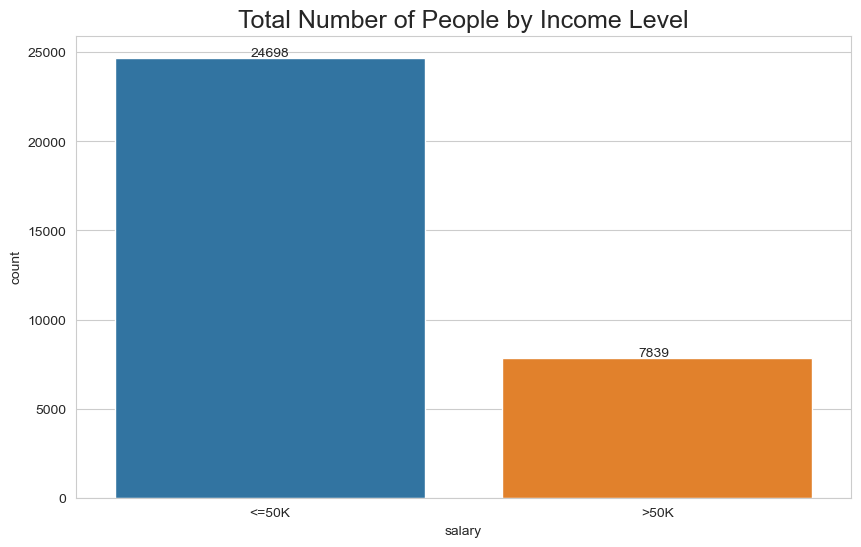

In [34]:
# Visualizing the number of people in each category of "salary"

fig, ax = plt.subplots()

ax = sns.countplot(data=df, x="salary")

ax.set_title("Total Number of People by Income Level", fontsize=18)

for p in ax.patches:
   ax.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+100));

The plot object has a method called ``containers`` that would list the properties of each bar. Iterate through the list items of the container object and pass each item to the **[bar_label](https://matplotlib.org/3.5.0/gallery/lines_bars_and_markers/bar_label_demo.html)** function. ``This will extract and display the bar value in the bar plot.``

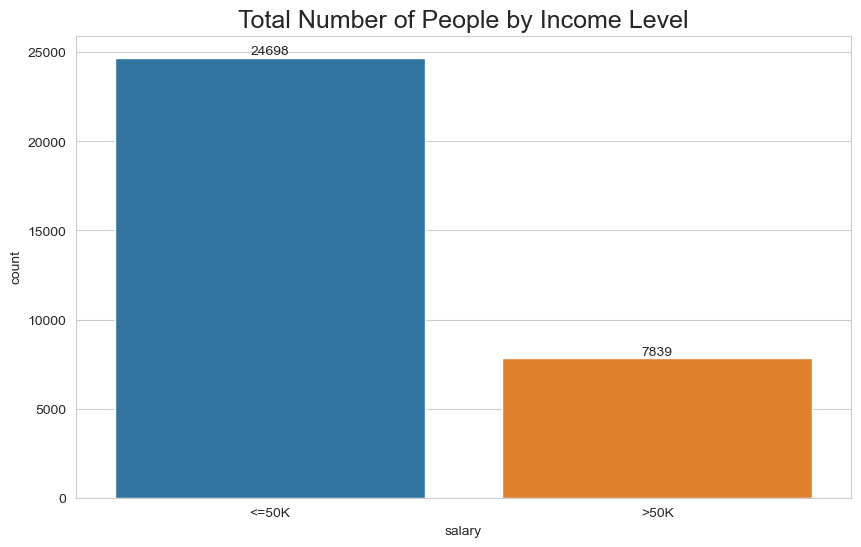

In [35]:
fig, ax = plt.subplots()

ax = sns.countplot(data=df, x="salary")

ax.set_title("Total Number of People by Income Level", fontsize=18)

for container in ax.containers:
    ax.bar_label(container);

### Check the percentage of person in each "salary" levels and visualize it with a pieplot

With **[normalize](https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.Series.value_counts.html#:~:text=With%20normalize%20set%20to%20True,by%20the%20sum%20of%20values.&text=Bins%20can%20be%20useful%20for,number%20of%20half%2Dopen%20bins.)** parameter set to ``True``, returns the ``relative frequency`` by dividing all values by the sum of values. 

In [36]:
# Checking the proportion of people who make above 50K and under 50K

df.salary.value_counts(normalize=True)

<=50K   0.759
>50K    0.241
Name: salary, dtype: float64

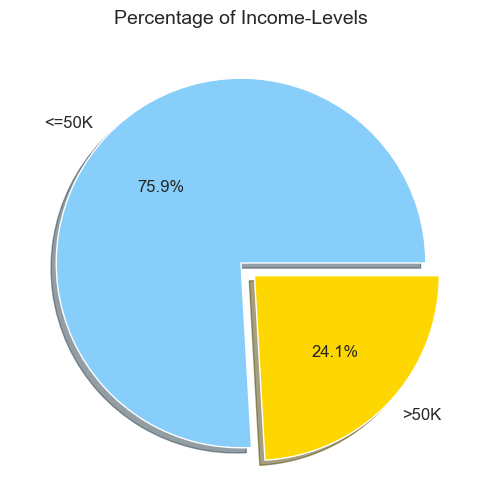

In [37]:
# Visualing the percentage of distribution in the salary feature

fig, ax = plt.subplots(figsize=(6, 6))

ax.pie(x=df.salary.value_counts().values, 
       labels=['<=50K', '>50K'], 
       autopct='%.1f%%',
       explode=(0, 0.1),
       colors=['lightskyblue', 'gold'],
       textprops={'fontsize': 12},
       shadow=True
       )
plt.title("Percentage of Income-Levels", fontdict={'fontsize': 14})
plt.show()

### Write down the conclusions you draw from your analysis

**Some Remarks on "salary" Feature:** As seen above, the number of people who earn 50K or less than 50K per year is way higher that the number of people who earn more than 50K per year in our sample. There are a lot more to investigate such as the educational background of our sample, number of hours worked per week, or age span to understand the results better. However, it is clearly concluded that 25% of the individuals in the dataset are at the high-income level while others (75%) are at the low-income level.

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">Numeric Features</p>

### <div class="alert alert-info"><font color=black>age :</font></div>

### Check the boxplot to see extreme values

A **``boxplot``** is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are.

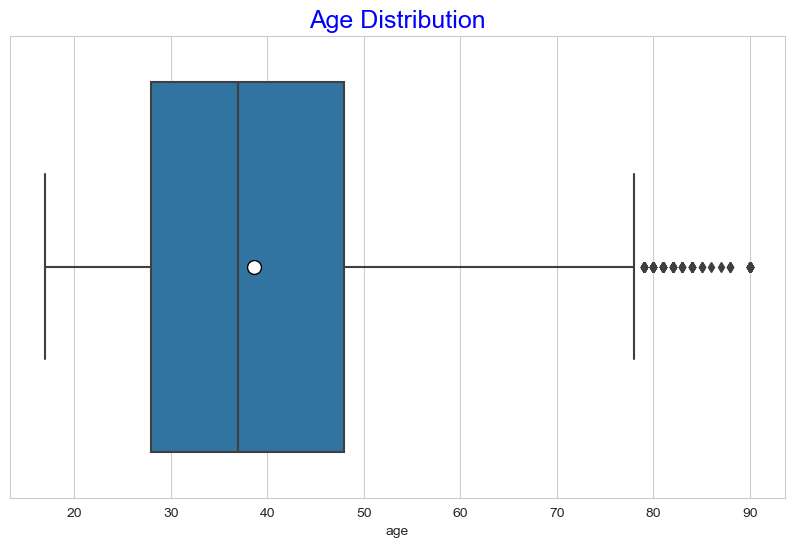

In [38]:
# Displaying the distribution of age feature with a box plot

sns.boxplot(data=df, 
            x="age",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

plt.title("Age Distribution", fontsize=18, color="b");

### Check the histplot/kdeplot to see distribution of feature

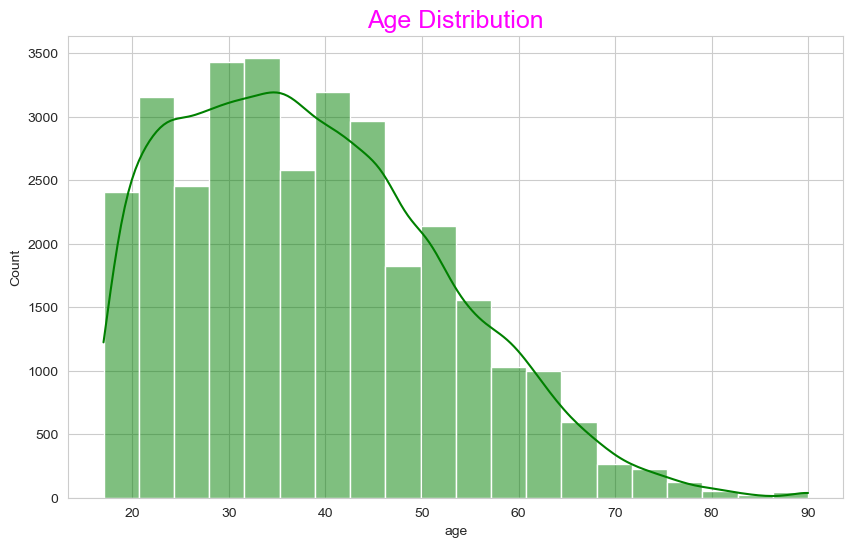

In [39]:
# Displaying the distribution of age feature with a histogram

sns.histplot(data=df, x="age", bins=20, kde=True, color="g")

plt.title("Age Distribution", fontsize=18, color="fuchsia");

### Check the statistical values

In [40]:
# Descriptive Statistics of "age" Feature

print(colored('Descriptive Statistics of the Age Feature:\n', 'blue', attrs=['bold']))
df.age.describe()

Descriptive Statistics of the Age Feature:



count   32537.000
mean       38.586
std        13.638
min        17.000
25%        28.000
50%        37.000
75%        48.000
max        90.000
Name: age, dtype: float64

Statistical Calculations :
--------------------------
Minimum:  17.00
Mean:     38.59
Median:   37.00
Mode:     36.00
Maximum:  90.00



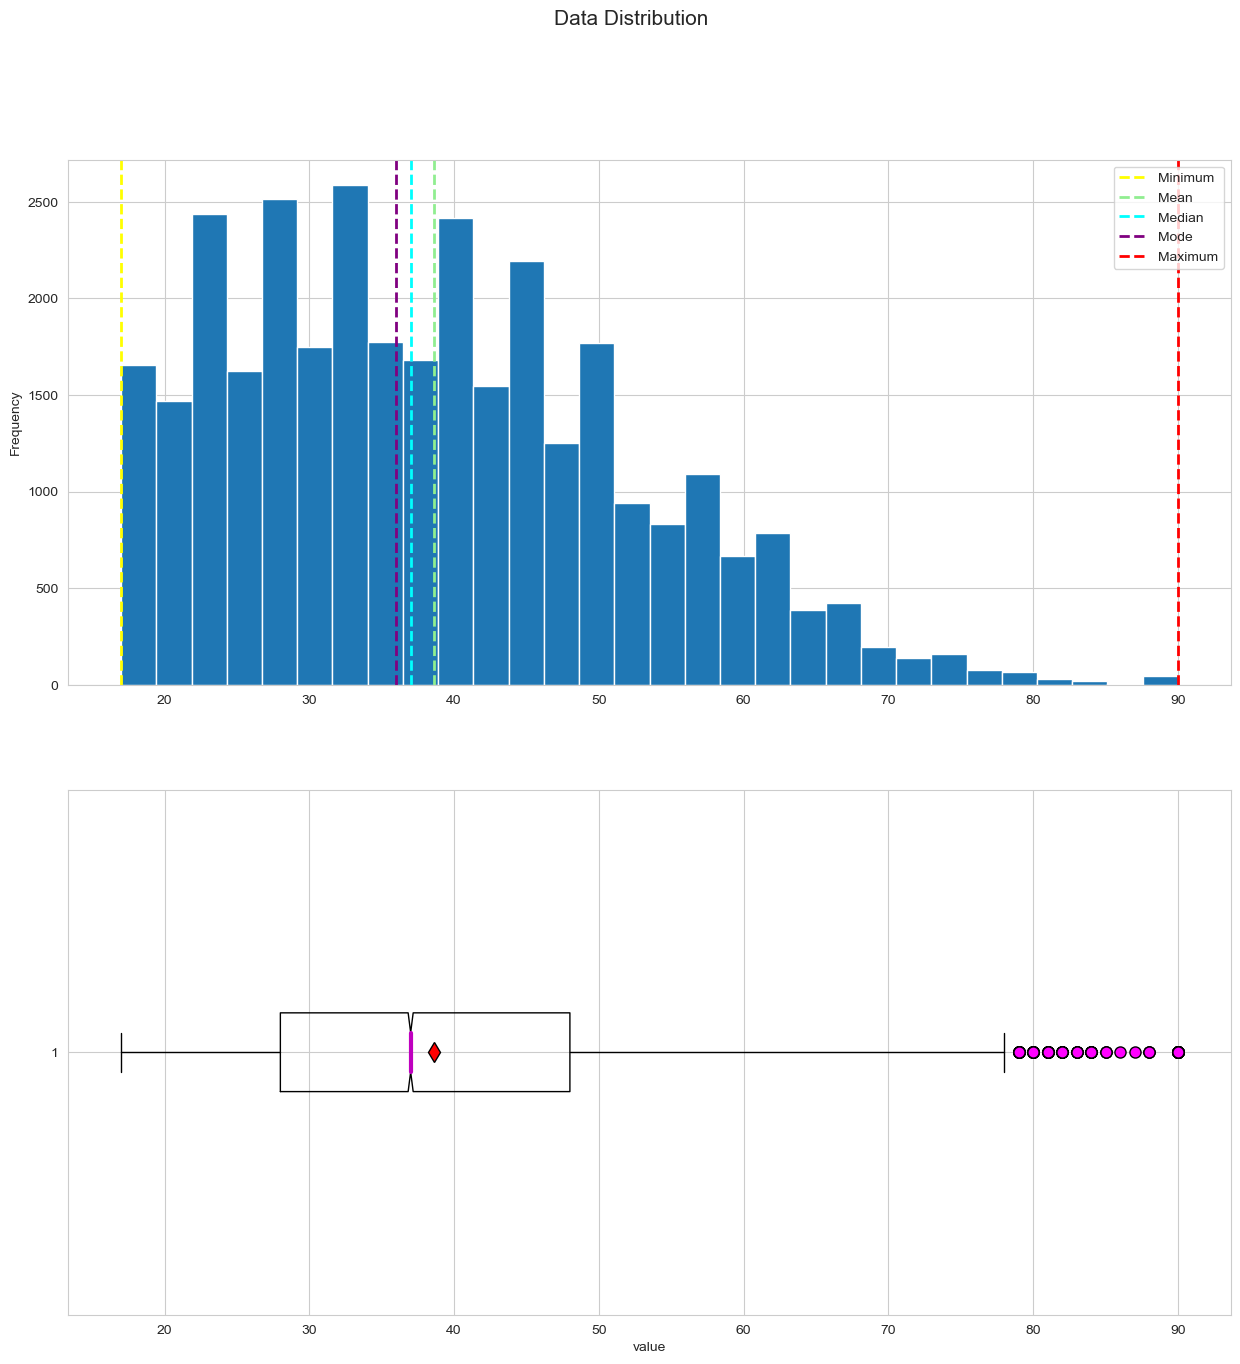

In [41]:
show_distribution(df["age"])

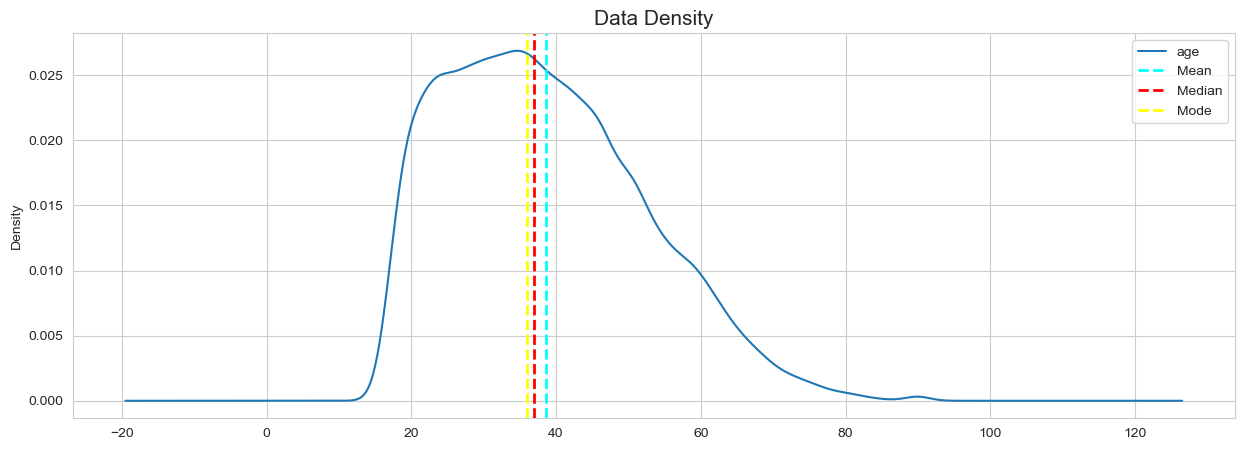

In [42]:
show_density(df["age"])

### Check the boxplot and histplot/kdeplot by "salary" levels

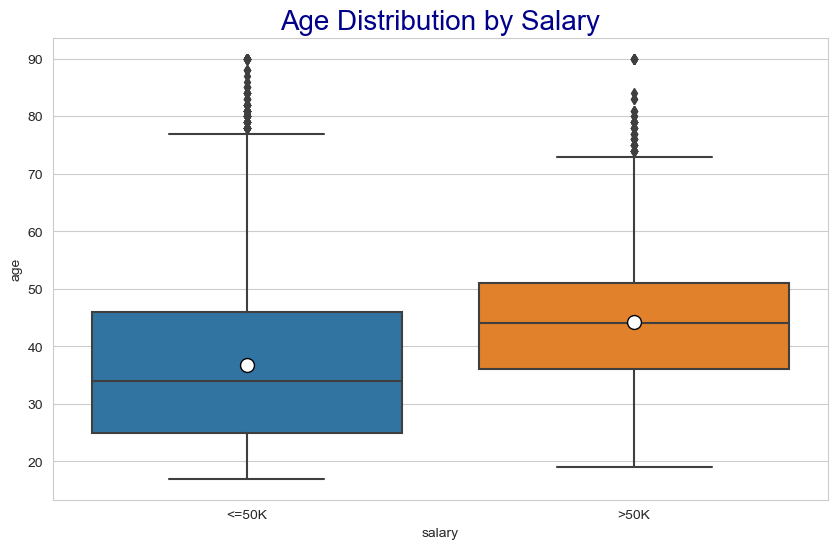

In [43]:
# Checking the extreme values in "age" feature by Salary with box plot

sns.boxplot(data=df, 
            x="salary", 
            y="age",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

plt.title("Age Distribution by Salary", fontsize=20, color="darkblue");

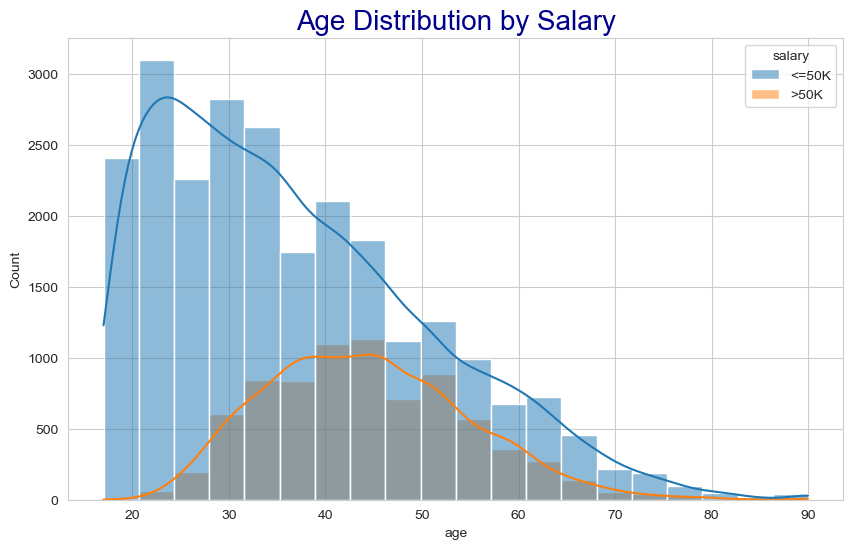

In [44]:
# Checking Density Distribution of "age" feature by Salary 

sns.histplot(data=df, x="age", bins=20, kde=True, hue="salary")

plt.title("Age Distribution by Salary", fontsize=20, color="darkblue");

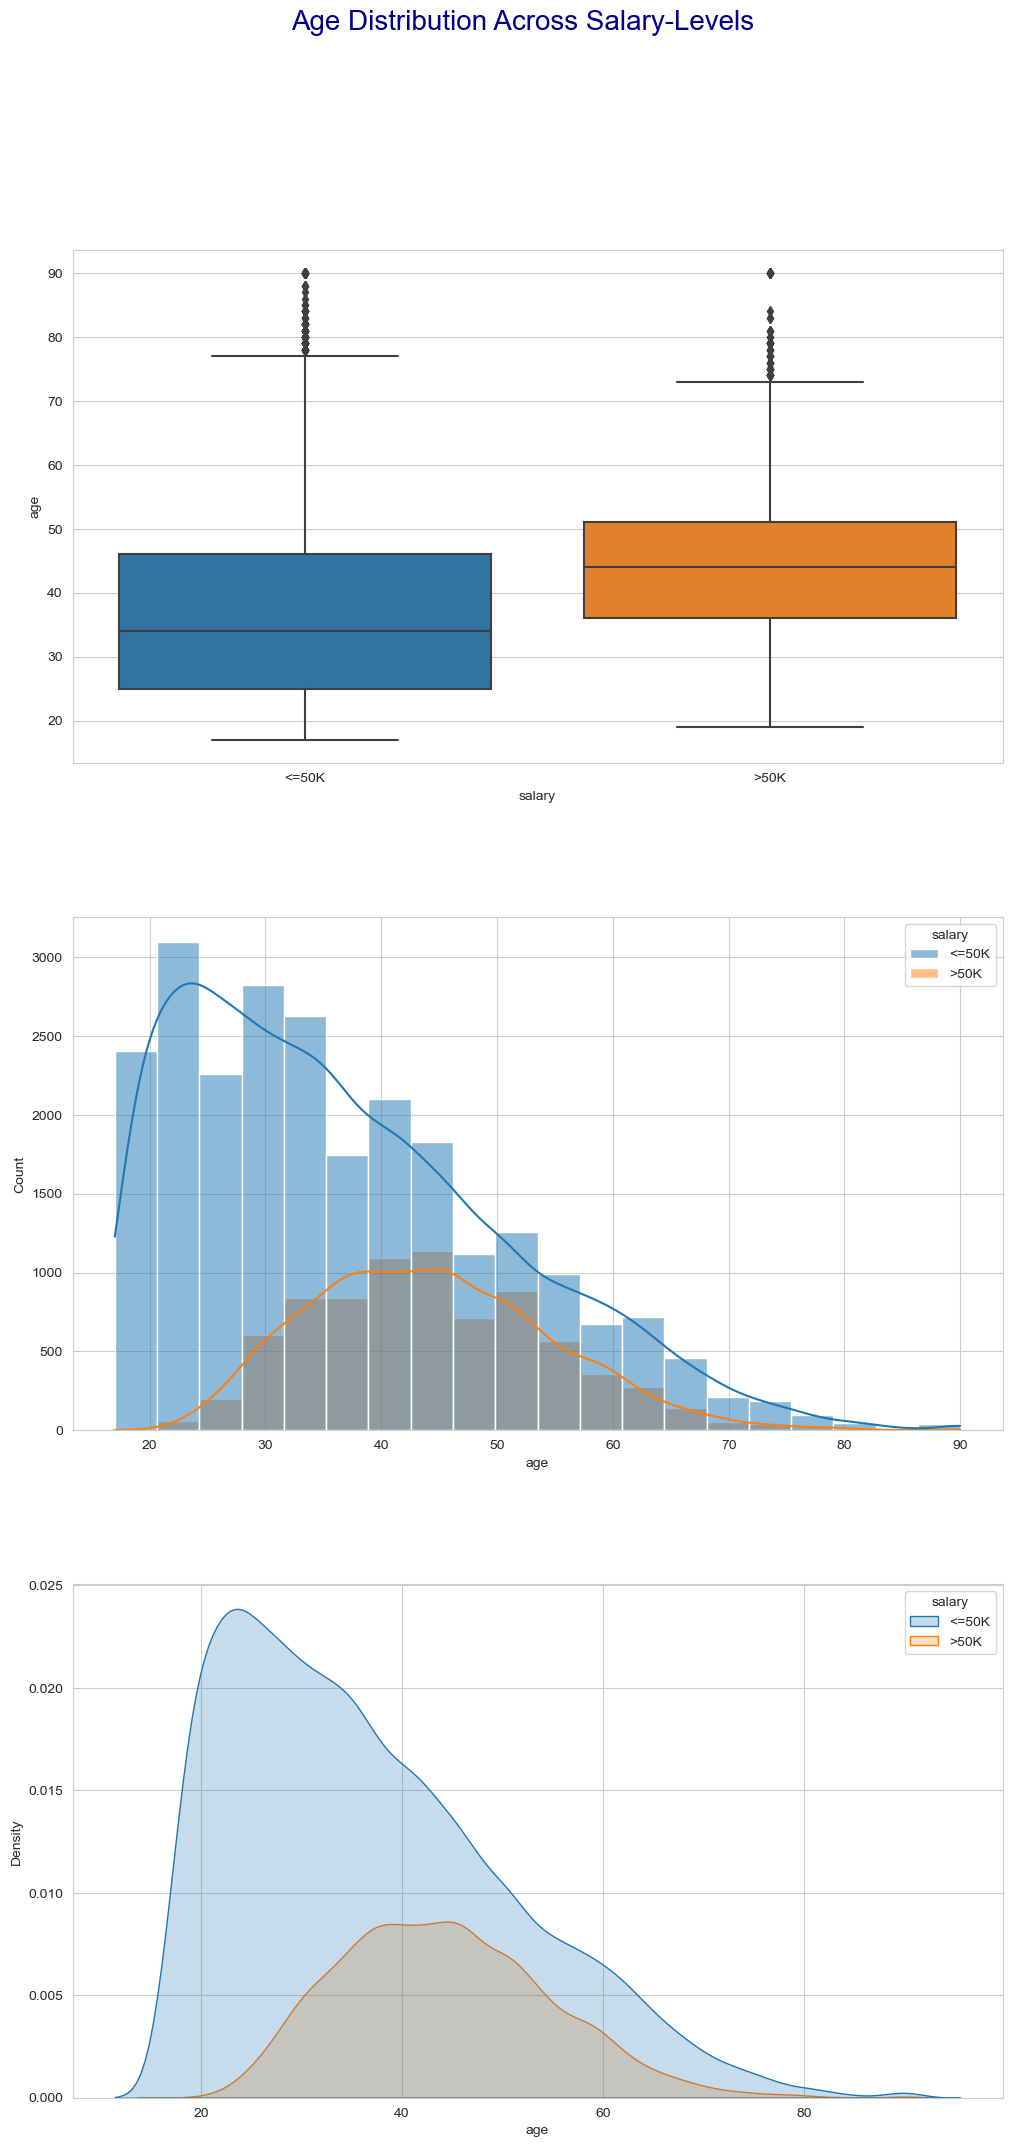

In [45]:
# Display age distribution across salary levels with a Box Plot, Histogram and KDE Plot

fig, ax = plt.subplots(3,1, figsize=(12, 24))
fig.suptitle("Age Distribution Across Salary-Levels", fontsize=20, color="darkblue")

sns.boxplot(data=df, x="salary", y="age", ax=ax[0])
sns.histplot(data=df, x="age", hue="salary", kde=True, bins=20, ax=ax[1])
sns.kdeplot(data=df, x="age", hue="salary", shade=True, ax=ax[2])

plt.subplots_adjust(hspace=0.3)
plt.show()

### Check the statistical values by "salary" levels

In [46]:
# Descriptive Statistics of age with respect to salary levels

print(colored('Descriptive Statistics of the Age by Salary:\n', 'blue', attrs=['bold']))
df.groupby("salary").age.describe()

Descriptive Statistics of the Age by Salary:



count   mean    std    min    25%    50%    75%    max
salary                                                           
<=50K  24698.000 36.787 14.017 17.000 25.000 34.000 46.000 90.000
>50K    7839.000 44.251 10.520 19.000 36.000 44.000 51.000 90.000

Statistical Calculations :
--------------------------
Minimum:  17.00
Mean:     38.59
Median:   37.00
Mode:     36.00
Maximum:  90.00



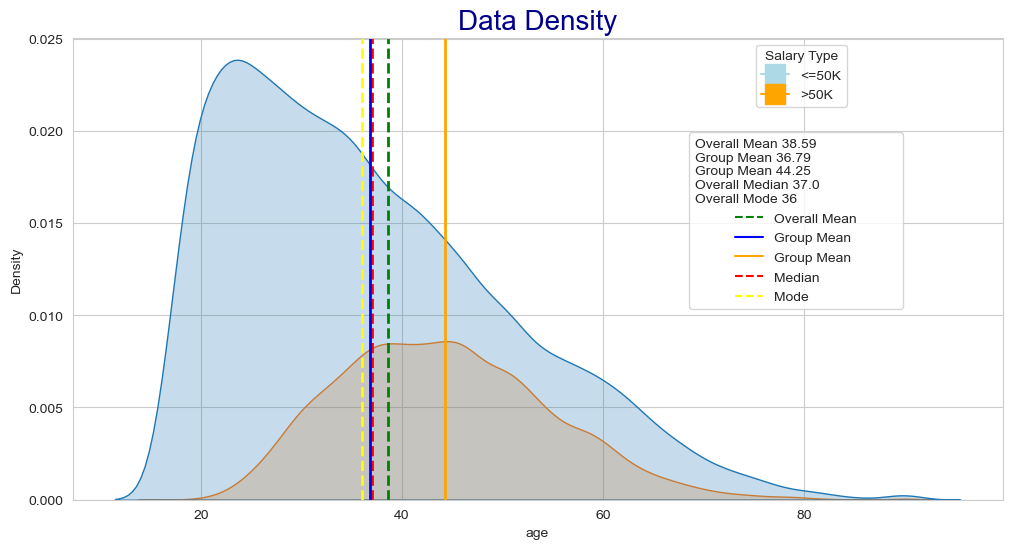

In [47]:
show_compare(df, "age", "salary")

### Write down the conclusions you draw from your analysis

**Some Remarks on "age" Feature:** 

**``First``**, ``the characteristics of the age column was investigated. Here are the findings:``

- There are some extreme values around/between the ages of 78-90.
- Mean is 38, and it is observed that majority of the people are between 28 and 48 years old.
- The age data is right skewed, which means that our sample is a young population as expected. Most people after the age of 65 will be retired and will no longer work.

**``Second``**, ``the age component was explored through the salary levels (<=50K and >50K) was explored:``

- Visuals revealed that the people who make less than or equal to 50K are a younger population than the people who make above 50K per year.
- The mean and median age of the high-income group is higher than the low-income group. It can be stated that the older generation possesses more wealth than the young. In other words, The average age of Americans who earn less than 50K is lower than those who earn over 50K. However, care should be taken when making such a comment of the older always earn more compared to the younger people or visa versa since there have been some extreme values showing that there are some observations between 80-90 years old and make less than 50K, and there are people who are below 30 years old and make more than 50K.
- When we consider histogram and kde plot, it is realized that both the age feature of both populations (who make <=50K and >50K) are right skewed while the population who make >50K is closer to a normal distribution.
- It is expected that the population who make less than 50K shows a stronger right-skewed graph. Younger people are less experienced or new graduates. As a result, they will earn less as seen on the graphs.
- Besides, it looks like people in almost every data point who earn less than 50K are younger than those in the high-income group. The difference in standard deviations of these 2 groups is not very large so it seems there is not much more difference between the mean and median for both groups, it can be stated that the average income increases by age. There is some gap between the 75% values and max values for each income group, which might be the indicator of extreme values (candidates of outliers). Therefore, there is a need to examine meticulously the boxplots for these features, salary & age, separately and together by means of domain knowledge obtained by the field/expertise.

### <div class="alert alert-info"><font color=black>fnlwgt :</font></div>

### Check the boxplot to see extreme values

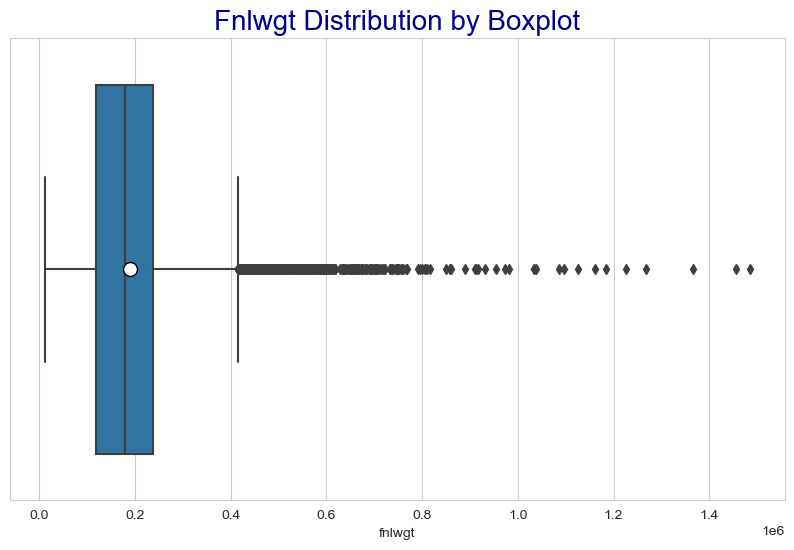

In [48]:
# Checking the extreme values in "fnlwgt" feature by means of box plot

sns.boxplot(data=df, 
            x="fnlwgt",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

plt.title("Fnlwgt Distribution by Boxplot", fontsize=20, color="darkblue");

### Check the histplot/kdeplot to see distribution of feature

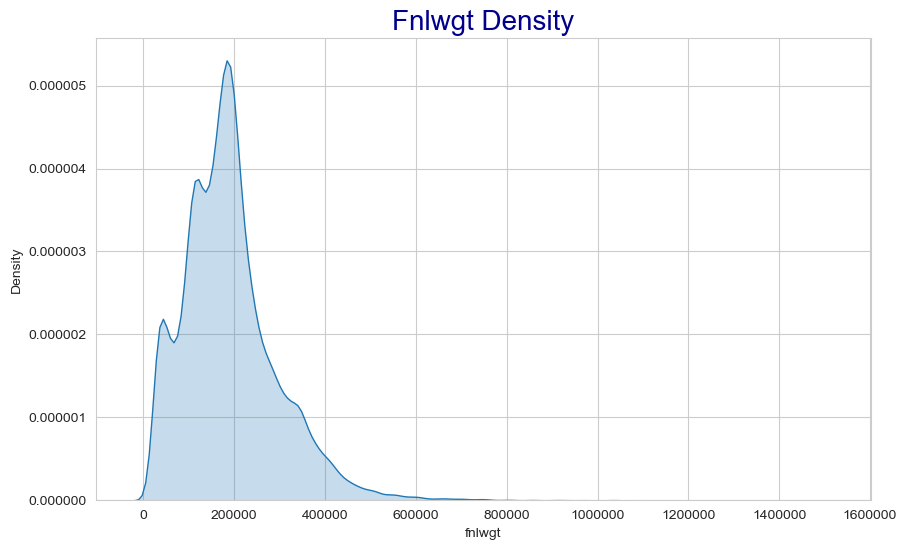

In [49]:
# Checking Density Distribution of "fnlwgt" feature 

sns.kdeplot(data=df, x="fnlwgt", fill=True)

plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.title("Fnlwgt Density", fontsize=20, color="darkblue");

### Prevent/Suppress Scientific Notation in Matplotlib

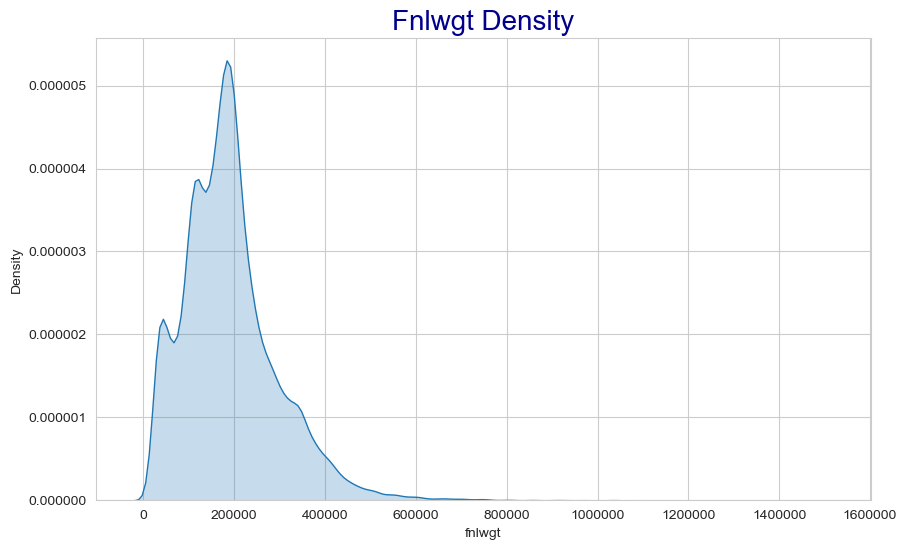

In [50]:
# The First Approach to Prevent/Suppress Scientific Notation in Matplotlib

fig, ax = plt.subplots()

sns.kdeplot(data=df, x="fnlwgt", fill=True)

plt.title("Fnlwgt Density", fontsize=20, color="darkblue")

ax.ticklabel_format(style='plain');

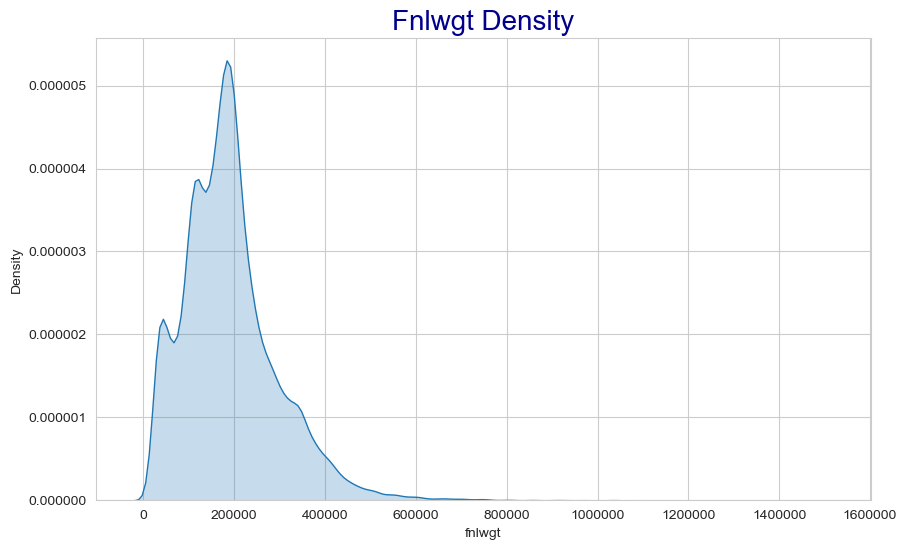

In [51]:
# The Second Approach to Prevent/Suppress Scientific Notation in Matplotlib

sns.kdeplot(data=df, x="fnlwgt", fill=True)

plt.title("Fnlwgt Density", fontsize=20, color="darkblue")

plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y');

### Check the statistical values

In [52]:
# Descriptive Statistics of "fnlwgt" Feature

print(colored('Descriptive Statistics of the "fnlwgt" Feature:\n', 'blue', attrs=['bold']))
df.fnlwgt.describe()

Descriptive Statistics of the "fnlwgt" Feature:



count     32537.000
mean     189780.849
std      105556.471
min       12285.000
25%      117827.000
50%      178356.000
75%      236993.000
max     1484705.000
Name: fnlwgt, dtype: float64

### Check the boxplot and histplot/kdeplot by "salary" levels

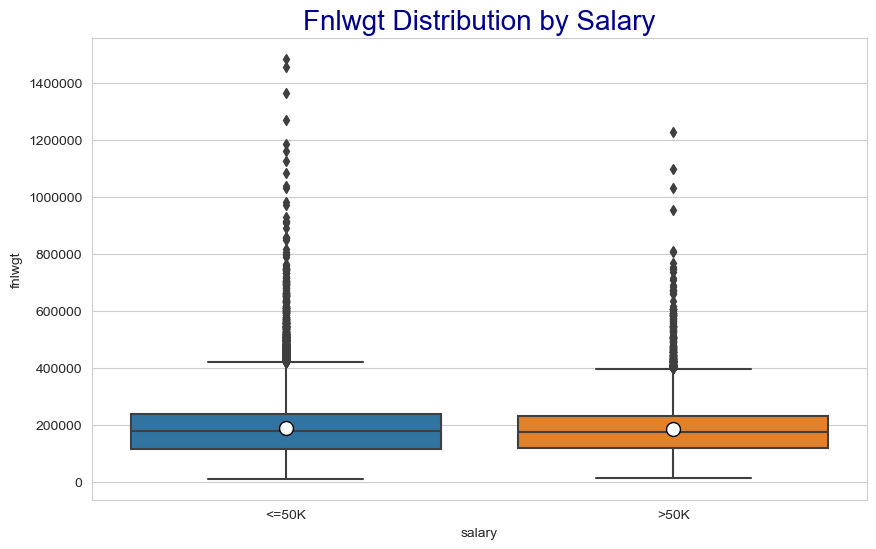

In [53]:
# Checking the extreme values in "fnlwgt" feature by Salary with box plot

sns.boxplot(data=df, 
            x="salary", 
            y="fnlwgt",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

plt.title("Fnlwgt Distribution by Salary", fontsize=20, color="darkblue")
plt.ticklabel_format(style='plain', axis='y');

**If one of the sections is longer than another, it indicates a wider range in the values of data in that section (meaning the data are more spread out). A smaller section of the boxplot indicates the data are more condensed (closer together).**

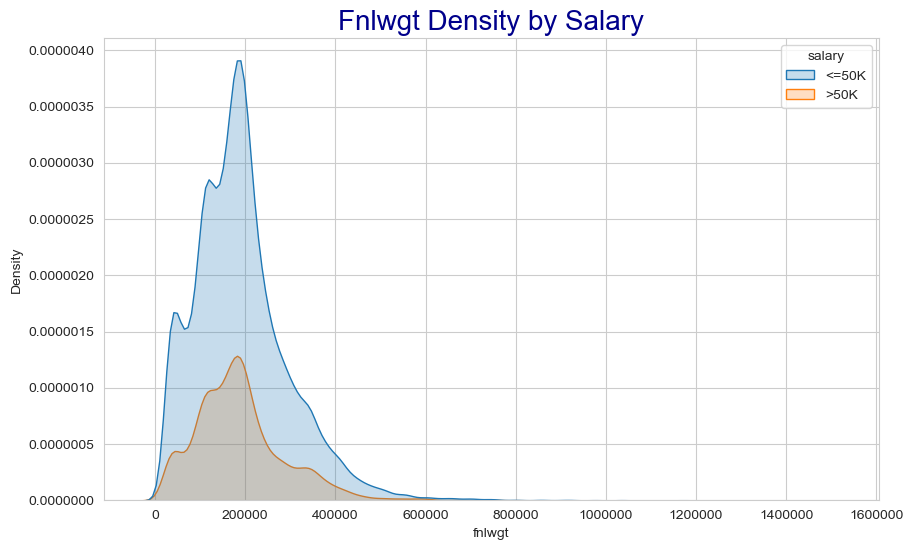

In [54]:
# Checking Density Distribution of "fnlwgt" feature by Salary

ax = sns.kdeplot(data=df, x="fnlwgt", hue="salary", fill=True)

plt.title("Fnlwgt Density by Salary", fontsize=20, color="darkblue")

ax.ticklabel_format(style='plain');

### Check the statistical values by "salary" levels

In [55]:
# Descriptive Statistics of "fnlwgt" with respect to salary levels

print(colored('Descriptive Statistics of the "fnlwgt" by Salary:\n', 'blue', attrs=['bold']))
df.groupby("salary").fnlwgt.describe()

Descriptive Statistics of the "fnlwgt" by Salary:



count       mean        std       min        25%        50%  \
salary                                                                   
<=50K  24698.000 190345.927 106487.413 12285.000 117606.000 179465.000   
>50K    7839.000 188000.481 102554.464 14878.000 119100.000 176063.000   

              75%         max  
salary                         
<=50K  238968.250 1484705.000  
>50K   230969.000 1226583.000

Statistical Calculations :
--------------------------
Minimum:12285.00
Mean: 189780.85
Median:178356.00
Mode: 123011.00
Maximum:1484705.00



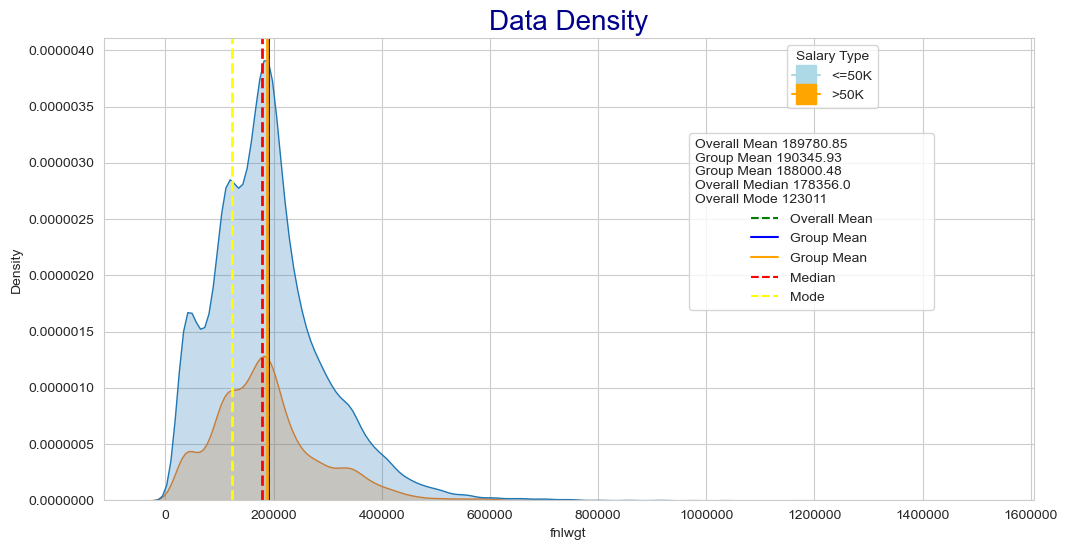

In [56]:
show_compare(df, "fnlwgt", "salary")

### Write down the conclusions you draw from your analysis

**Some Remarks on "fnlwgt" Feature:** It looks like there is no significant difference between high and low-income groups according to the "fnlwgt" feature.

However, the difference in standard deviations of these 2 groups is not very large so it seems there is not much more difference between the mean and median for both groups, it can be stated that the average income increases by age. There is some gap between the 75% values and max values for each income group, which might be the indicator of extreme values (candidates of outliers). Therefore, there is a need to examine meticulously the boxplots for these features, salary & fnlwgt, separately and together by means of domain knowledge obtained by the field/expertise.

### <div class="alert alert-info"><font color=black>capital_gain :</font></div>

**What is 'Capital Gain?'**

Capital gain is an economic concept defined as the profit earned on the sale of an asset which has increased in value over the holding period. An asset may include tangible property, a car, a business, or intangible property such as shares.

A capital gain is only possible when the selling price of the asset is greater than the original purchase price. In the event that the purchase price exceeds the sale price, a capital loss occurs. Capital gains are often subject to taxation, of which rates and exemptions may differ between countries. 


In [57]:
# We can build a function that highlights the maximum value across rows, cols, and the DataFrame all at once.

def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')

In [58]:
# Descriptive Statistics of the "capital_gain" by "workclass", "occupation"

print(colored('Descriptive Statistics "capital_gain" by "workclass" & "occupation":\n', 'blue', attrs=['bold']))

df.groupby(["workclass", "occupation"])["capital_gain"].describe()\
                             .style.apply(highlight_max, props='color: white; background-color: #33FFF9;', axis=0)\
                             .apply(highlight_max, props='color: white; background-color: pink;', axis=1)\
                             .apply(highlight_max, props='color: white; background-color: purple', axis=None)

Descriptive Statistics "capital_gain" by "workclass" & "occupation":



### Check the boxplot to see extreme values

**Use the IQR to assess the variability where most of your values lie. Larger values indicate that the central portion of your data spread out further. Conversely, smaller values show that the middle values cluster more tightly.**

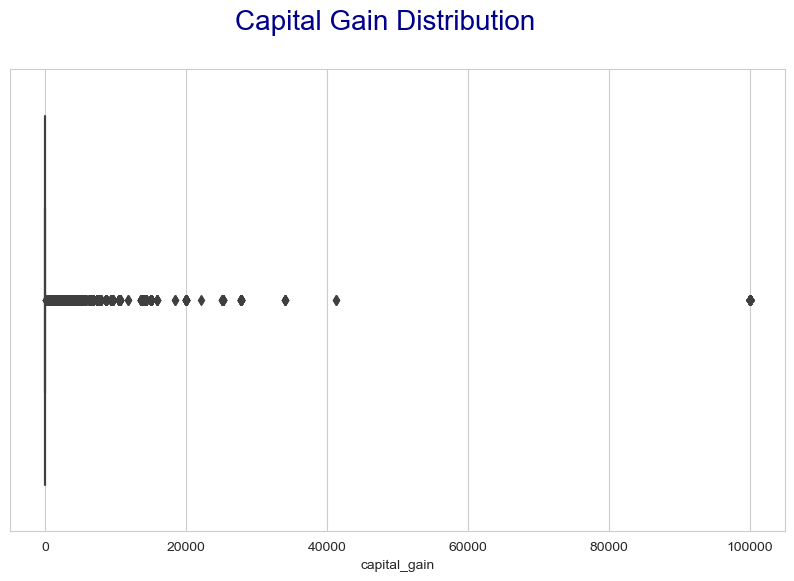

In [59]:
# Checking the extreme values in the "capital_gain" feature with box plot

sns.boxplot(data=df, x="capital_gain")

plt.suptitle("Capital Gain Distribution", fontsize=20, color="darkblue");

### Check the histplot/kdeplot to see distribution of feature

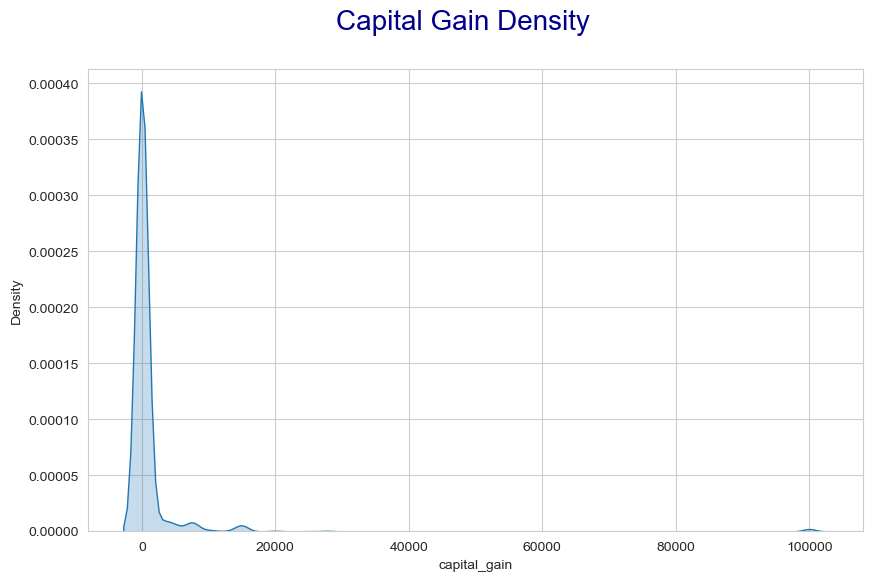

In [60]:
# Checking Density Distribution of the "capital_gain" feature 

sns.kdeplot(data=df, x="capital_gain", fill=True)

plt.suptitle("Capital Gain Density", fontsize=20, color="darkblue");

### Check the statistical values

In [61]:
# Descriptive Statistics of "capital_gain" Feature

print(colored('Descriptive Statistics of the "capital_gain" Feature:\n', 'blue', attrs=['bold']))
df.capital_gain.describe()

Descriptive Statistics of the "capital_gain" Feature:



count   32537.000
mean     1078.444
std      7387.957
min         0.000
25%         0.000
50%         0.000
75%         0.000
max     99999.000
Name: capital_gain, dtype: float64

### Check the boxplot and histplot/kdeplot by "salary" levels

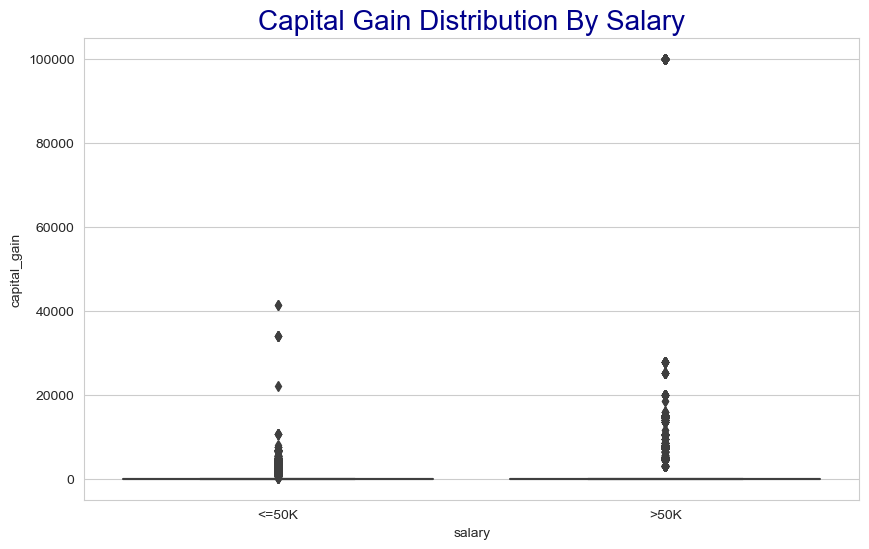

In [62]:
# Checking the extreme values in the "capital_gain" feature by Salary with box plot

sns.boxplot(data=df, x="salary", y="capital_gain")

plt.title("Capital Gain Distribution By Salary", fontsize=20, color='darkblue');

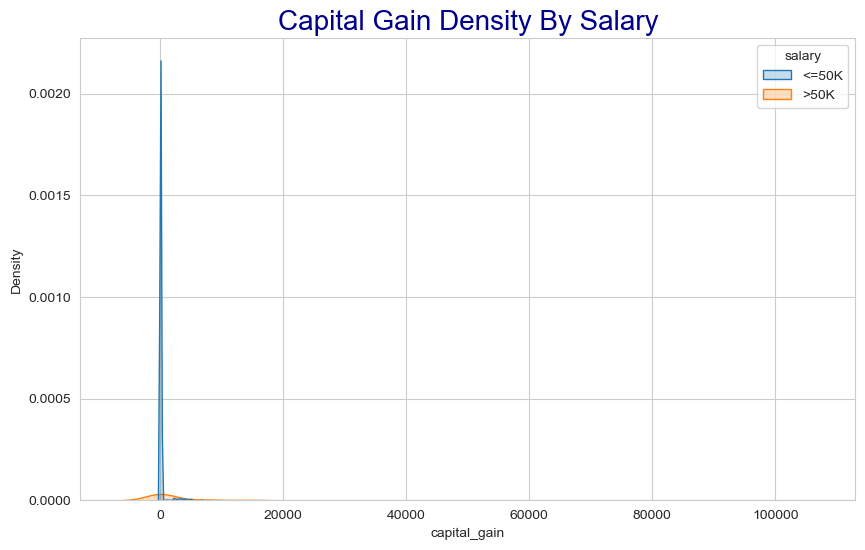

In [63]:
# Checking Density Distribution of the "capital_gain" feature by Salary 

sns.kdeplot(data=df, x="capital_gain", hue="salary", fill=True)

plt.title("Capital Gain Density By Salary", fontsize=20, color='darkblue');

### Check the statistical values by "salary" levels

In [64]:
# Descriptive Statistics of "capital_gain" with respect to Salary levels

print(colored('Descriptive Statistics of the "capital_gain" by Salary:\n', 'blue', attrs=['bold']))
df.groupby("salary").capital_gain.describe()

Descriptive Statistics of the "capital_gain" by Salary:



count     mean       std   min   25%   50%   75%       max
salary                                                               
<=50K  24698.000  148.885   963.558 0.000 0.000 0.000 0.000 41310.000
>50K    7839.000 4007.165 14572.097 0.000 0.000 0.000 0.000 99999.000

Statistical Calculations :
--------------------------
Minimum:   0.00
Mean:   1078.44
Median:    0.00
Mode:      0.00
Maximum:99999.00



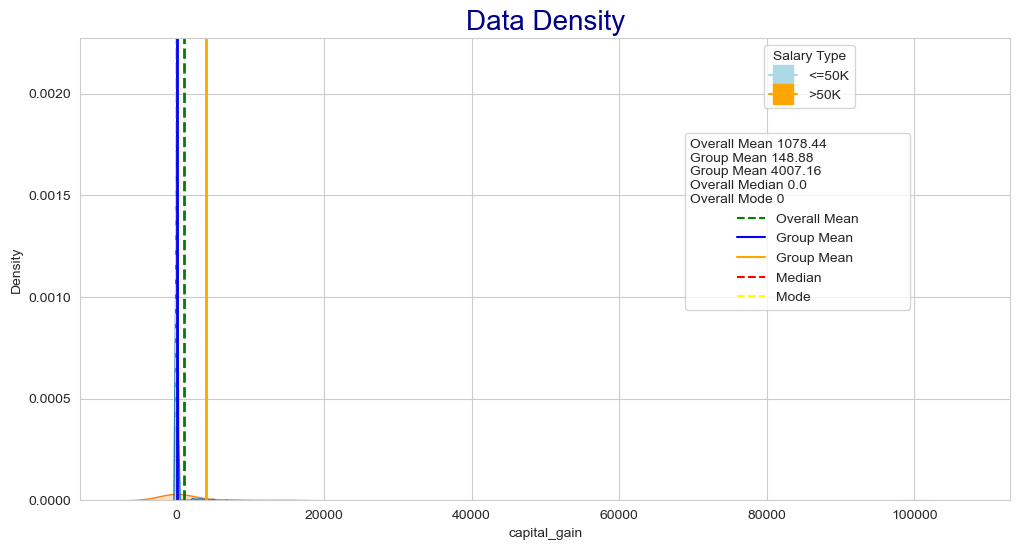

In [65]:
show_compare(df, "capital_gain", "salary")

### Check the statistical values by "salary" levels for capital_gain not equal to zero

In [66]:
# Descriptive Statistics of "capital_gain != 0" by Salary

print(colored('Descriptive Statistics of the "capital_gain != 0" by Salary :\n', 'blue', attrs=['bold']))
df[df.capital_gain != 0].groupby("salary")["capital_gain"].describe()

Descriptive Statistics of the "capital_gain != 0" by Salary :



count      mean       std      min      25%      50%       75%  \
salary                                                                     
<=50K  1035.000  3552.813  3173.419  114.000 2202.000 3273.000  4101.000   
>50K   1677.000 18731.165 26778.676 3103.000 7298.000 7896.000 15024.000   

             max  
salary            
<=50K  41310.000  
>50K   99999.000

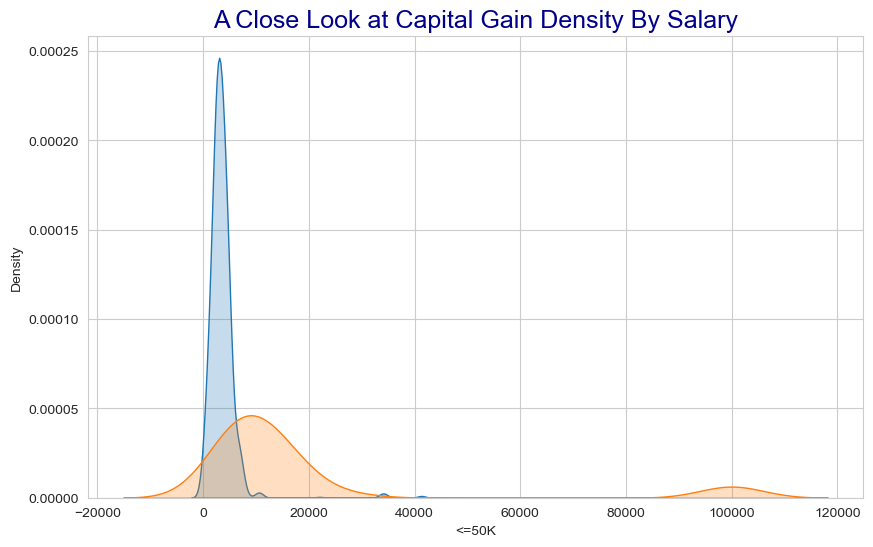

In [67]:
# Checking Density Distribution of "capital_gain" feature by Salary 

df[df.capital_gain != 0].groupby('salary')['capital_gain']\
                        .apply(lambda x: sns.kdeplot(x, label=x.name, fill=True))

plt.title("A Close Look at Capital Gain Density By Salary", fontsize=18, color='darkblue');

### Write down the conclusions you draw from your analysis

**Some Remarks on "capital_gain" Feature :** Capital gain is usually known as the profits made from the sale of real estate, investments, and personal property.

``The dataset indicates the following findings when all rows are included:``

- The average capital gain earned by the people who make above 50K is almost 27 times (18731.165/148.885 = 26.914497766732715) larger than the capital gain earned by the people who make 50K or below 50K.
- There are extreme values such as 41K made by those who are in "<=50K income-level" or 99999K made by those who are ">50K income-level" and they affect the average values.
- The capital gain values made by the people who are in the ">50K income-level" vary way more than the values made by those in the "<=50K income-level". The latter clustered around "148.88" while the former varies mostly between 0 and 20K.
- When the min, median, and interquartile ranges are checked, it is realized that a lot of values of zero exist in the capital gain column. That's why it might be better to check the statistical description of the capital gain column excluding the rows with zero values.

``The dataset indicates the following findings when the rows with zero values are excluded:``

- The average capital gain earned by the people who make above 50K is almost 5 times (18731.165/3552.813 = 5.272206840044776) larger than the capital gain earned by those who make money 50K or below. It has a sharp decrease when compared to the output above.
- The standard deviation increases in both salary-levels, which shows that the varieties of capital gain values increase since most of the values were 0's in the previous scenerio.
- The median and IQRs vary a lot between two salary levels. While the capital gain of "<=50K population" is mostly clustered below 5K, the capital gain of ">50K population" varies mostly between 7K-15K.

**Final Thoughts:**

People who earn more are tend to make investments more than the people who earn less. In other words, the more "capital-gain", the more "high-income". However, almost 79% of the people who earn >50K reported "0" as their capital gain. This can be the starter of another story about why people don't/can't invest.

### <div class="alert alert-info"><font color=black>capital_loss :</font></div>

**What Is a Capital Loss?**

A capital loss is the loss incurred when a capital asset, such as an investment or real estate, decreases in value. This loss is not realized until the asset is sold for a price that is lower than the original purchase price. In simple terms, the difference between the selling price and cost/purchase price of an investment can be described as capital gain/loss.

In [68]:
df[df.capital_loss < 0]

# As seen, there has been no values lower than zero since it is contrary to the meaning of "Capital Loss"

Empty DataFrame
Columns: [age, workclass, fnlwgt, education, education_num, marital_status, occupation, relationship, race, gender, capital_gain, capital_loss, hours_per_week, native_country, salary]
Index: []

In [69]:
# Descriptive Statistics of the "capital_loss" by "workclass" & "occupation"

print(colored('Descriptive Statistics "capital_loss" by "workclass" & "occupation":\n', 'blue', attrs=['bold']))

df.groupby(["workclass", "occupation"])["capital_loss"].describe()\
                             .style.apply(highlight_max, props='color: white; background-color: #33FFF9;', axis=0)\
                             .apply(highlight_max, props='color: white; background-color: pink;', axis=1)\
                             .apply(highlight_max, props='color: white; background-color: purple', axis=None)

Descriptive Statistics "capital_loss" by "workclass" & "occupation":



### Check the boxplot to see extreme values

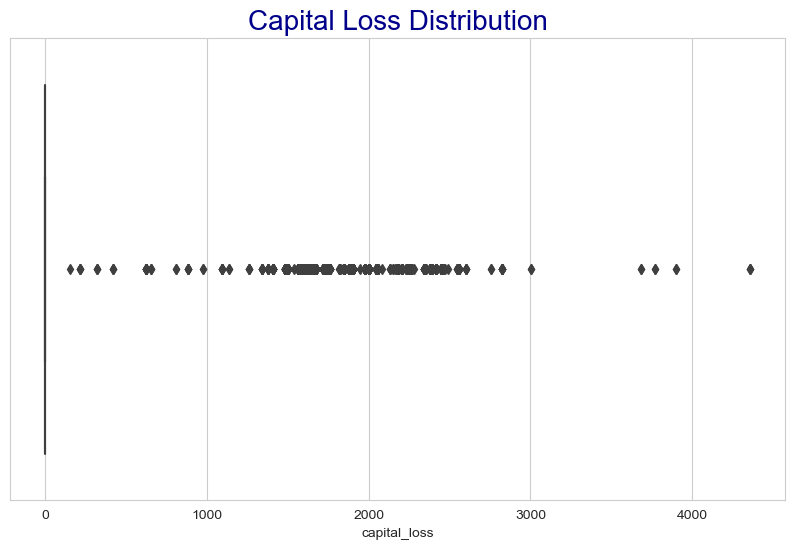

In [70]:
# Checking the extreme values in the "capital_loss" feature with box plot

sns.boxplot(data=df, x="capital_loss")

plt.title("Capital Loss Distribution", fontsize=20, color='darkblue');

### Check the histplot/kdeplot to see distribution of feature

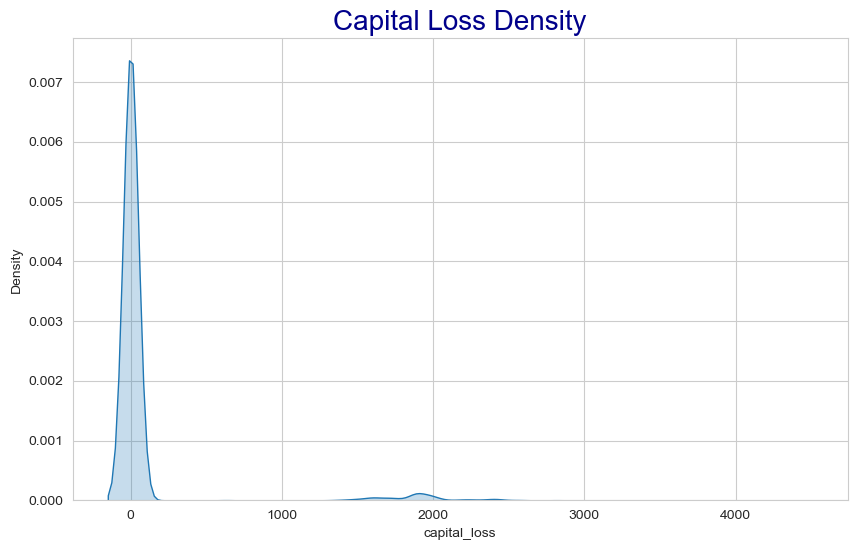

In [71]:
# Checking Density Distribution of the "capital_loss" feature 

sns.kdeplot(data=df, x="capital_loss", fill=True)

plt.title("Capital Loss Density", fontsize=20, color='darkblue');

### Check the statistical values

In [72]:
# Descriptive Statistics of "capital_loss" Feature

print(colored('Descriptive Statistics of the "capital_loss" Feature:\n', 'blue', attrs=['bold']))
df.capital_loss.describe()

Descriptive Statistics of the "capital_loss" Feature:



count   32537.000
mean       87.368
std       403.102
min         0.000
25%         0.000
50%         0.000
75%         0.000
max      4356.000
Name: capital_loss, dtype: float64

### Check the boxplot and histplot/kdeplot by "salary" levels

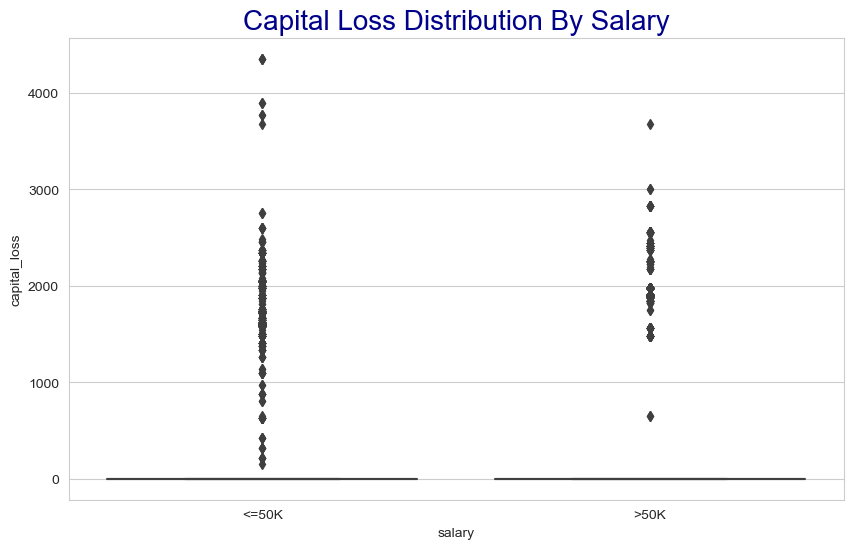

In [73]:
# Checking the extreme values in the "capital_loss" feature by Salary with box plot

sns.boxplot(data=df, x="salary", y="capital_loss")

plt.title("Capital Loss Distribution By Salary", fontsize=20, color='darkblue');

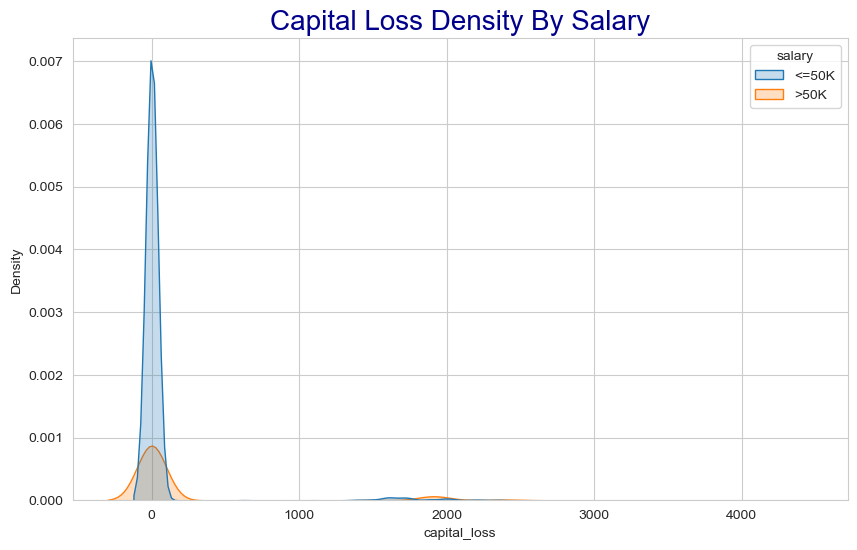

In [74]:
# Checking Density Distribution of the "capital_loss" feature by Salary 

sns.kdeplot(data=df, x="capital_loss", hue="salary", fill=True)

plt.title("Capital Loss Density By Salary", fontsize=20, color='darkblue');

### Check the statistical values by "salary" levels

In [75]:
# Descriptive Statistics of "capital_loss" by Salary

print(colored('Descriptive Statistics of the "capital_loss" by Salary :\n', 'blue', attrs=['bold']))
df.groupby("salary").capital_loss.describe()

Descriptive Statistics of the "capital_loss" by Salary :



count    mean     std   min   25%   50%   75%      max
salary                                                           
<=50K  24698.000  53.190 310.890 0.000 0.000 0.000 0.000 4356.000
>50K    7839.000 195.051 595.555 0.000 0.000 0.000 0.000 3683.000

Statistical Calculations :
--------------------------
Minimum:   0.00
Mean:     87.37
Median:    0.00
Mode:      0.00
Maximum:4356.00



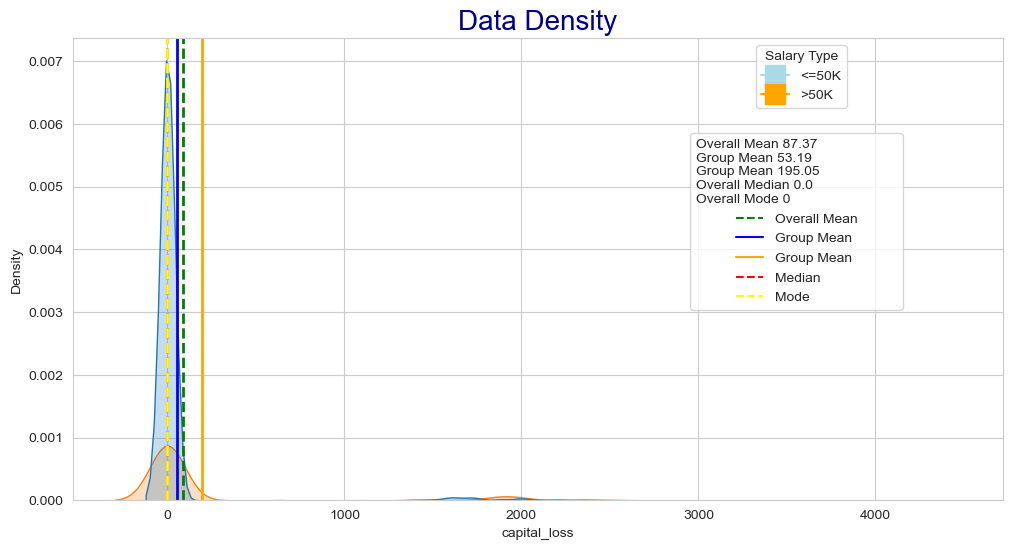

In [76]:
show_compare(df, "capital_loss", "salary")

### Check the statistical values by "salary" levels for capital_loss not equal the zero

In [77]:
# Descriptive Statistics of "capital_loss != 0" by Salary

print(colored('Descriptive Statistics of the "capital_loss != 0" by Salary :\n', 'blue', attrs=['bold']))
df[df.capital_loss != 0].groupby("salary").capital_loss.describe()

Descriptive Statistics of the "capital_loss != 0" by Salary :



count     mean     std     min      25%      50%      75%      max
salary                                                                     
<=50K  746.000 1760.983 438.906 155.000 1590.000 1721.000 1980.000 4356.000
>50K   773.000 1978.017 264.144 653.000 1887.000 1902.000 1977.000 3683.000

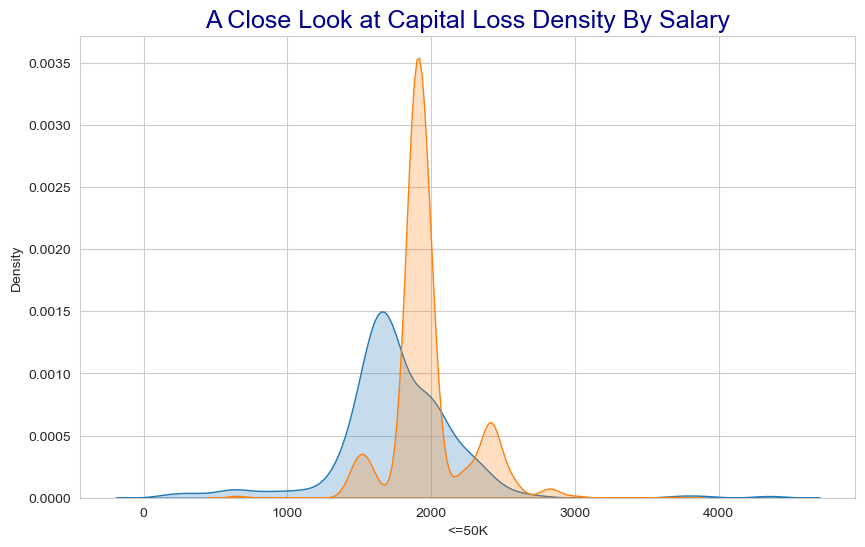

In [78]:
# Checking Density Distribution of the "capital_loss != 0" by Salary 

df[df.capital_loss != 0].groupby('salary')['capital_loss']\
                        .apply(lambda x: sns.kdeplot(x, label=x.name, fill=True))

plt.title("A Close Look at Capital Loss Density By Salary", fontsize=18, color='darkblue');

### Write down the conclusions you draw from your analysis

**Some Remarks on "capital_loss" Feature:** 

``A capital loss is considered to sell an investment for less than the original purchase price.``

Here are the findings from the dataset:

- Unlike the capital gain, we recognize a similar patterns for both salary-levels populations in the capital loss data.
- The graphs -boxplots and histograms- show similar distributions among the people who make money <=50K and those who make money >50K. Both are close to a normal distribution and most of the values are clustered around "0". It leaded us again to consider the "capital_loss" column with nonzero values to better understand the data.
- When "0" values are eliminated, it is realized that the pattern of the data in both salary levels get closer to each other. The statistical description of the capital loss data support our claim with the close mean, median, and IQRs.

### <div class="alert alert-info"><font color=black>hours_per_week :</font></div>

### Check the boxplot to see extreme values

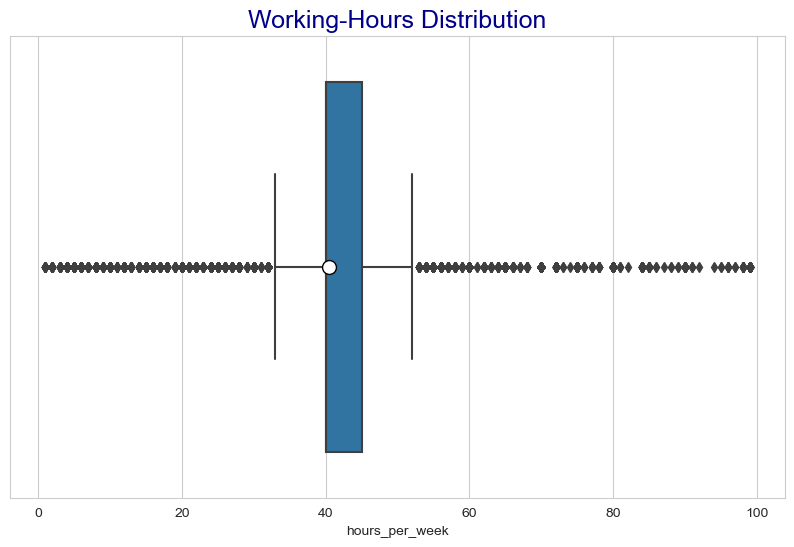

In [79]:
# Checking the extreme values in the "hours_per_week" feature with box plot

sns.boxplot(data=df, 
            x="hours_per_week",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

plt.title("Working-Hours Distribution", fontsize=18, color='darkblue');

### Check the histplot/kdeplot to see distribution of feature

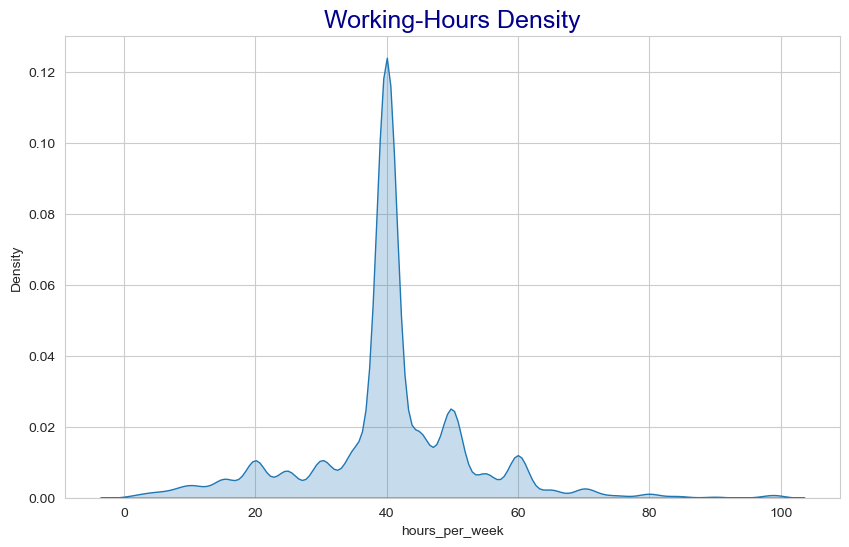

In [80]:
# Checking Density Distribution of the "hours_per_week" Feature 

sns.kdeplot(data=df, x="hours_per_week", fill=True)

plt.title("Working-Hours Density", fontsize=18, color='darkblue');

### Check the statistical values

In [81]:
# Descriptive Statistics of "hours_per_week" by Salary

print(colored('Descriptive Statistics of the "hours_per_week" :\n', 'blue', attrs=['bold']))
df.hours_per_week.describe()

Descriptive Statistics of the "hours_per_week" :



count   32537.000
mean       40.440
std        12.347
min         1.000
25%        40.000
50%        40.000
75%        45.000
max        99.000
Name: hours_per_week, dtype: float64

### Check the boxplot and histplot/kdeplot by "salary" levels

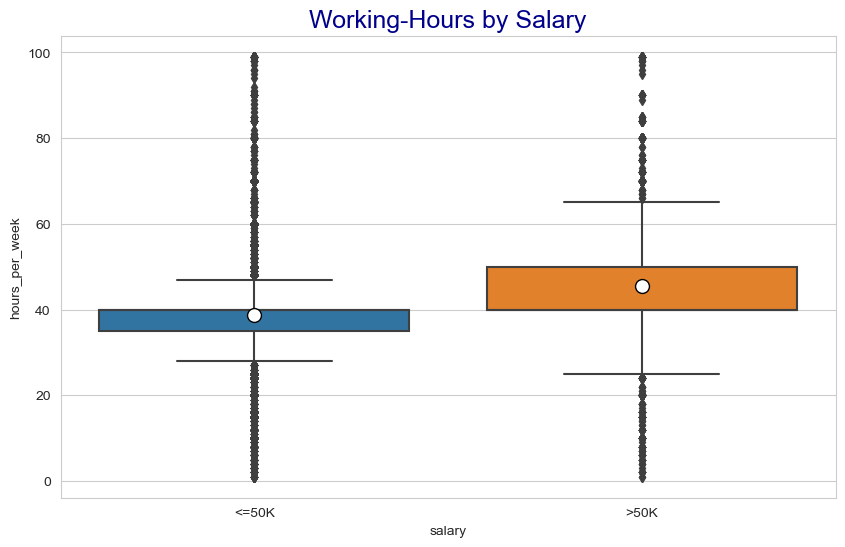

In [82]:
# Checking the extreme values in the "hours_per_week" by Salary with box plot

sns.boxplot(data=df, 
            x="salary", 
            y="hours_per_week",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

plt.title("Working-Hours by Salary", fontsize=18, color='darkblue');            

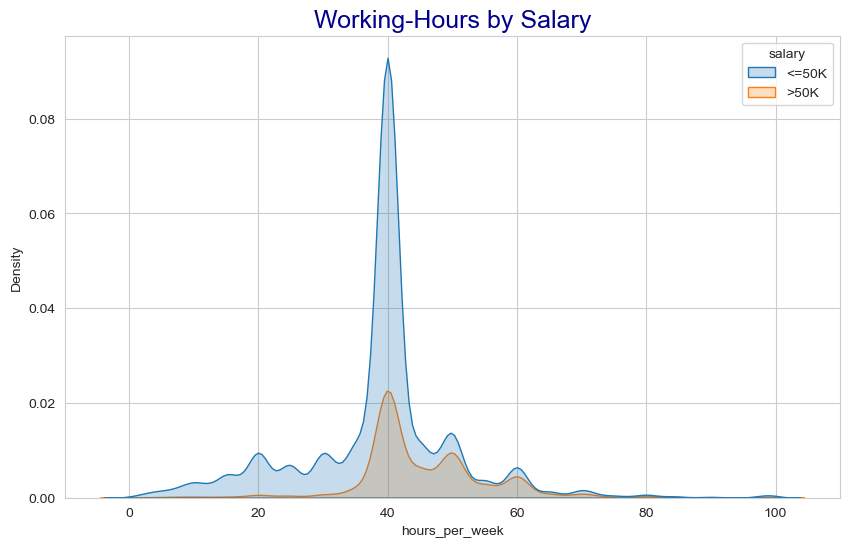

In [83]:
# Checking Density Distribution of the "hours_per_week" by Salary 

sns.kdeplot(data=df, x="hours_per_week", hue="salary", fill=True)

plt.title("Working-Hours by Salary", fontsize=18, color='darkblue');            

### Check the statistical values by "salary" levels

In [84]:
# Descriptive Statistics of "hours_per_week" by Salary

print(colored('Descriptive Statistics of the "hours_per_week" by Salary :\n', 'blue', attrs=['bold']))
df.groupby("salary").hours_per_week.describe()

Descriptive Statistics of the "hours_per_week" by Salary :



count   mean    std   min    25%    50%    75%    max
salary                                                          
<=50K  24698.000 38.843 12.318 1.000 35.000 40.000 40.000 99.000
>50K    7839.000 45.473 11.014 1.000 40.000 40.000 50.000 99.000

Statistical Calculations :
--------------------------
Minimum:   1.00
Mean:     40.44
Median:   40.00
Mode:     40.00
Maximum:  99.00



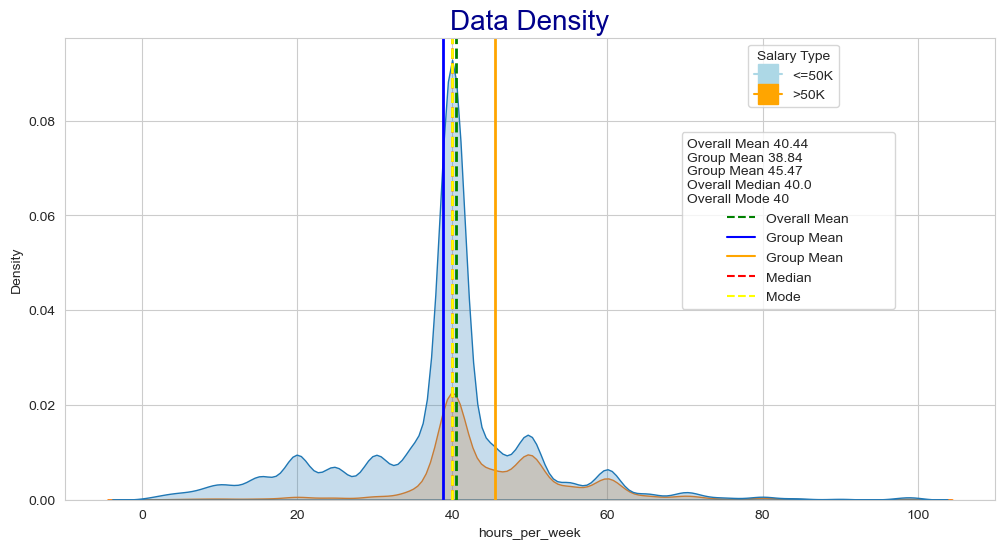

In [85]:
show_compare(df, "hours_per_week", "salary")

### Write down the conclusions you draw from your analysis

**Remarks on "hours_per_week" Feature:** 

- We don't recognize a distinguishable difference between two salary levels in terms of the number of working hours. Both salary-level graphs indicate that the number of hour values clustered at 40 hours in general as expected. Most of the full time employees work 8 hours per day. Since the number of working hours is standardized, it doesn't change much across the salary levels.
- However, it is observed that the "<=50K population" data shows a peaky normal distribution while ">50K population" data is slightly right-skewed and it's distribution is binominal which should be taken into consideration for determining if there have been any underlying patterns. The statistical measurements support the visuals with closer mean & median values in the former while a higher mean compared to median in the latter.
- Nevertheless, it can be stated that to be in a high-income group, almost at least an average of 45 working-hours per week is required. Most of those who work less than 39 hours per week are in the low-income group.

In [86]:
# Checking the skewness of all features in the dataset

df.skew(axis=0)

age               0.558
fnlwgt            1.448
education_num    -0.311
capital_gain     11.949
capital_loss      4.593
hours_per_week    0.229
dtype: float64

In [87]:
# Checking the kurtosis of all features in the dataset

df.kurtosis(axis=0)

age               -0.170
fnlwgt             6.222
education_num      0.608
capital_gain     154.683
capital_loss      20.358
hours_per_week     2.918
dtype: float64

**``Mesokurtic:``** This distribution has kurtosis statistic similar to that of the normal distribution. It means that the extreme values of the distribution are similar to that of a normal distribution characteristic. This definition is used so that the standard normal distribution has a kurtosis of three.

**``Leptokurtic (Kurtosis > 3):``** Distribution is longer, tails are fatter. Peak is higher and sharper than Mesokurtic, which means that data are heavy-tailed or profusion of outliers.
Outliers stretch the horizontal axis of the histogram graph, which makes the bulk of the data appear in a narrow (“skinny”) vertical range, thereby giving the “skinniness” of a leptokurtic distribution.

**``Platykurtic: (Kurtosis < 3):``** Distribution is shorter, tails are thinner than the normal distribution. The peak is lower and broader than Mesokurtic, which means that data are light-tailed or lack of outliers.
The reason for this is because the extreme values are less than that of the normal distribution.

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">See the relationship between each numeric features by target feature (salary) in one plot basically</p>

**A pairplot plot a pairwise relationships in a dataset.**

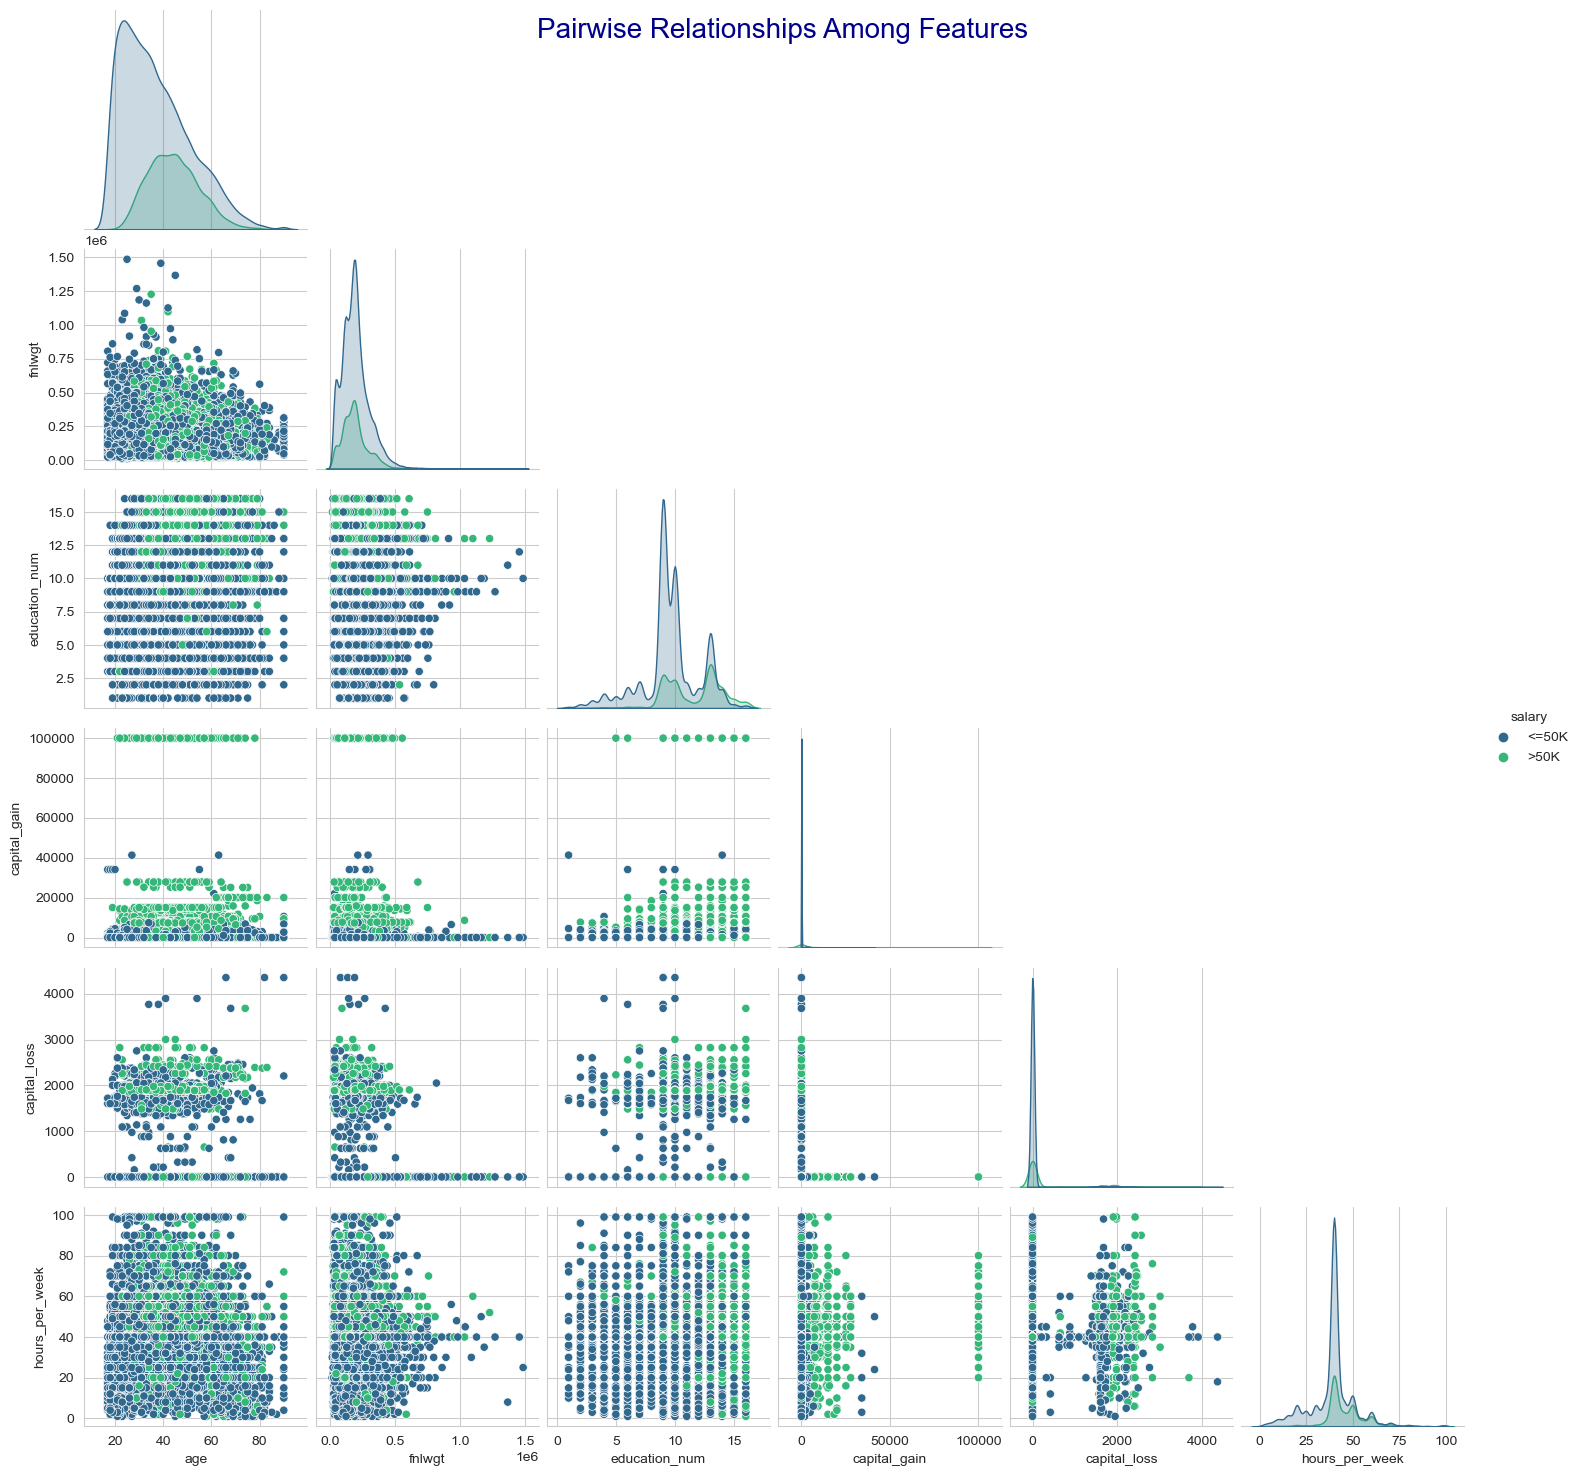

In [88]:
g = sns.pairplot(df, hue="salary", palette="viridis", corner=True)

g.fig.suptitle("Pairwise Relationships Among Features", fontsize=20, color='darkblue');            

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">Categorical Features</p>

### <div class="alert alert-info"><font color=black>education & education_num :</font></div>

### Detect the similarities between these features by comparing unique values

In [89]:
# Checking the uniques of "education" feature and determining their numbers

df.education.value_counts(dropna=False)

HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64

In [90]:
# Checking the uniques of "education_num" feature and determining their numbers 

df.education_num.value_counts(dropna=False)

9.000     10208
10.000     7089
13.000     5245
14.000     1686
11.000     1343
7.000      1146
12.000     1044
6.000       916
NaN         802
4.000       630
15.000      559
5.000       503
8.000       424
16.000      405
3.000       329
2.000       159
1.000        49
Name: education_num, dtype: int64

In [91]:
# Comparing the uniques of "education" with those of "education_num"

df.groupby('education').education_num.value_counts(dropna=False)

education     education_num
10th          6.000              916
              NaN                 17
11th          7.000             1146
              NaN                 29
12th          8.000              424
              NaN                  9
1st-4th       2.000              159
              NaN                  7
5th-6th       3.000              329
              NaN                  3
7th-8th       4.000              630
              NaN                 15
9th           5.000              503
              NaN                 11
Assoc-acdm    12.000            1044
              NaN                 23
Assoc-voc     11.000            1343
              NaN                 39
Bachelors     13.000            5245
              NaN                108
Doctorate     16.000             405
              NaN                  8
HS-grad       9.000            10208
              NaN                286
Masters       14.000            1686
              NaN                 36
Preschool 

### Visualize the count of person in each categories for these features (education, education_num) separately

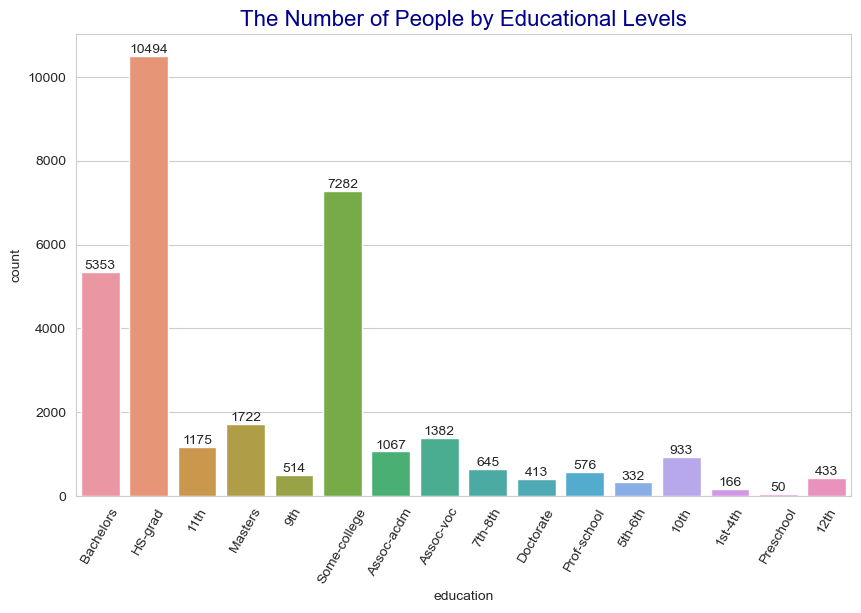

In [92]:
# Visualization of "education" feature

ax = sns.countplot(data=df, x="education")

plt.xticks(rotation=60)

plt.title("The Number of People by Educational Levels", fontsize=16, color="darkblue")

for container in ax.containers:
    ax.bar_label(container);

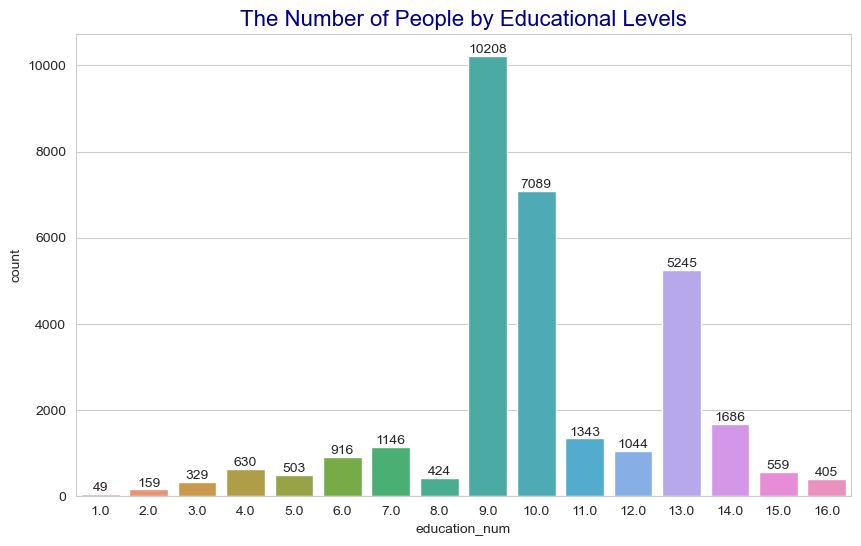

In [93]:
# Visualization of "education_num" feature

ax = sns.countplot(data=df, x="education_num")

plt.title("The Number of People by Educational Levels", fontsize=16, color="darkblue")

for container in ax.containers:
    ax.bar_label(container);

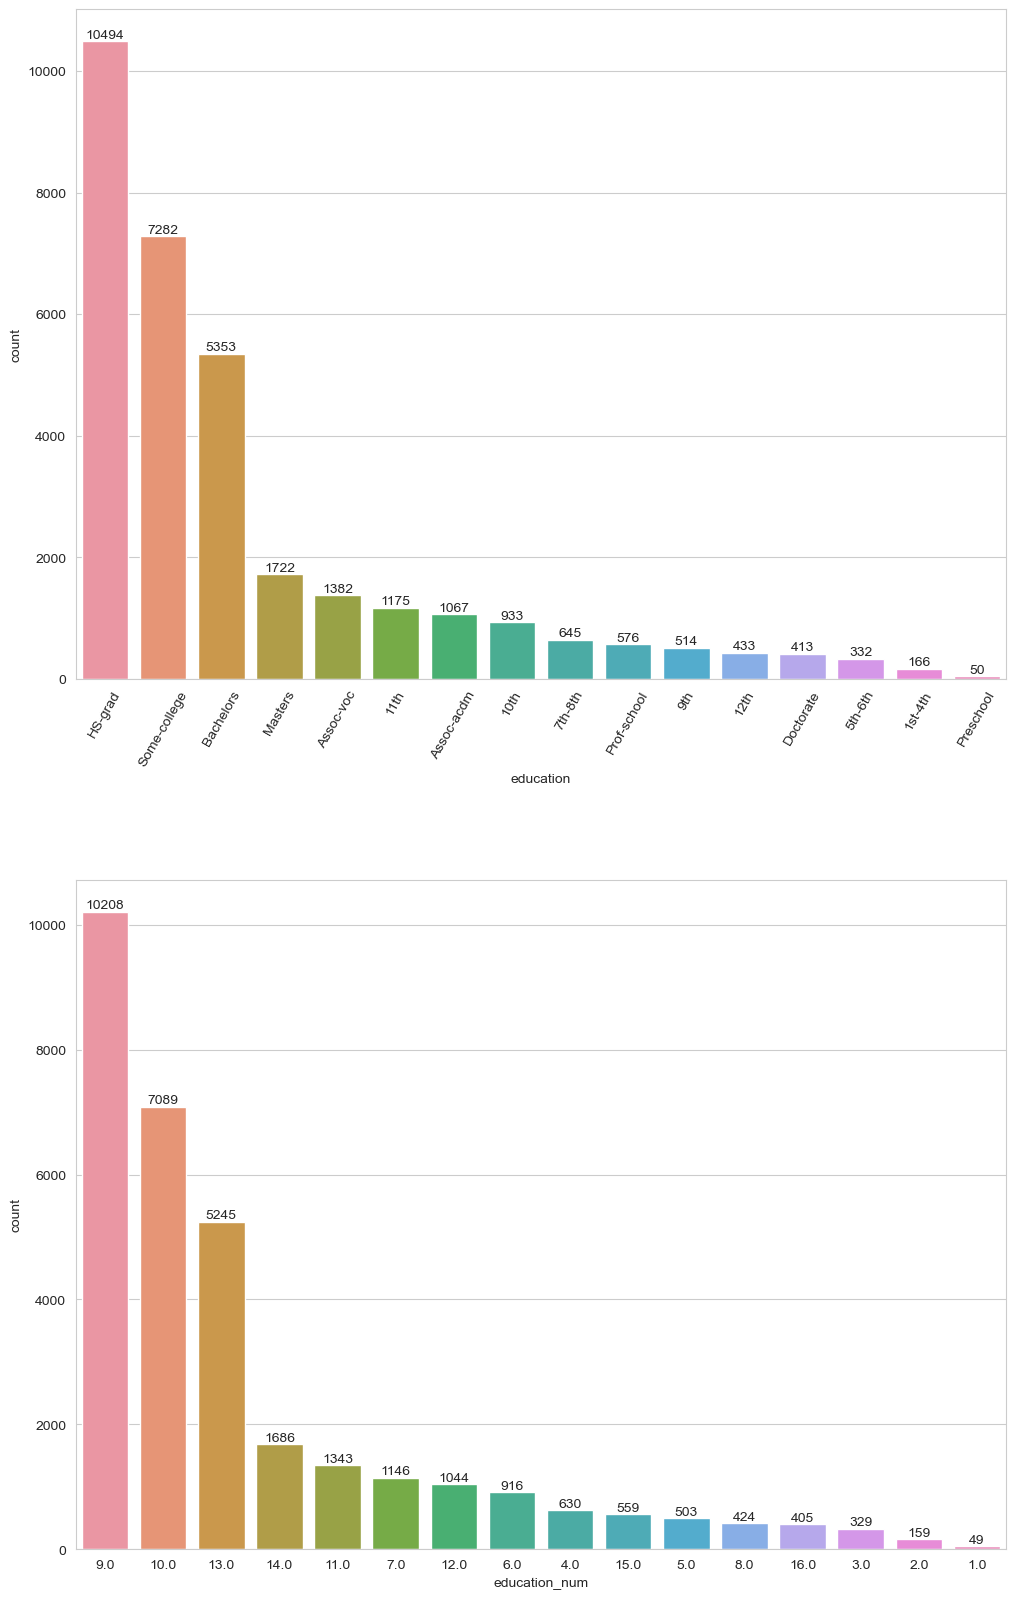

In [94]:
# Visualization of "education" and "education_num" features by order

education_count = df["education"].value_counts().index
education_num_count = df["education_num"].value_counts().index

fig, ax = plt.subplots(2, 1, figsize=(12, 20))

sns.countplot(df["education"], order=education_count, ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container);

sns.countplot(df["education_num"], order=education_num_count, ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container);

ax[0].tick_params(axis='x', rotation=60)

plt.subplots_adjust(hspace=0.3);

**The pattern of the counts in both features are almost equivalent. It is realized that "9.0" represent "HS-Grad", "10.0" represents "Some-college", "1.0" represents "Preschool" and so on. There are slight differences between the counts. It might be caused by the human errors during the survey.**

### Check the count of person in each "salary" levels by these features (education and education_num) separately and visualize them with countplot

In [95]:
# Checking "education" feature by Salary in detail 

df.groupby("education").salary.value_counts()

education     salary
10th          <=50K      871
              >50K        62
11th          <=50K     1115
              >50K        60
12th          <=50K      400
              >50K        33
1st-4th       <=50K      160
              >50K         6
5th-6th       <=50K      316
              >50K        16
7th-8th       <=50K      605
              >50K        40
9th           <=50K      487
              >50K        27
Assoc-acdm    <=50K      802
              >50K       265
Assoc-voc     <=50K     1021
              >50K       361
Bachelors     <=50K     3132
              >50K      2221
Doctorate     >50K       306
              <=50K      107
HS-grad       <=50K     8820
              >50K      1674
Masters       >50K       959
              <=50K      763
Preschool     <=50K       50
Prof-school   >50K       423
              <=50K      153
Some-college  <=50K     5896
              >50K      1386
Name: salary, dtype: int64

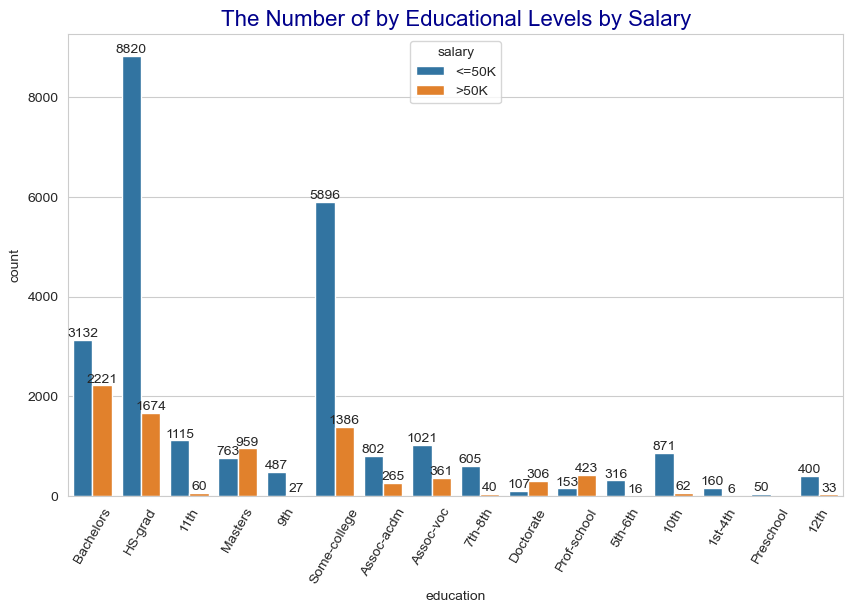

In [96]:
# Visualizing the number of people in each "education" level by Salary

ax = sns.countplot(data=df, x="education", hue="salary")

plt.title("The Number of by Educational Levels by Salary", fontsize=16, color="darkblue")

plt.xticks(rotation = 60)

for container in ax.containers:
    ax.bar_label(container);

In [97]:
# Checking "education_num" feature by Salary in detail 

df.groupby("education_num").salary.value_counts()

education_num  salary
1.000          <=50K       49
2.000          <=50K      153
               >50K         6
3.000          <=50K      313
               >50K        16
4.000          <=50K      592
               >50K        38
5.000          <=50K      477
               >50K        26
6.000          <=50K      854
               >50K        62
7.000          <=50K     1088
               >50K        58
8.000          <=50K      391
               >50K        33
9.000          <=50K     8579
               >50K      1629
10.000         <=50K     5746
               >50K      1343
11.000         <=50K      994
               >50K       349
12.000         <=50K      787
               >50K       257
13.000         <=50K     3078
               >50K      2167
14.000         >50K       935
               <=50K      751
15.000         >50K       410
               <=50K      149
16.000         >50K       302
               <=50K      103
Name: salary, dtype: int64

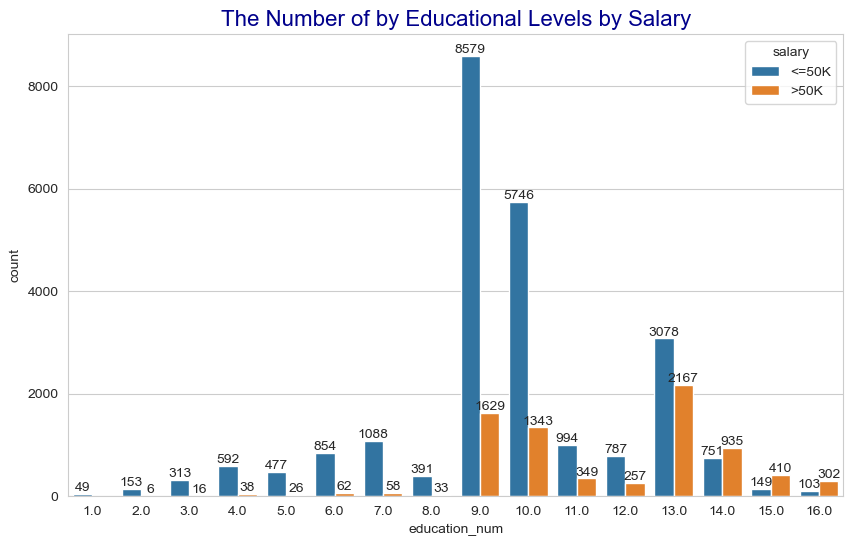

In [98]:
# Visualizing the number of people in each "education_num" level by Salary

ax = sns.countplot(data=df, x="education_num", hue="salary")

plt.title("The Number of by Educational Levels by Salary", fontsize=16, color="darkblue")

for container in ax.containers:
    ax.bar_label(container);

### Visualize the boxplot of "education_num" feature by "salary" levels

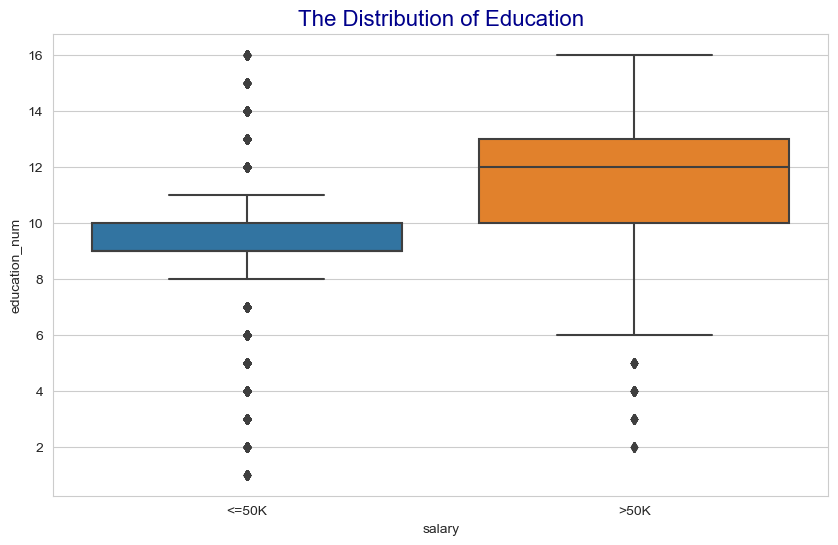

In [99]:
# Checking the extreme values in the "education_num" by Salary with box plot

sns.boxplot(data=df, x="salary", y="education_num")

plt.title("The Distribution of Education", fontsize=16, color="darkblue");

**Decreasing the number of categories in "education" feature as low, medium, and high level and creating a new feature with this new categorical data would be helpful to interpret the data.**

### Decrease the number of categories in "education" feature as low, medium, and high level and create a new feature with this new categorical data.

In [100]:
def mapping_education(x):
    if x in ["Preschool", "1st-4th", "5th-6th", "7th-8th", "9th", "10th", "11th", "12th"]:
        return "low_level_grade"
    elif x in ["HS-grad", "Some-college", "Assoc-voc", "Assoc-acdm"]:
        return "medium_level_grade"
    elif x in ["Bachelors", "Masters", "Prof-school", "Doctorate"]:
        return "high_level_grade"

In [101]:
df.education.apply(mapping_education).value_counts(dropna=False)

medium_level_grade    20225
high_level_grade       8064
low_level_grade        4248
Name: education, dtype: int64

In [102]:
df["education_summary"] = df.education.apply(mapping_education)

### Visualize the count of person in each categories for these new education levels (high, medium, low)

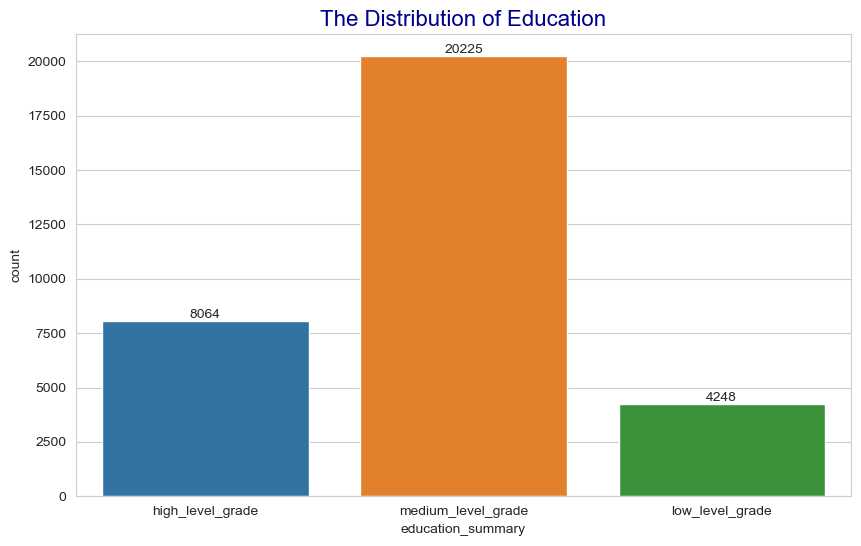

In [103]:
# Visualizing the number of persons in each sub-categories of "education_summary" (high, medium, low)

ax = sns.countplot(data=df, x="education_summary")

plt.title("The Distribution of Education", fontsize=16, color="darkblue")

for container in ax.containers:
    ax.bar_label(container);

### Check the count of person in each "salary" levels by these new education levels(high, medium, low) and visualize it with countplot

In [104]:
# The number of persons in each "education_summary" levels by Salary (high, medium, low)

df.groupby("education_summary").salary.value_counts()

education_summary   salary
high_level_grade    <=50K      4155
                    >50K       3909
low_level_grade     <=50K      4004
                    >50K        244
medium_level_grade  <=50K     16539
                    >50K       3686
Name: salary, dtype: int64

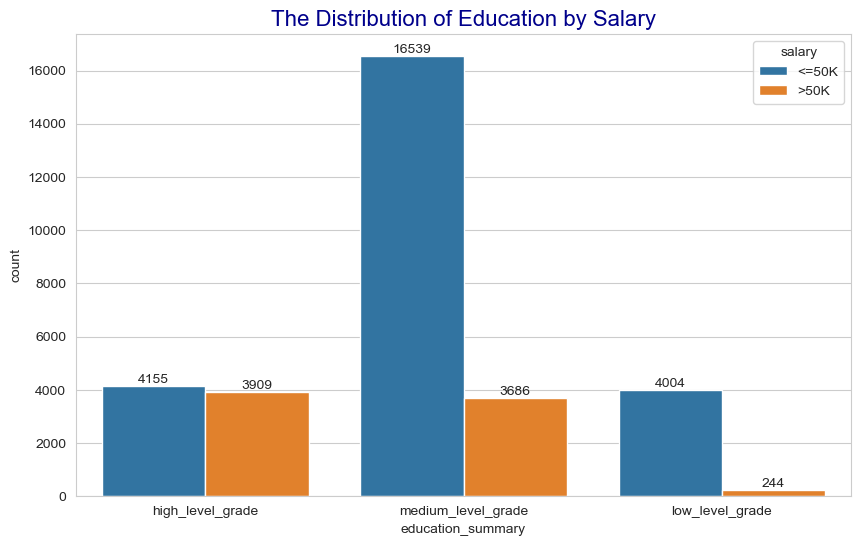

In [105]:
# Visualizing the number of persons in each sub-categories of "education_summary" (high, medium, low) by Salary

ax = sns.countplot(data=df, x="education_summary", hue="salary")

plt.title("The Distribution of Education by Salary", fontsize=16, color="darkblue")

for container in ax.containers:
    ax.bar_label(container);

### Check the percentage distribution of person in each "salary" levels by each new education levels (high, medium, low) and visualize it with pie plot separately

In [106]:
# The Proportional Distribution of persons in each sub-categories of "education_summary" (high, medium, low) by Salary 

edu_per = df.groupby(["education_summary"]).salary.value_counts(normalize=True)
edu_per

education_summary   salary
high_level_grade    <=50K    0.515
                    >50K     0.485
low_level_grade     <=50K    0.943
                    >50K     0.057
medium_level_grade  <=50K    0.818
                    >50K     0.182
Name: salary, dtype: float64

In [107]:
edu_per[0:2]

education_summary  salary
high_level_grade   <=50K    0.515
                   >50K     0.485
Name: salary, dtype: float64

In [108]:
edu_per[2:4]

education_summary  salary
low_level_grade    <=50K    0.943
                   >50K     0.057
Name: salary, dtype: float64

In [109]:
edu_per[4:6]

education_summary   salary
medium_level_grade  <=50K    0.818
                    >50K     0.182
Name: salary, dtype: float64

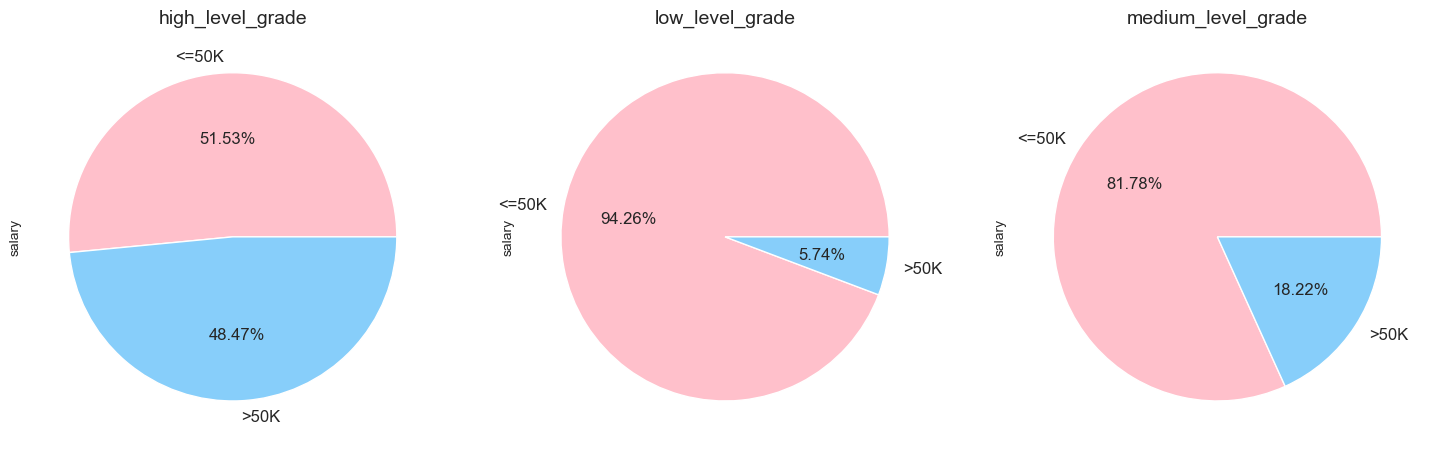

In [110]:
# Visualizing the percentages of "education_summary" levels by Salary

plt.figure(figsize=(18, 6))
index=1
for i in [0, 2, 4]:
    plt.subplot(1, 3, index)
    edu_per[i:i+2].plot.pie(subplots=True,
                        labels=["<=50K", ">50K"],
                        autopct="%.2f%%",
                        textprops={'fontsize': 12},
                        colors=['pink', 'lightskyblue'],
                        )
    plt.title(edu_per.index[i][0], fontdict = {'fontsize': 14})
#     plt.legend()
    index += 1

In [111]:
df2 = df.groupby("education_summary").salary.value_counts(normalize=True).unstack(level=0)
df2

education_summary  high_level_grade  low_level_grade  medium_level_grade
salary                                                                  
<=50K                         0.515            0.943               0.818
>50K                          0.485            0.057               0.182

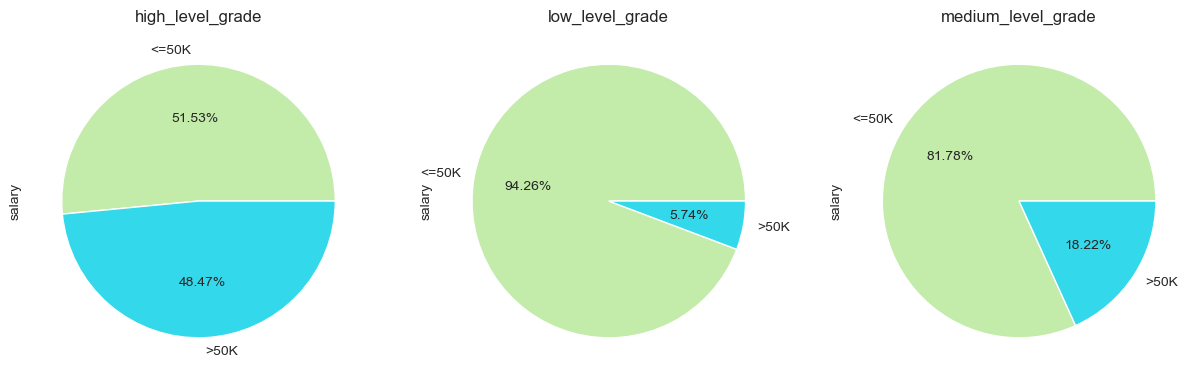

In [112]:
df2 = df.groupby("education_summary").salary.value_counts(normalize=True).unstack(level=0)
df2.plot(kind="pie", 
         subplots=True,
         layout=(1, 3),
         labels=["<=50K", ">50K"],
         title=["high_level_grade", "low_level_grade", "medium_level_grade"],
         ylabel="salary",
         autopct="%.2f%%", legend=False, figsize=(15, 5),
         colors=["#c3eba9","#34d8eb"]);

### Check the count of person in each these new education levels(high, medium, low) by "salary" levels and visualize it with countplot

In [113]:
# The number of persons in each "salary" by "education_summary" levels (high, medium, low)

df.groupby("salary").education_summary.value_counts()

salary  education_summary 
<=50K   medium_level_grade    16539
        high_level_grade       4155
        low_level_grade        4004
>50K    high_level_grade       3909
        medium_level_grade     3686
        low_level_grade         244
Name: education_summary, dtype: int64

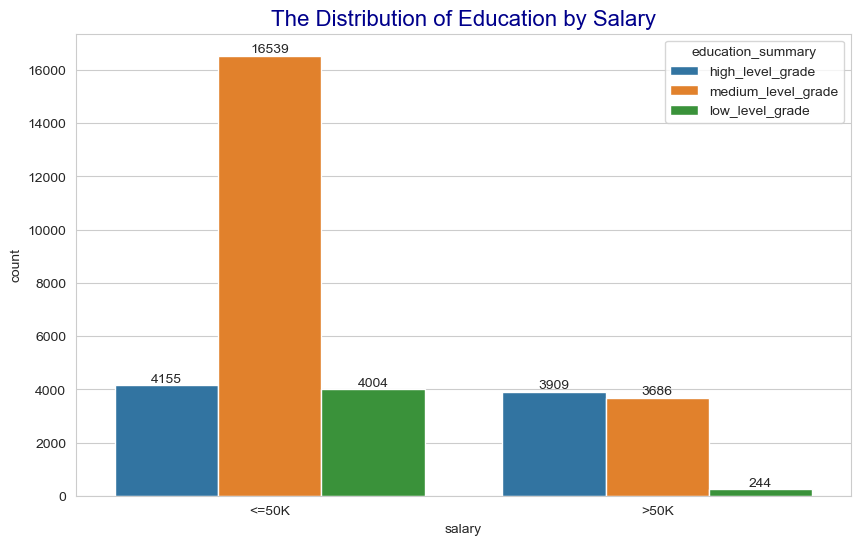

In [114]:
# Visualizing the number of persons in "salary" feature by "education_summary" (high, medium, low) 

ax = sns.countplot(data=df, x="salary", hue="education_summary")

plt.title("The Distribution of Education by Salary", fontsize=16, color="darkblue")

for container in ax.containers:
    ax.bar_label(container);

### Check the the percentage distribution of person in each these new education levels(high, medium, low) by "salary" levels and visualize it with pie plot separately

In [115]:
# The proportion of persons in each "salary" by "education_summary" levels (high, medium, low)

edu = df.groupby(["salary"]).education_summary.value_counts(normalize=True)
edu

salary  education_summary 
<=50K   medium_level_grade   0.670
        high_level_grade     0.168
        low_level_grade      0.162
>50K    high_level_grade     0.499
        medium_level_grade   0.470
        low_level_grade      0.031
Name: education_summary, dtype: float64

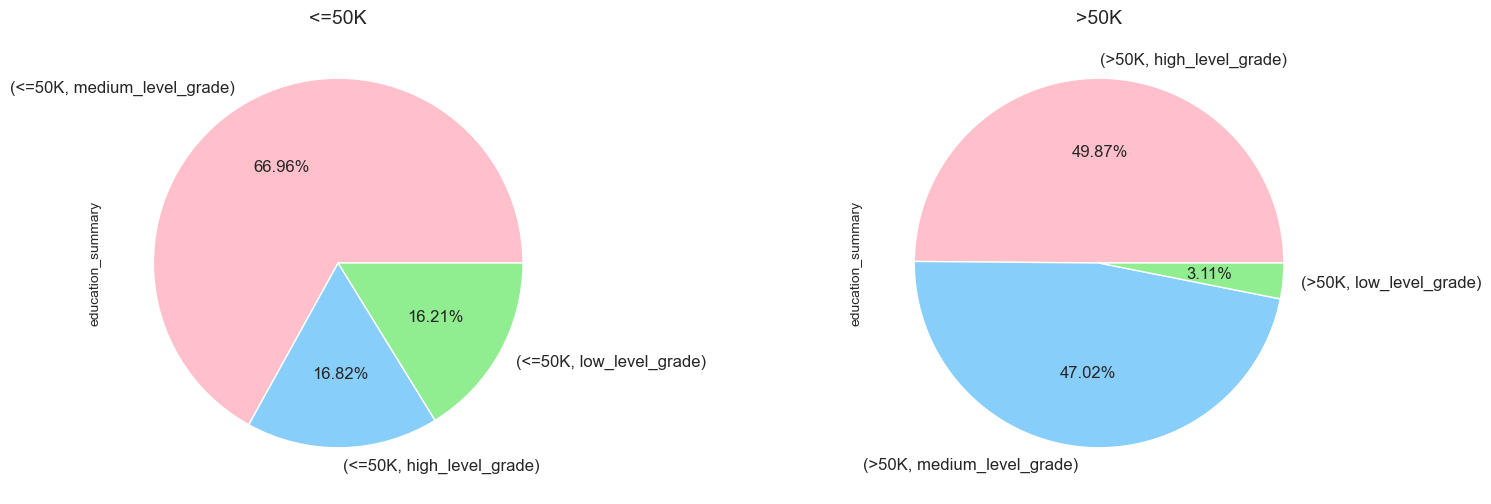

In [116]:
# Visualizing the percentages of persons in each "salary" group by Education levels (high, medium, low) 

plt.figure(figsize = (18, 6))
index = 1
for i in [0, 3]:
    plt.subplot(1, 2, index)
    edu[i:i+3].plot.pie(subplots=True,
                       #labels=["high", "medium", "low"],
                        autopct="%.2f%%",
                        textprops={'fontsize': 12},
                        colors=['pink', 'lightskyblue', 'lightgreen'],
                        )
    plt.title(edu.index[i][0], fontdict = {'fontsize': 14})
#    plt.legend()
    index += 1

In [117]:
# Creating a dataframe demonstrating the percentages of education level by Salary 

edu_df = pd.DataFrame(edu)
edu_df.rename(columns={"education_summary": "percentage"}, inplace=True)
edu_df.reset_index(inplace=True)
edu_df.sort_values(by=["salary", "education_summary"], inplace=True)
edu_df

salary   education_summary  percentage
1  <=50K    high_level_grade       0.168
2  <=50K     low_level_grade       0.162
0  <=50K  medium_level_grade       0.670
3   >50K    high_level_grade       0.499
5   >50K     low_level_grade       0.031
4   >50K  medium_level_grade       0.470

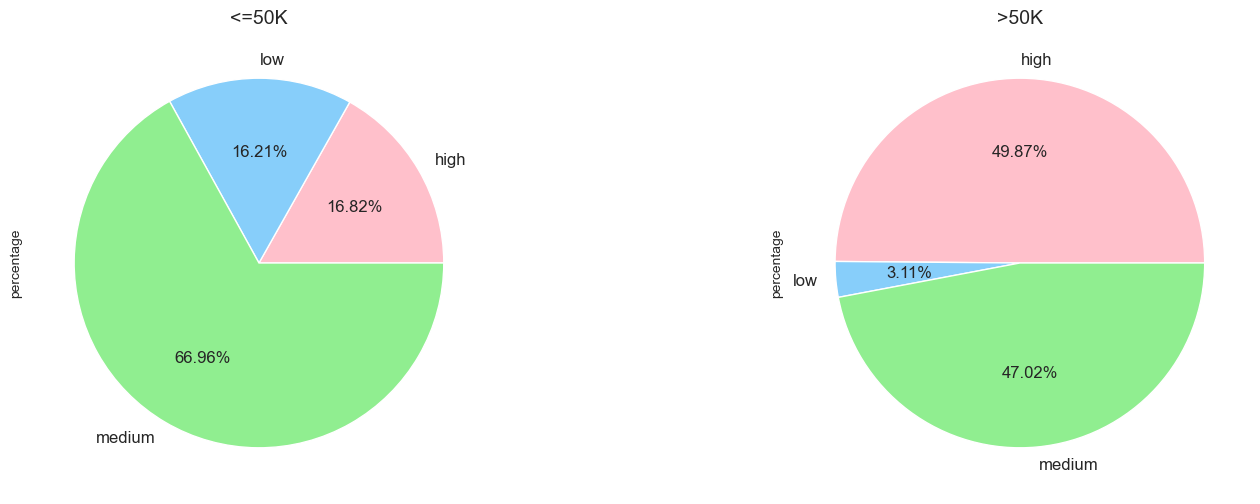

In [118]:
# Visualizing the percentages of persons in each "salary" group by Education levels (high, medium, low)

plt.figure(figsize = (18, 6))
index = 1
for i in [0, 3]:
    plt.subplot(1, 2, index)
    edu_df["percentage"][i:i+3].plot.pie(subplots=True,
                                         labels=["high", "low", "medium"],
                                         autopct="%.2f%%",
                                         textprops={'fontsize': 12},
                                         colors=['pink', 'lightskyblue', 'lightgreen'],
                                         )
    plt.title(edu_df.salary[i], fontdict = {'fontsize': 14})
#    plt.legend()
    index += 1

### Write down the conclusions you draw from your analysis

**Some Remarks on "education" Feature:** 

- Apparently, the individuals with higher education levels have higher income. In other words, the more education the more high income.
- It is a very low probability (3%) to earn more money when an individual has a lower educational background.

Sum up, the majority of participants that earn more than 50K (49,9%) have high level of education, while the majority of those that make 50K or less have medium level of educational attainment. Educational attainment level for high income group is higher. Education and salary seem to be significantly related.

### <div class="alert alert-info"><font color=black>marital_status & relationship :</font></div>

### Detect the similarities between these features by comparing unique values

In [119]:
# Checking the uniques of "marital_status" feature and determining their numbers

df.marital_status.value_counts(dropna=False)

Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64

In [120]:
# Checking the uniques of "relationship" feature and determining their numbers

df.relationship.value_counts(dropna=False)

Husband           13187
Not-in-family      8292
NaN                5064
Unmarried          3445
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [121]:
# Filling the missing values with "Unknown" in the column of "relationship"

df.relationship.fillna("Unknown", inplace=True)

In [122]:
df.relationship.value_counts(dropna=False)

Husband           13187
Not-in-family      8292
Unknown            5064
Unmarried          3445
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [123]:
# Checking the uniques of "relationship" and "marital_status" features and determining their numbers

df.groupby("relationship").marital_status.value_counts(dropna=False)

relationship    marital_status       
Husband         Married-civ-spouse       13178
                Married-AF-spouse            9
Not-in-family   Never-married             4694
                Divorced                  2403
                Widowed                    547
                Separated                  420
                Married-spouse-absent      211
                Married-civ-spouse          17
Other-relative  Never-married              611
                Married-civ-spouse         124
                Divorced                   110
                Separated                   55
                Widowed                     48
                Married-spouse-absent       32
                Married-AF-spouse            1
Unknown         Never-married             4481
                Divorced                   328
                Separated                   99
                Married-civ-spouse          95
                Married-spouse-absent       45
                Widowe

**Assessment :** These features have almost same info, but "relationship" feature has %15 of missing values. So I have decided to go my way with "marital_status" feature

### Visualize the count of person in each categories

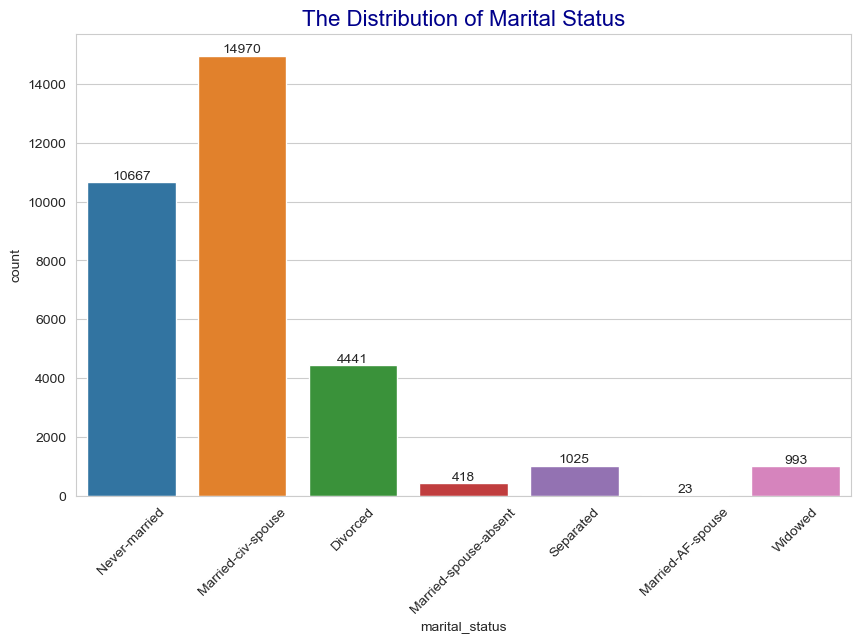

In [124]:
# Visualizing the number of persons in "marital_status" feature

ax = sns.countplot(data=df, x="marital_status")

plt.title("The Distribution of Marital Status", fontsize=16, color="darkblue")
plt.xticks(rotation=45)

for container in ax.containers:
    ax.bar_label(container);

### Check the count of person in each "salary" levels by categories and visualize it with countplot

In [125]:
# Checking "marital_status" feature by Salary in detail

df.groupby("marital_status").salary.value_counts()

marital_status         salary
Divorced               <=50K      3978
                       >50K        463
Married-AF-spouse      <=50K        13
                       >50K         10
Married-civ-spouse     <=50K      8280
                       >50K       6690
Married-spouse-absent  <=50K       384
                       >50K         34
Never-married          <=50K     10176
                       >50K        491
Separated              <=50K       959
                       >50K         66
Widowed                <=50K       908
                       >50K         85
Name: salary, dtype: int64

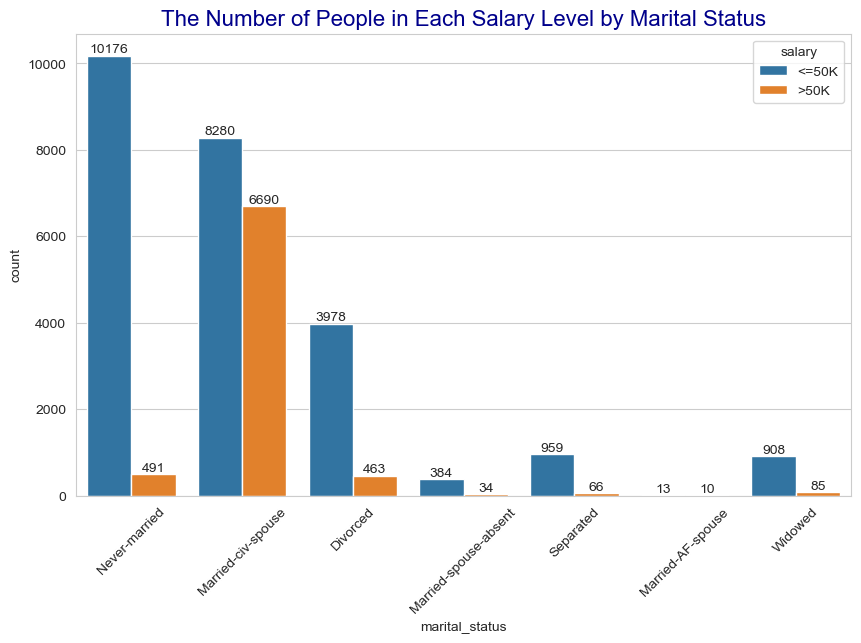

In [126]:
# Visualizing the number of people in each Salary level by "marital_status"  
 
ax = sns.countplot(data=df, x="marital_status", hue="salary")

plt.title("The Number of People in Each Salary Level by Marital Status", fontsize=16, color="darkblue")
plt.xticks(rotation=45)

for container in ax.containers:
    ax.bar_label(container);

**The number of categories in "marital_status" feature will be re-organized as married and unmarried for a more detailed investigation. The new feature will be added to the dataset as a new categorical data.**

### Decrease the number of categories in "marital_status" feature as married, and unmarried and create a new feature with this new categorical data

In [127]:
def mapping_marital_status(x):
    if x in ["Never-married", "Divorced", "Separated", "Widowed"]:
        return "unmarried"
    elif x in ["Married-civ-spouse", "Married-AF-spouse", "Married-spouse-absent"]:
        return "married"

In [128]:
df.marital_status.apply(mapping_marital_status).value_counts(dropna=False)

unmarried    17126
married      15411
Name: marital_status, dtype: int64

In [129]:
df["marital_status_summary"] = df.marital_status.apply(mapping_marital_status)
df.sample(3)

age         workclass  fnlwgt  education  education_num marital_status  \
10253   17                 ?  210547       10th          6.000  Never-married   
11073   47  Self-emp-not-inc  162236  Bachelors         13.000  Never-married   
20588   33         Local-gov  256529    HS-grad          9.000      Separated   

          occupation   relationship   race  gender  capital_gain  \
10253              ?        Unknown  White    Male             0   
11073   Craft-repair  Not-in-family  White  Female             0   
20588  Other-service        Unknown  White  Female             0   

       capital_loss  hours_per_week native_country salary   education_summary  \
10253             0              40  United-States  <=50K     low_level_grade   
11073             0              40  United-States  <=50K    high_level_grade   
20588             0              80  United-States  <=50K  medium_level_grade   

      marital_status_summary  
10253              unmarried  
11073              unmarried  
20588              unmarried

### Visualize the count of person in each categories for these new marital status (married, unmarried)

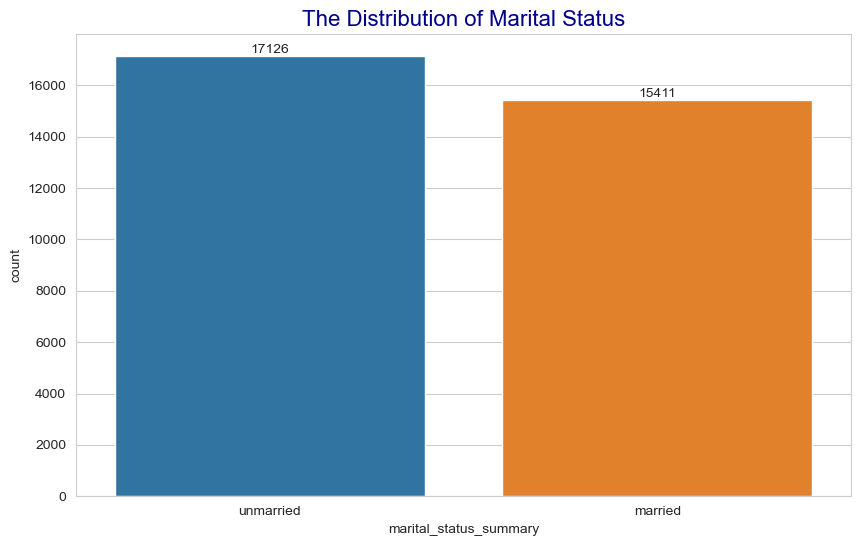

In [130]:
# Visualizing the number of persons in each sub-categories of "marital_status_summary" (unmarried, married) 

ax = sns.countplot(data=df, x="marital_status_summary")

plt.title("The Distribution of Marital Status", fontsize=16, color="darkblue")

for container in ax.containers:
    ax.bar_label(container);

### Check the count of person in each "salary" levels by these new marital status (married, unmarried) and visualize it with countplot

In [131]:
# Checking the number of persons in each sub-categories of "marital_status_summary" (unmarried, married) by Salary

df.groupby("marital_status_summary").salary.value_counts()

marital_status_summary  salary
married                 <=50K      8677
                        >50K       6734
unmarried               <=50K     16021
                        >50K       1105
Name: salary, dtype: int64

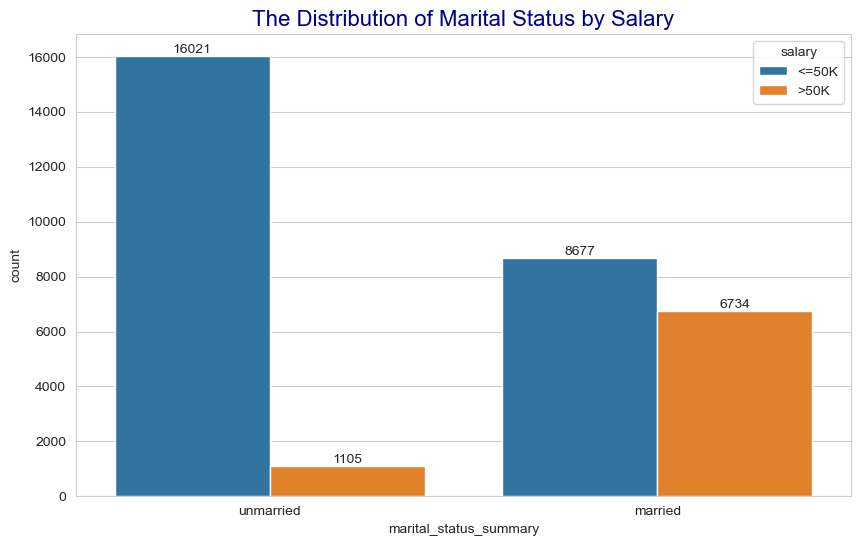

In [132]:
# Visualizing the number of persons in each sub-categories of "marital_status_summary" (unmarried, married) by Salary

ax = sns.countplot(data=df, x="marital_status_summary", hue="salary")

plt.title("The Distribution of Marital Status by Salary", fontsize=16, color="darkblue")

for container in ax.containers:
    ax.bar_label(container);

### Check the percentage distribution of person in each "salary" levels by each new marital status (married, unmarried) and visualize it with pie plot separately

In [133]:
# Checking the proportion of persons in each "marital_status_summary" by "salary" levels (<=50K, >50K)

marital = df.groupby(["marital_status_summary"]).salary.value_counts(normalize=True)
marital

marital_status_summary  salary
married                 <=50K    0.563
                        >50K     0.437
unmarried               <=50K    0.935
                        >50K     0.065
Name: salary, dtype: float64

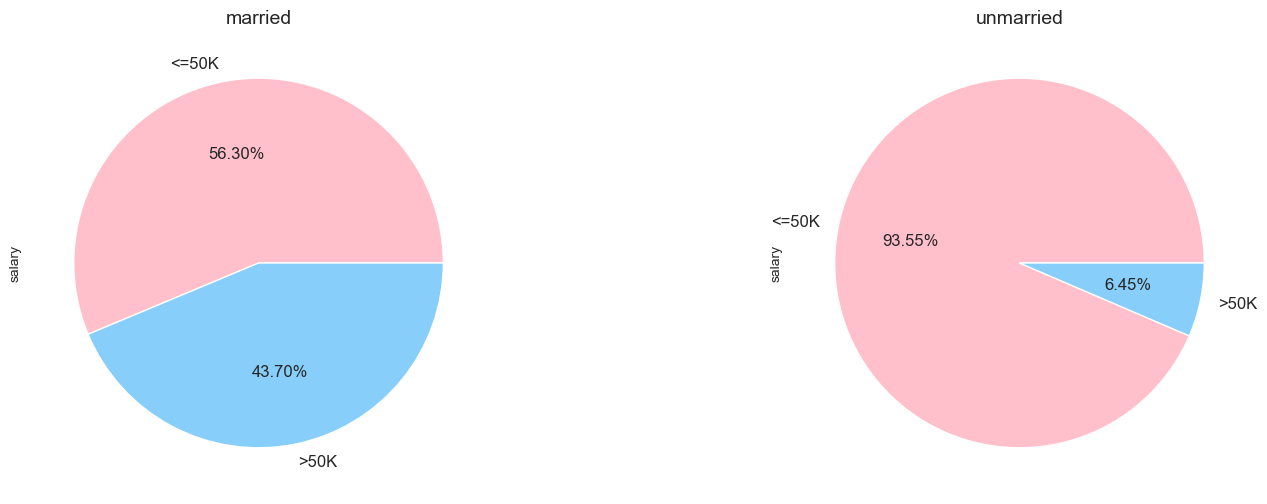

In [134]:
# Visualizing the percentages of persons in each "marital_status_summary" group by "salary" levels (<=50K, >50K)

plt.figure(figsize = (18, 6))
index = 1
for i in [0, 2]:
    plt.subplot(1,2,index)
    marital[i:i+2].plot.pie(subplots=True,
                            labels=["<=50K", ">50K"],
                            autopct="%.2f%%",
                            textprops={'fontsize': 12},
                            colors=['pink', 'lightskyblue']
                            )
    plt.title(marital.index[i][0], fontdict = {'fontsize': 14})
#    plt.legend()
    index += 1

### Check the count of person in each these new marital status (married, unmarried) by "salary" levels and visualize it with countplot

In [135]:
# Checking the number of persons in each sub-categories of Salary by "marital_status_summary" levels (unmarried, married) 

df.groupby("salary").marital_status_summary.value_counts()

salary  marital_status_summary
<=50K   unmarried                 16021
        married                    8677
>50K    married                    6734
        unmarried                  1105
Name: marital_status_summary, dtype: int64

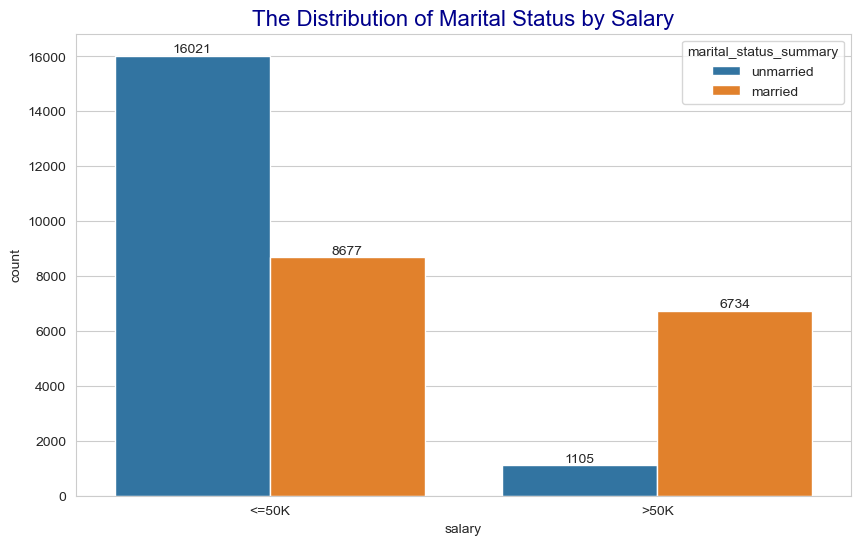

In [136]:
# Visualizing the number of persons in each sub-categories of Salary by "marital_status_summary" (unmarried, married)

ax = sns.countplot(data=df, x="salary", hue="marital_status_summary")

plt.title("The Distribution of Marital Status by Salary", fontsize=16, color="darkblue")

for container in ax.containers:
    ax.bar_label(container);

### Check the the percentage distribution of person in each these new marital status (married, unmarried) by "salary" levels and visualize it with pie plot separately

In [137]:
# Checking the proportion of persons in each "salary" levels (<=50K, >50K) by "marital_status_summary" (unmarried, married)

marital = df.groupby("salary").marital_status_summary.value_counts(normalize=True)
marital

salary  marital_status_summary
<=50K   unmarried                0.649
        married                  0.351
>50K    married                  0.859
        unmarried                0.141
Name: marital_status_summary, dtype: float64

In [138]:
# Creating a dataframe demonstrating the proportions at Salary by "marital_status_summary" levels (unmarried, married) 

marital_df = pd.DataFrame(marital)
marital_df.rename(columns={"marital_status_summary" : "percentage"}, inplace=True)
marital_df.reset_index(inplace=True)
marital_df.sort_values(by=["salary", "marital_status_summary"], inplace=True)
marital_df

salary marital_status_summary  percentage
1  <=50K                married       0.351
0  <=50K              unmarried       0.649
2   >50K                married       0.859
3   >50K              unmarried       0.141

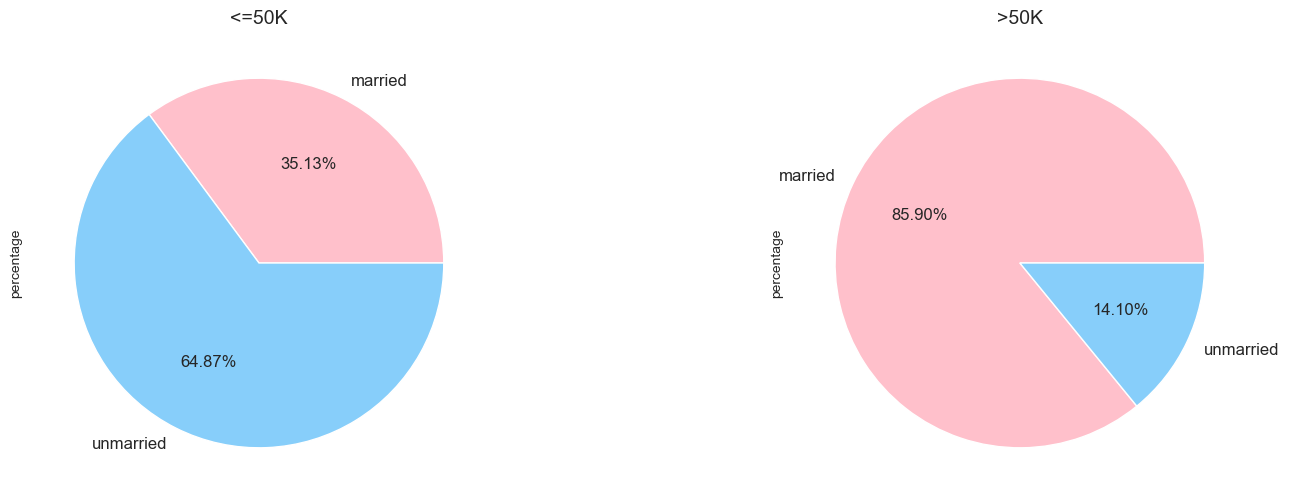

In [139]:
# Visualizing the percentages of persons in each "salary" levels (<=50K, >50K) by "marital_status_summary" levels (unmarried, married) 

plt.figure(figsize = (18, 6))
index = 1
for i in [0, 2]:
    plt.subplot(1,2,index)
    marital_df["percentage"][i:i+2].plot.pie(subplots=True,
                                             labels=["married", "unmarried"],
                                             autopct="%.2f%%",
                                             textprops={'fontsize': 12},
                                             colors=['pink', 'lightskyblue'],
                                             )
    plt.title(marital_df.salary[i], fontdict = {'fontsize': 14})
#    plt.legend()
    index += 1

### Write down the conclusions you draw from your analysis

**Some Remarks on "marital_status" Feature :** It can easily be stated that married persons have earned more income than single persons. Majority of the group (85.9%) that make more money than 50K are married. Marital status seem to be associated with the income of individuals.

To sum up, this may imply that the individuals who have high salary are more tend to be getting married or being married imposed to getting high salary.

### <div class="alert alert-info"><font color=black>workclass :</font></div>

### Check the count of person in each categories and visualize it with countplot

In [140]:
# Checking the counts of unique values in "workclass" feature

df.workclass.value_counts(dropna=False)

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

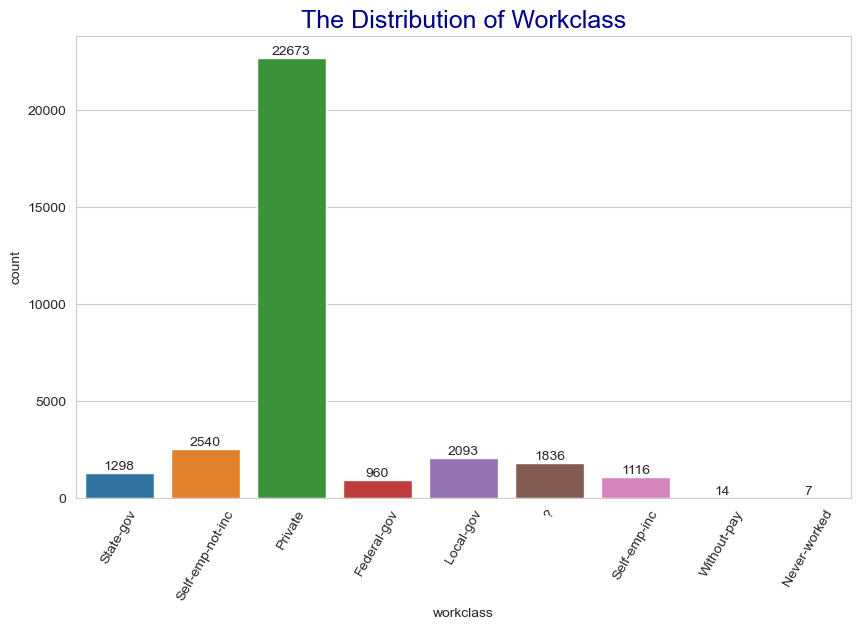

In [141]:
# Visualizing the number of people in each category of "workclass"

ax = sns.countplot(data=df, x="workclass")

plt.title("The Distribution of Workclass", fontsize=18, color="darkblue")
plt.xticks(rotation=60)

for container in ax.containers:
    ax.bar_label(container);

### Replace the value "?" to the value "Unknown"

In [142]:
# Replacing "?" values with "Unknown"

df.workclass.replace("?", "Unknown", inplace=True)

In [143]:
df.workclass.value_counts(dropna=False)

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
Unknown              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

### Check the count of person in each "salary" levels by workclass groups and visualize it with countplot

In [144]:
# Checking the number of persons in each sub-categories of "workclass" by "salary" levels  

df.groupby("workclass").salary.value_counts()

workclass         salary
Federal-gov       <=50K       589
                  >50K        371
Local-gov         <=50K      1476
                  >50K        617
Never-worked      <=50K         7
Private           <=50K     17712
                  >50K       4961
Self-emp-inc      >50K        622
                  <=50K       494
Self-emp-not-inc  <=50K      1816
                  >50K        724
State-gov         <=50K       945
                  >50K        353
Unknown           <=50K      1645
                  >50K        191
Without-pay       <=50K        14
Name: salary, dtype: int64

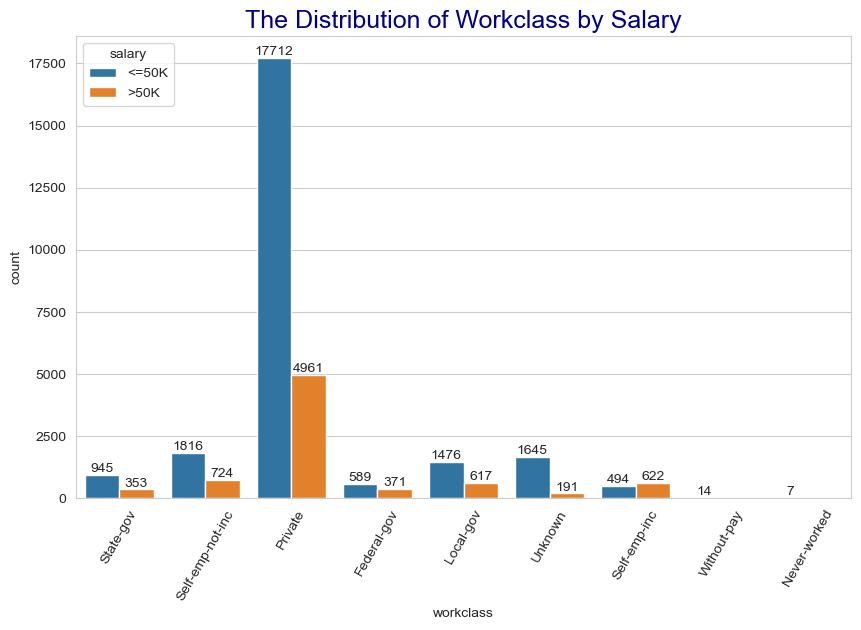

In [145]:
# Visualizing the number of "workclass" by Salary 

ax = sns.countplot(data = df, x="workclass", hue="salary")

plt.title("The Distribution of Workclass by Salary", fontsize=18, color="darkblue")
plt.xticks(rotation=60)

for container in ax.containers:
    ax.bar_label(container);

**Domain Knowledge:** ``Self-employment income`` is income that arises from the performance of personal services, but which cannot be classified as wages because an employer-employee relationship does not exist between the payer and the payee.

### Check the percentage distribution of person in each "salary" levels by each workclass groups and visualize it with bar plot

In [146]:
# The proportion of persons in each "workclass" levels by "salary" (<=50K, >50K)

workclass = df.groupby("workclass").salary.value_counts(normalize=True)
workclass

workclass         salary
Federal-gov       <=50K    0.614
                  >50K     0.386
Local-gov         <=50K    0.705
                  >50K     0.295
Never-worked      <=50K    1.000
Private           <=50K    0.781
                  >50K     0.219
Self-emp-inc      >50K     0.557
                  <=50K    0.443
Self-emp-not-inc  <=50K    0.715
                  >50K     0.285
State-gov         <=50K    0.728
                  >50K     0.272
Unknown           <=50K    0.896
                  >50K     0.104
Without-pay       <=50K    1.000
Name: salary, dtype: float64

In [147]:
# Creating a dataframe demonstrating the proportions at "workclass" by "salary" levels 

workclass_df = pd.DataFrame(workclass)
workclass_df.rename(columns={"salary": "percentage"}, inplace=True)
workclass_df.reset_index(inplace = True)
workclass_df.sort_values(by=["workclass", "salary"], inplace=True)
workclass_df

workclass salary  percentage
0        Federal-gov  <=50K       0.614
1        Federal-gov   >50K       0.386
2          Local-gov  <=50K       0.705
3          Local-gov   >50K       0.295
4       Never-worked  <=50K       1.000
5            Private  <=50K       0.781
6            Private   >50K       0.219
8       Self-emp-inc  <=50K       0.443
7       Self-emp-inc   >50K       0.557
9   Self-emp-not-inc  <=50K       0.715
10  Self-emp-not-inc   >50K       0.285
11         State-gov  <=50K       0.728
12         State-gov   >50K       0.272
13           Unknown  <=50K       0.896
14           Unknown   >50K       0.104
15       Without-pay  <=50K       1.000

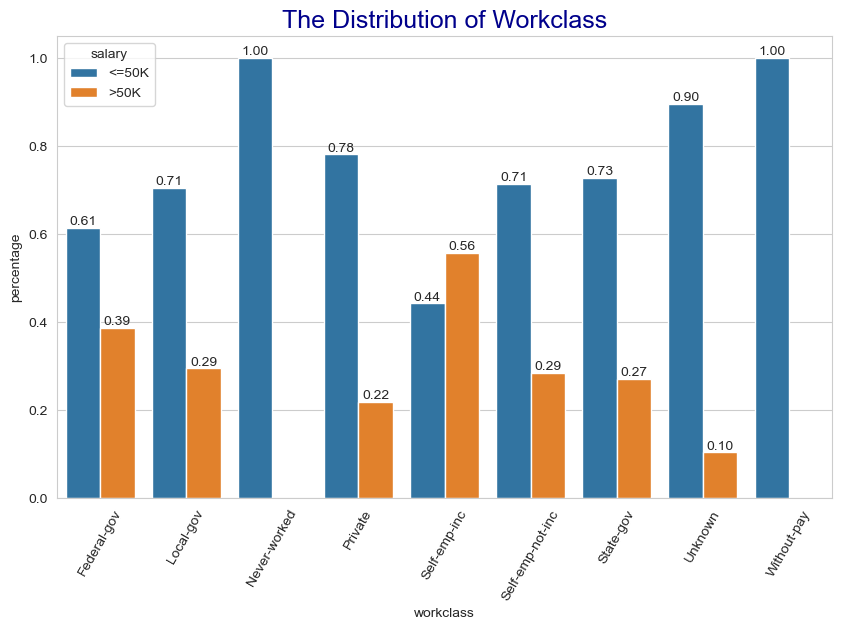

In [148]:
# Visualizing the number of persons in each sub-categories of "workclass" by "salary" 

fig, ax = plt.subplots()

ax = sns.barplot(data = workclass_df, x="workclass", y="percentage", hue="salary")

plt.title("The Distribution of Workclass", fontsize=18, color="darkblue")
plt.xticks(rotation=60)

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f");

### Check the count of person in each workclass groups by "salary" levels and visualize it with countplot

In [149]:
# Checking the number of persons in each sub-categories of "salary" by "workclass" levels 

df.groupby("salary").workclass.value_counts()

salary  workclass       
<=50K   Private             17712
        Self-emp-not-inc     1816
        Unknown              1645
        Local-gov            1476
        State-gov             945
        Federal-gov           589
        Self-emp-inc          494
        Without-pay            14
        Never-worked            7
>50K    Private              4961
        Self-emp-not-inc      724
        Self-emp-inc          622
        Local-gov             617
        Federal-gov           371
        State-gov             353
        Unknown               191
Name: workclass, dtype: int64

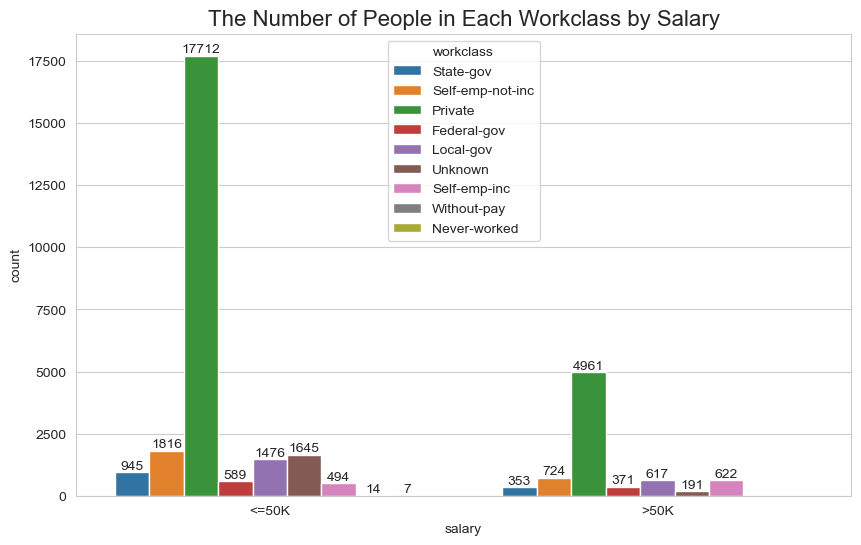

In [150]:
# Visualizing the number of persons in each sub-categories of "salary" by "workclass" levels 

ax = sns.countplot(data=df, x="salary", hue="workclass")

plt.title("The Number of People in Each Workclass by Salary", fontsize=16)
for container in ax.containers:
    ax.bar_label(container);

### Check the the percentage distribution of person in each workclass groups by "salary" levels and visualize it with countplot

In [151]:
# The proportion of persons in each sub-categories of "salary" by "workclass" levels 

workclass = df.groupby("salary").workclass.value_counts(normalize=True)
workclass

salary  workclass       
<=50K   Private            0.717
        Self-emp-not-inc   0.074
        Unknown            0.067
        Local-gov          0.060
        State-gov          0.038
        Federal-gov        0.024
        Self-emp-inc       0.020
        Without-pay        0.001
        Never-worked       0.000
>50K    Private            0.633
        Self-emp-not-inc   0.092
        Self-emp-inc       0.079
        Local-gov          0.079
        Federal-gov        0.047
        State-gov          0.045
        Unknown            0.024
Name: workclass, dtype: float64

In [152]:
# Creating a dataframe demonstrating the proportions at "salary" by "workclass" levels 

workclass_df = pd.DataFrame(workclass)
workclass_df.rename(columns={"workclass": "percentage"}, inplace=True)
workclass_df.reset_index(inplace=True)
workclass_df.sort_values(by=["salary", "percentage"], ascending=False, inplace=True)
workclass_df

salary         workclass  percentage
9    >50K           Private       0.633
10   >50K  Self-emp-not-inc       0.092
11   >50K      Self-emp-inc       0.079
12   >50K         Local-gov       0.079
13   >50K       Federal-gov       0.047
14   >50K         State-gov       0.045
15   >50K           Unknown       0.024
0   <=50K           Private       0.717
1   <=50K  Self-emp-not-inc       0.074
2   <=50K           Unknown       0.067
3   <=50K         Local-gov       0.060
4   <=50K         State-gov       0.038
5   <=50K       Federal-gov       0.024
6   <=50K      Self-emp-inc       0.020
7   <=50K       Without-pay       0.001
8   <=50K      Never-worked       0.000

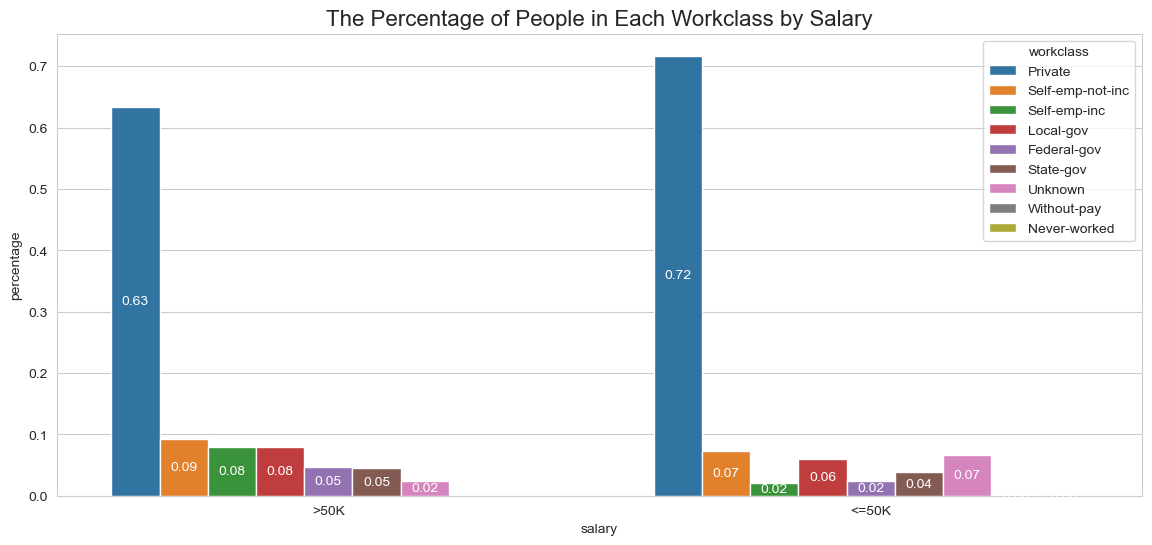

In [153]:
# Visualizing the proportion of persons in each sub-categories of "salary" by "workclass" levels  

fig, ax = plt.subplots(figsize=(14, 6))

ax = sns.barplot(data=workclass_df, x="salary", y="percentage", hue="workclass")

plt.title("The Percentage of People in Each Workclass by Salary", fontsize=16)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='center', color="w");

### Write down the conclusions you draw from your analysis

**Result :** The share of Federal, state and local government workers and self-employed individuals are relatively higher for the category of income above 50K compared to their respective values for below 50K salary group.

"Self-emp-inc" work-class has a high ratio in the self group about high-level income. "Private" work-class has a high ratio in both income groups. However, the rate of those in the high level income group in their own group is slightly lower than those in the lower income group.

### <div class="alert alert-info"><font color=black>occupation :</font></div>

### Check the count of person in each sub-categories of occupation and visualize it with countplot

In [154]:
# Checking the counts of unique values in "occupation" feature

df.occupation.value_counts(dropna=False)

Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
?                    1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

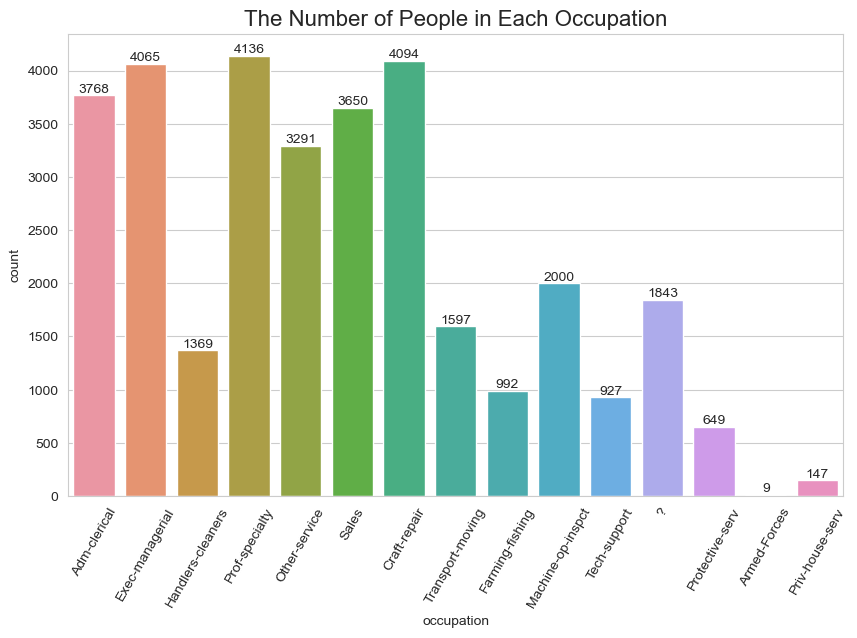

In [155]:
# Visualizing the number of people in each category of "occupation"

ax = sns.countplot(data=df, x="occupation")

plt.title("The Number of People in Each Occupation", fontsize=16)
plt.xticks(rotation=60)

for container in ax.containers:
    ax.bar_label(container);

### Replace the value "?" to the value "Unknown"

In [156]:
# Replacing "?" values with "Unknown"

df.occupation.replace("?", "Unknown", inplace=True)

In [157]:
df.occupation.value_counts(dropna=False)

Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
Unknown              1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

### Check the count of person in each "salary" levels by occupation groups and visualize it with countplot

In [158]:
# Checking the number of persons in each sub-categories of "occupation" by "salary" levels  

df.groupby("occupation").salary.value_counts()

occupation         salary
Adm-clerical       <=50K     3261
                   >50K       507
Armed-Forces       <=50K        8
                   >50K         1
Craft-repair       <=50K     3165
                   >50K       929
Exec-managerial    <=50K     2097
                   >50K      1968
Farming-fishing    <=50K      877
                   >50K       115
Handlers-cleaners  <=50K     1283
                   >50K        86
Machine-op-inspct  <=50K     1751
                   >50K       249
Other-service      <=50K     3154
                   >50K       137
Priv-house-serv    <=50K      146
                   >50K         1
Prof-specialty     <=50K     2278
                   >50K      1858
Protective-serv    <=50K      438
                   >50K       211
Sales              <=50K     2667
                   >50K       983
Tech-support       <=50K      644
                   >50K       283
Transport-moving   <=50K     1277
                   >50K       320
Unknown            <=5

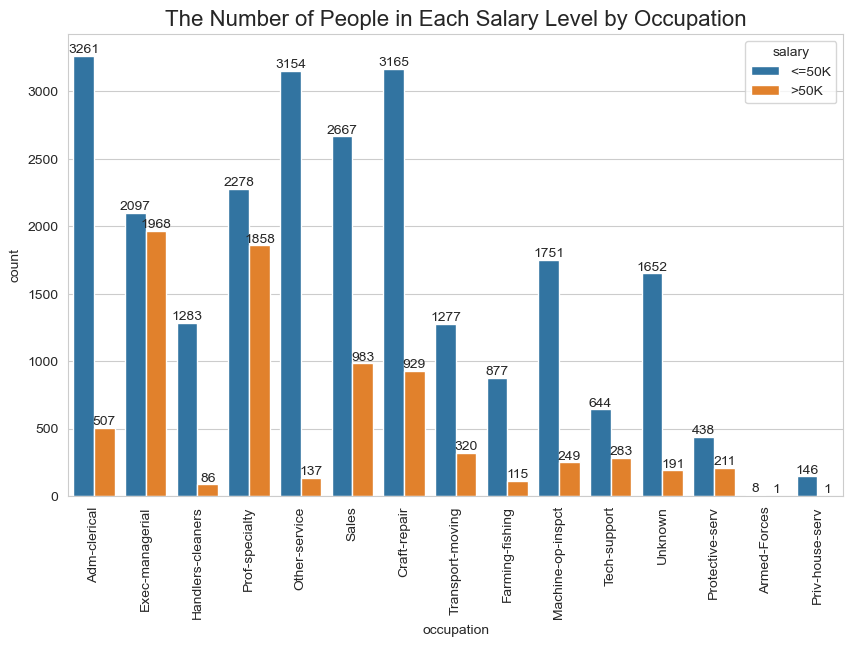

In [159]:
# Visualizing the number of "occupation" by Salary 

ax = sns.countplot(data=df, x="occupation", hue="salary")

plt.title("The Number of People in Each Salary Level by Occupation", fontsize=16)
plt.xticks(rotation=90)

for container in ax.containers:
    ax.bar_label(container);

### Check the percentage distribution of person in each "salary" levels by each occupation groups and visualize it with bar plot

In [160]:
# Checking the proportion of persons in each "salary" levels (<=50K, >50K) by "occupation" 

occupation = df.groupby("occupation").salary.value_counts(normalize=True)
occupation

occupation         salary
Adm-clerical       <=50K    0.865
                   >50K     0.135
Armed-Forces       <=50K    0.889
                   >50K     0.111
Craft-repair       <=50K    0.773
                   >50K     0.227
Exec-managerial    <=50K    0.516
                   >50K     0.484
Farming-fishing    <=50K    0.884
                   >50K     0.116
Handlers-cleaners  <=50K    0.937
                   >50K     0.063
Machine-op-inspct  <=50K    0.875
                   >50K     0.124
Other-service      <=50K    0.958
                   >50K     0.042
Priv-house-serv    <=50K    0.993
                   >50K     0.007
Prof-specialty     <=50K    0.551
                   >50K     0.449
Protective-serv    <=50K    0.675
                   >50K     0.325
Sales              <=50K    0.731
                   >50K     0.269
Tech-support       <=50K    0.695
                   >50K     0.305
Transport-moving   <=50K    0.800
                   >50K     0.200
Unknown            <=5

In [161]:
# Creating a dataframe demonstrating the proportions at "occupation" by "salary" levels 

occupation_df = pd.DataFrame(occupation)
occupation_df.rename(columns={"salary": "percentage"}, inplace=True)
occupation_df.reset_index(inplace=True)
occupation_df.sort_values(by = ["occupation", "salary"], inplace=True)
occupation_df

occupation salary  percentage
0        Adm-clerical  <=50K       0.865
1        Adm-clerical   >50K       0.135
2        Armed-Forces  <=50K       0.889
3        Armed-Forces   >50K       0.111
4        Craft-repair  <=50K       0.773
5        Craft-repair   >50K       0.227
6     Exec-managerial  <=50K       0.516
7     Exec-managerial   >50K       0.484
8     Farming-fishing  <=50K       0.884
9     Farming-fishing   >50K       0.116
10  Handlers-cleaners  <=50K       0.937
11  Handlers-cleaners   >50K       0.063
12  Machine-op-inspct  <=50K       0.875
13  Machine-op-inspct   >50K       0.124
14      Other-service  <=50K       0.958
15      Other-service   >50K       0.042
16    Priv-house-serv  <=50K       0.993
17    Priv-house-serv   >50K       0.007
18     Prof-specialty  <=50K       0.551
19     Prof-specialty   >50K       0.449
20    Protective-serv  <=50K       0.675
21    Protective-serv   >50K       0.325
22              Sales  <=50K       0.731
23              Sales   >50K       0.269
24       Tech-support  <=50K       0.695
25       Tech-support   >50K       0.305
26   Transport-moving  <=50K       0.800
27   Transport-moving   >50K       0.200
28            Unknown  <=50K       0.896
29            Unknown   >50K       0.104

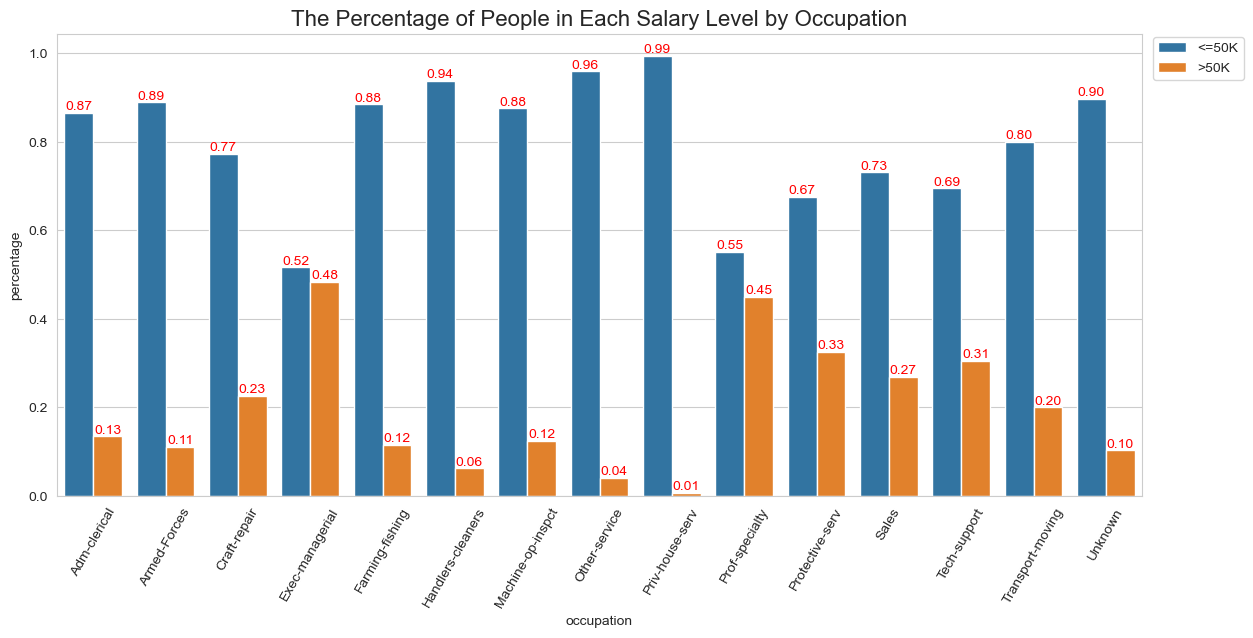

In [162]:
# Visualizing the proportion of persons in each sub-categories of "salary" by "workclass" levels  

fig, ax = plt.subplots(figsize=(14, 6))

ax = sns.barplot(data=occupation_df, x="occupation", y="percentage", hue="salary")

plt.title("The Percentage of People in Each Salary Level by Occupation", fontsize=16)
plt.xticks(rotation=60)
plt.legend(loc=(1.01, 0.9))

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', color="r");

### Check the count of person in each occupation groups by "salary" levels and visualize it with countplot

In [163]:
# Checking the number of persons in each "salary" levels by "occupation" 

df.groupby("salary").occupation.value_counts()

salary  occupation       
<=50K   Adm-clerical         3261
        Craft-repair         3165
        Other-service        3154
        Sales                2667
        Prof-specialty       2278
        Exec-managerial      2097
        Machine-op-inspct    1751
        Unknown              1652
        Handlers-cleaners    1283
        Transport-moving     1277
        Farming-fishing       877
        Tech-support          644
        Protective-serv       438
        Priv-house-serv       146
        Armed-Forces            8
>50K    Exec-managerial      1968
        Prof-specialty       1858
        Sales                 983
        Craft-repair          929
        Adm-clerical          507
        Transport-moving      320
        Tech-support          283
        Machine-op-inspct     249
        Protective-serv       211
        Unknown               191
        Other-service         137
        Farming-fishing       115
        Handlers-cleaners      86
        Armed-Forces  

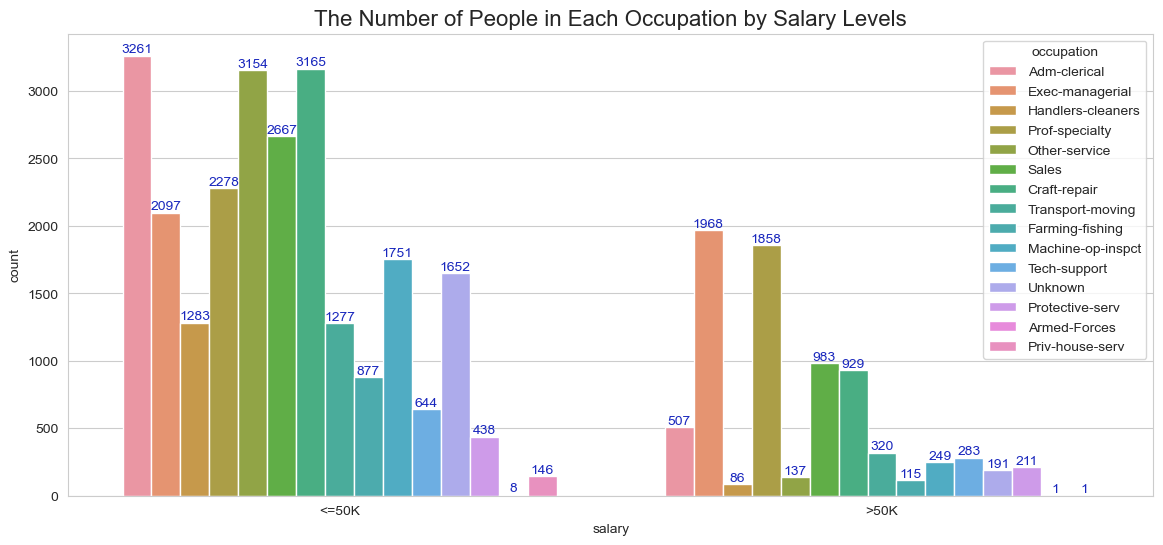

In [164]:
# Visualizing the number of persons in each "occupation" group by "salary" levels 

fig, ax = plt.subplots(figsize=(14, 6))

ax = sns.countplot(data=df, x="salary", hue="occupation")

plt.title("The Number of People in Each Occupation by Salary Levels", fontsize=16)
for container in ax.containers:
    ax.bar_label(container, color="#1927BD");

### Check the percentage  of person in each occupation groups by "salary" levels and visualize it with bar plot

In [165]:
# Checking the percentage of persons in each "occupation" group by "salary" levels 

occupation = df.groupby("salary").occupation.value_counts(normalize=True)*100
occupation

salary  occupation       
<=50K   Adm-clerical        13.203
        Craft-repair        12.815
        Other-service       12.770
        Sales               10.798
        Prof-specialty       9.223
        Exec-managerial      8.491
        Machine-op-inspct    7.090
        Unknown              6.689
        Handlers-cleaners    5.195
        Transport-moving     5.170
        Farming-fishing      3.551
        Tech-support         2.607
        Protective-serv      1.773
        Priv-house-serv      0.591
        Armed-Forces         0.032
>50K    Exec-managerial     25.105
        Prof-specialty      23.702
        Sales               12.540
        Craft-repair        11.851
        Adm-clerical         6.468
        Transport-moving     4.082
        Tech-support         3.610
        Machine-op-inspct    3.176
        Protective-serv      2.692
        Unknown              2.437
        Other-service        1.748
        Farming-fishing      1.467
        Handlers-cleaners    

In [166]:
# Creating a dataframe demonstrating the percentages of people at "occupation" by "salary" levels 

occupation_df = pd.DataFrame(occupation)
occupation_df.rename(columns = {"occupation": "percentage"}, inplace=True)
occupation_df.reset_index(inplace=True)
occupation_df.sort_values(by=["salary", "occupation"], inplace=True)
occupation_df

salary         occupation  percentage
0   <=50K       Adm-clerical      13.203
14  <=50K       Armed-Forces       0.032
1   <=50K       Craft-repair      12.815
5   <=50K    Exec-managerial       8.491
10  <=50K    Farming-fishing       3.551
8   <=50K  Handlers-cleaners       5.195
6   <=50K  Machine-op-inspct       7.090
2   <=50K      Other-service      12.770
13  <=50K    Priv-house-serv       0.591
4   <=50K     Prof-specialty       9.223
12  <=50K    Protective-serv       1.773
3   <=50K              Sales      10.798
11  <=50K       Tech-support       2.607
9   <=50K   Transport-moving       5.170
7   <=50K            Unknown       6.689
19   >50K       Adm-clerical       6.468
28   >50K       Armed-Forces       0.013
18   >50K       Craft-repair      11.851
15   >50K    Exec-managerial      25.105
26   >50K    Farming-fishing       1.467
27   >50K  Handlers-cleaners       1.097
22   >50K  Machine-op-inspct       3.176
25   >50K      Other-service       1.748
29   >50K    Priv-house-serv       0.013
16   >50K     Prof-specialty      23.702
23   >50K    Protective-serv       2.692
17   >50K              Sales      12.540
21   >50K       Tech-support       3.610
20   >50K   Transport-moving       4.082
24   >50K            Unknown       2.437

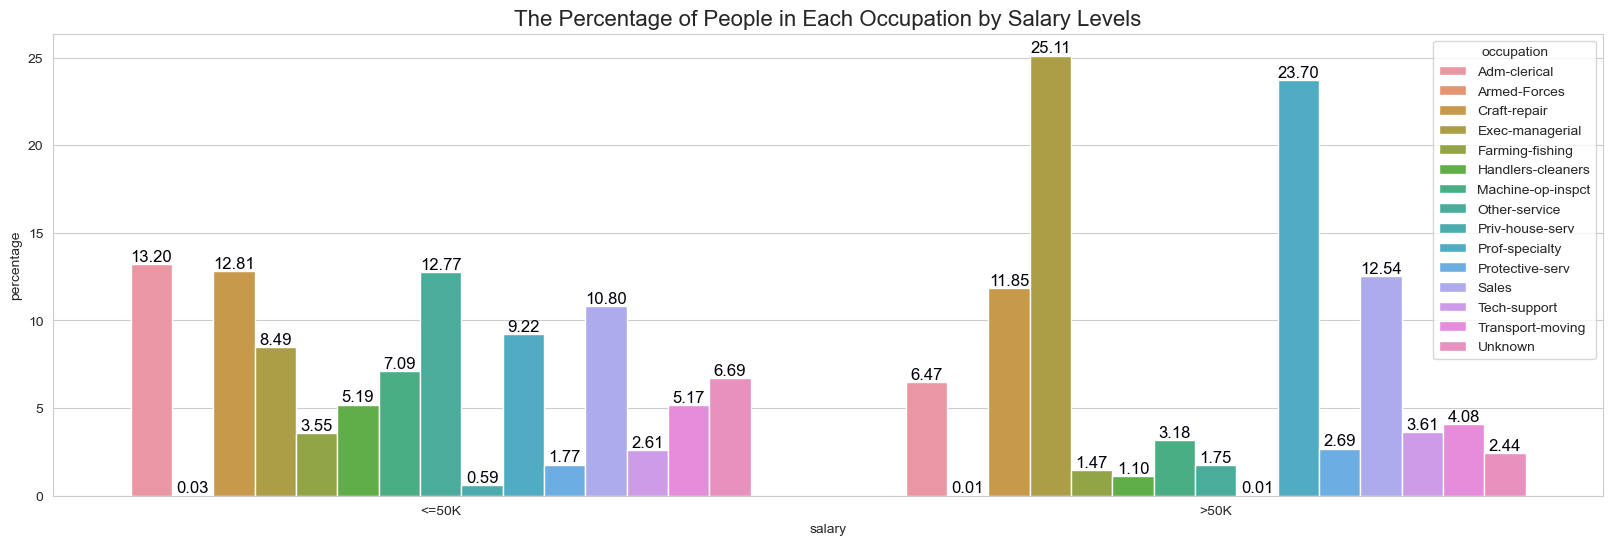

In [167]:
# Visualizing the percentage of persons at "occupation" by "salary" levels 

fig, ax = plt.subplots(figsize=(20, 6))

ax = sns.barplot(data=occupation_df, x="salary", y="percentage", hue="occupation")

plt.title("The Percentage of People in Each Occupation by Salary Levels", fontsize=16)
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", color="#00010A", fontsize=12);

### Write down the conclusions you draw from your analysis

**Some Remarks on "occupation" Feature:** "Exec-managerial" and "Prof-specialty" occupations have a high ratio of high-level income both in the self group and in the high-income group.

### <div class="alert alert-info"><font color=black>race :</font></div>

### Check the count of person in each categories and visualize it with countplot

In [168]:
# Checking the counts of unique values in "race" feature

df.race.value_counts(dropna=False)

White                 27795
Black                  3122
Asian-Pac-Islander     1038
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

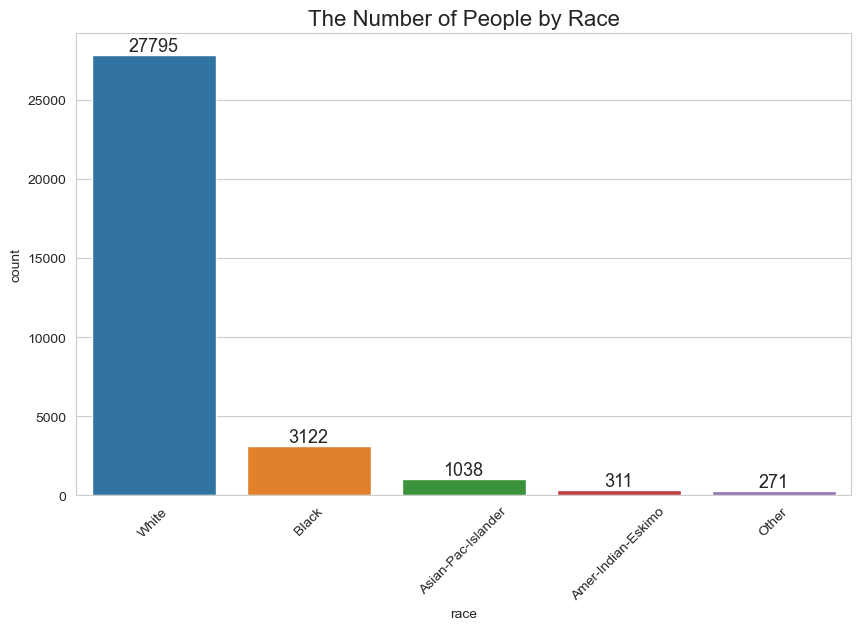

In [169]:
# Visualizing the number of people in each category of "race"

ax = sns.countplot(data=df, x="race")

plt.title("The Number of People by Race", fontsize=16)
plt.xticks(rotation=45)

for container in ax.containers:
    ax.bar_label(container, fontsize=13);

### Check the count of person in each "salary" levels by races and visualize it with countplot

In [170]:
# Checking the number of persons in each sub-categories of "race" by "salary"   

df.groupby("race").salary.value_counts()

race                salary
Amer-Indian-Eskimo  <=50K       275
                    >50K         36
Asian-Pac-Islander  <=50K       762
                    >50K        276
Black               <=50K      2735
                    >50K        387
Other               <=50K       246
                    >50K         25
White               <=50K     20680
                    >50K       7115
Name: salary, dtype: int64

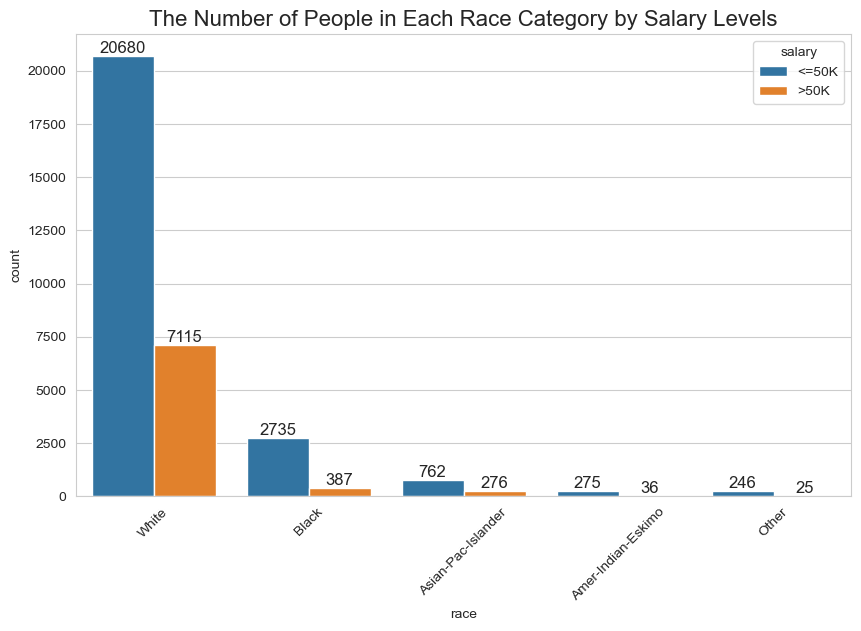

In [171]:
# Visualizing the number of people in each category of "salary" by "race"  

ax = sns.countplot(data=df, x="race", hue="salary")

plt.title("The Number of People in Each Race Category by Salary Levels", fontsize=16);
plt.xticks(rotation=45)

for container in ax.containers:
    ax.bar_label(container, fontsize=12);

### Check the percentage distribution of person in each "salary" levels by each races and visualize it with pie plot

In [172]:
# Checking the proportion of people in each "race" group by "salary" levels

race = df.groupby("race").salary.value_counts(normalize=True)
race

race                salary
Amer-Indian-Eskimo  <=50K    0.884
                    >50K     0.116
Asian-Pac-Islander  <=50K    0.734
                    >50K     0.266
Black               <=50K    0.876
                    >50K     0.124
Other               <=50K    0.908
                    >50K     0.092
White               <=50K    0.744
                    >50K     0.256
Name: salary, dtype: float64

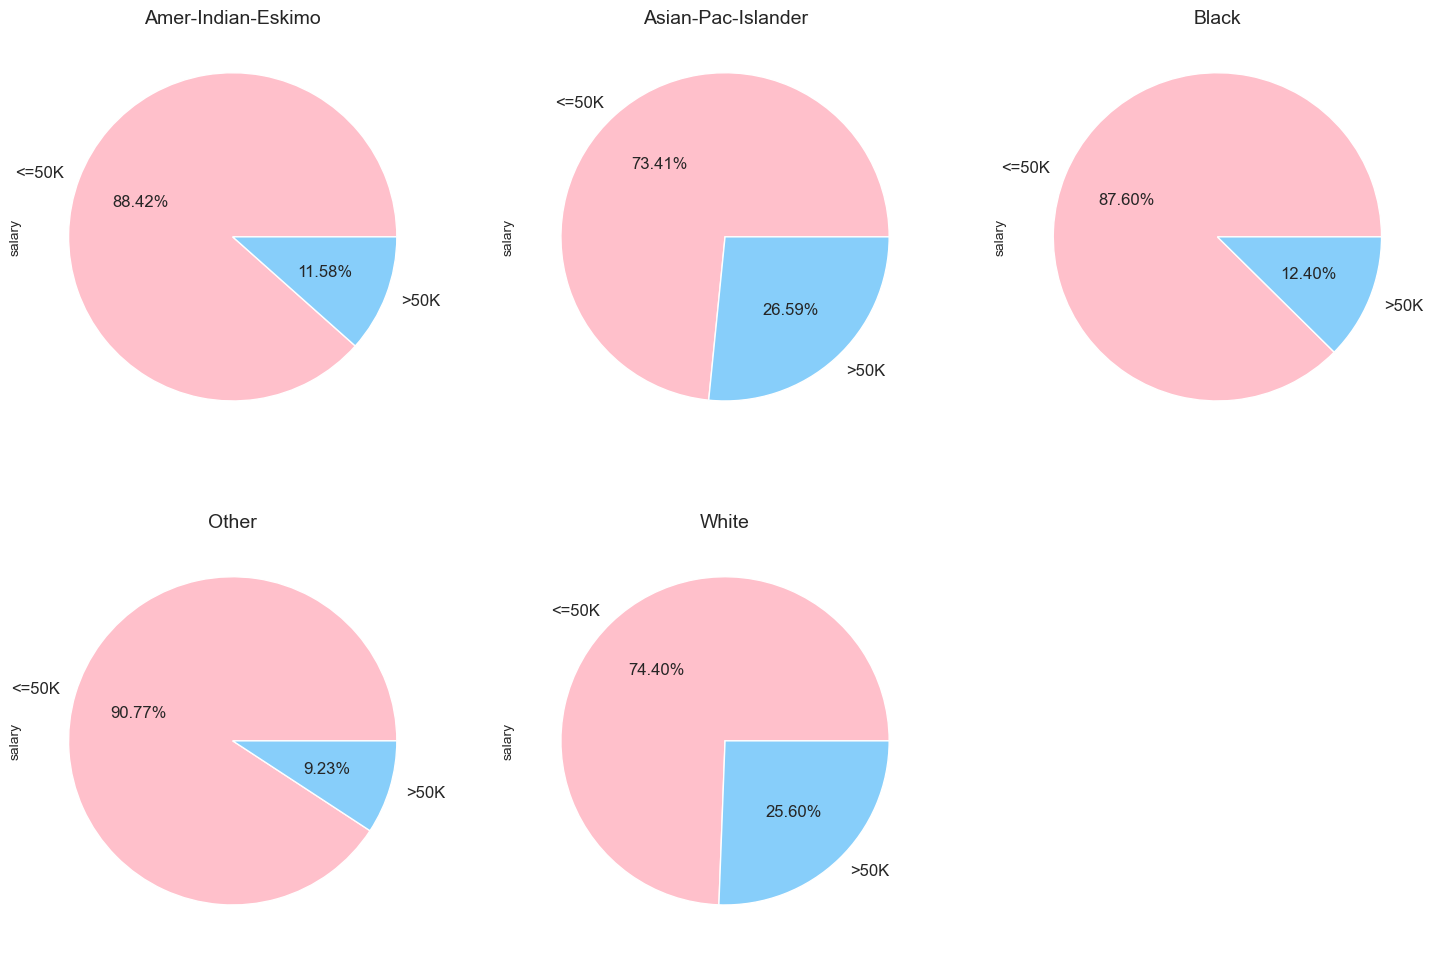

In [173]:
# Visualizing the percentage of people in each "race" group by "salary" levels

plt.figure(figsize = (18, 12))
index = 1
for i in [0, 2, 4, 6, 8]:
    plt.subplot(2,3,index)
    race[i:i+2].plot.pie(subplots=True,
                         labels=["<=50K", ">50K"],
                         autopct="%.2f%%",
                         textprops={'fontsize': 12},
                         colors=['pink', 'lightskyblue'],
                         )
    plt.title(race.index[i][0], fontdict = {'fontsize': 14})
#    plt.legend()
    index += 1

### Check the count of person in each races by "salary" levels and visualize it with countplot

In [174]:
# Checking the number of persons in each sub-categories of "race" by "salary" levels  

df.groupby("salary").race.value_counts()

salary  race              
<=50K   White                 20680
        Black                  2735
        Asian-Pac-Islander      762
        Amer-Indian-Eskimo      275
        Other                   246
>50K    White                  7115
        Black                   387
        Asian-Pac-Islander      276
        Amer-Indian-Eskimo       36
        Other                    25
Name: race, dtype: int64

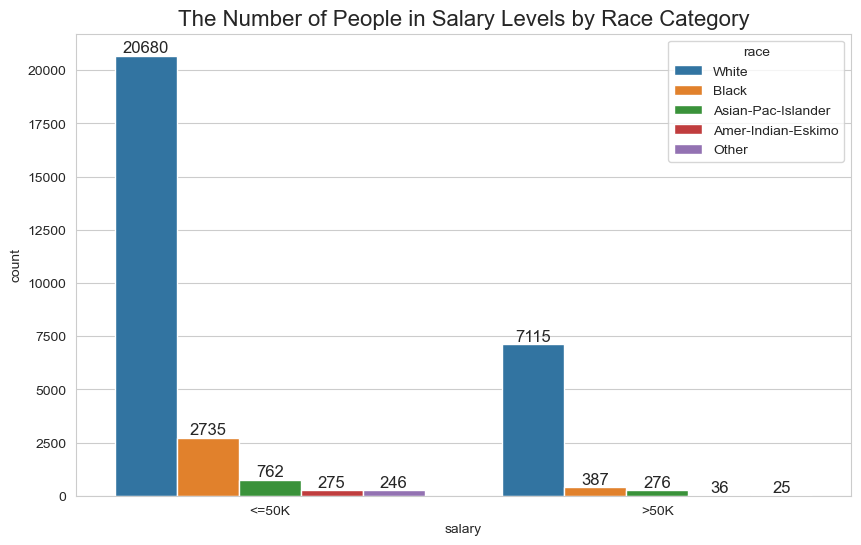

In [175]:
# Visualizing the number of persons in each sub-categories of "race" by "salary" levels  

ax = sns.countplot(data=df, x="salary", hue="race")

plt.title("The Number of People in Salary Levels by Race Category", fontsize=16);
for container in ax.containers:
    ax.bar_label(container, fontsize=12);

**Check the the percentage distribution of person in each races by "salary" levels and visualize it with bar plot**

In [176]:
# Checking the percentage of persons at "race" by "salary" levels 

race = df.groupby("salary").race.value_counts(normalize=True)*100
race

salary  race              
<=50K   White                83.731
        Black                11.074
        Asian-Pac-Islander    3.085
        Amer-Indian-Eskimo    1.113
        Other                 0.996
>50K    White                90.764
        Black                 4.937
        Asian-Pac-Islander    3.521
        Amer-Indian-Eskimo    0.459
        Other                 0.319
Name: race, dtype: float64

In [177]:
# Creating a dataframe demonstrating the percentage of persons at "race" by "salary" levels 

race_df = pd.DataFrame(race)
race_df.rename(columns={"race": "percentage"}, inplace=True)
race_df.reset_index(inplace=True)
race_df.sort_values(by=["salary", "race"], inplace=True)
race_df

salary                race  percentage
3  <=50K  Amer-Indian-Eskimo       1.113
2  <=50K  Asian-Pac-Islander       3.085
1  <=50K               Black      11.074
4  <=50K               Other       0.996
0  <=50K               White      83.731
8   >50K  Amer-Indian-Eskimo       0.459
7   >50K  Asian-Pac-Islander       3.521
6   >50K               Black       4.937
9   >50K               Other       0.319
5   >50K               White      90.764

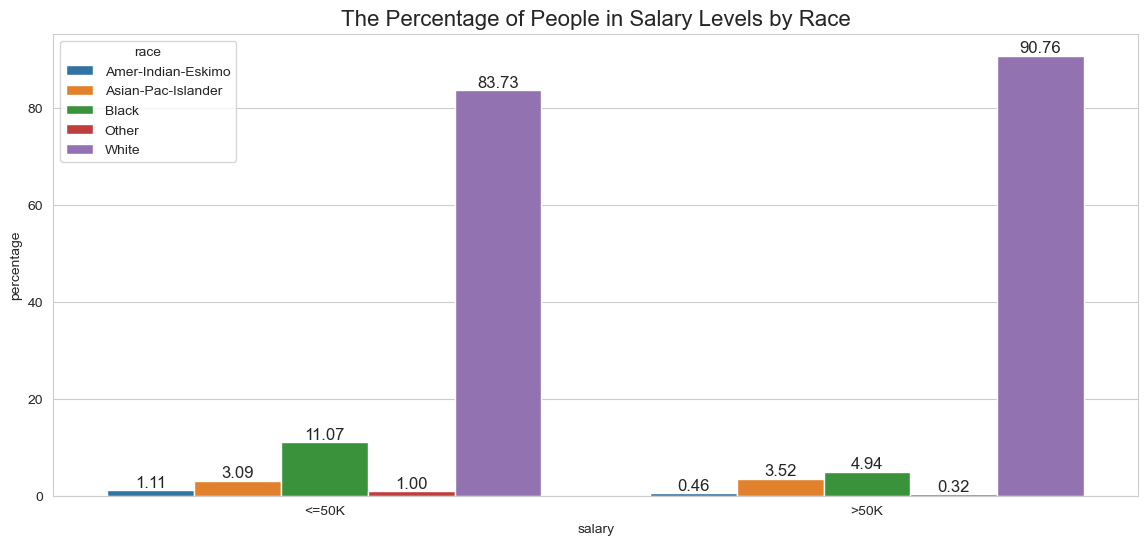

In [178]:
# Visualizing the percentage of persons at "race" by "salary" levels 

fig, ax = plt.subplots(figsize=(14, 6))

ax = sns.barplot(data=race_df, x="salary", y="percentage", hue="race")

plt.title("The Percentage of People in Salary Levels by Race", fontsize=16);

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", fontsize=12);

### Write down the conclusions you draw from your analysis

**Result :** "Asian-Pac-Islander" and "White" races has a high ratio in the self group about high-level income. "White" race has a high ratio in the high-income group about high-level income.

25.6% of whites and 26.6% of Asian-Pac-Islanders have income over 50K, compared to 12.4% of Blacks, 11.6% of Amer-Indian-Eskimo and 9.2% of Others. Race seems to be a factor in salary.

### <div class="alert alert-info"><font color=black>gender :</font></div>

### Check the count of person in each gender and visualize it with countplot

In [179]:
# Checking the counts of unique values in "gender" feature

df.gender.value_counts(dropna=False)

Male      21775
Female    10762
Name: gender, dtype: int64

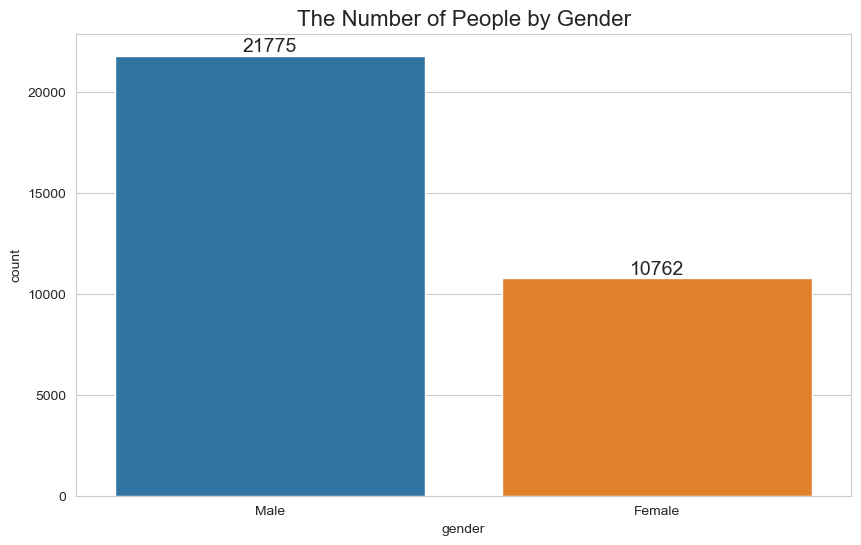

In [180]:
# Visualizing the number of people in each category of "gender"

ax = sns.countplot(data=df, x="gender")

plt.title("The Number of People by Gender", fontsize=16);

for container in ax.containers:
    ax.bar_label(container, fontsize=14);

### Check the count of person in each "salary" levels by gender and visualize it with countplot

In [181]:
# Checking the number of people in each sub-categories of "gender" by "salary" levels   

df.groupby("gender").salary.value_counts()

gender  salary
Female  <=50K      9583
        >50K       1179
Male    <=50K     15115
        >50K       6660
Name: salary, dtype: int64

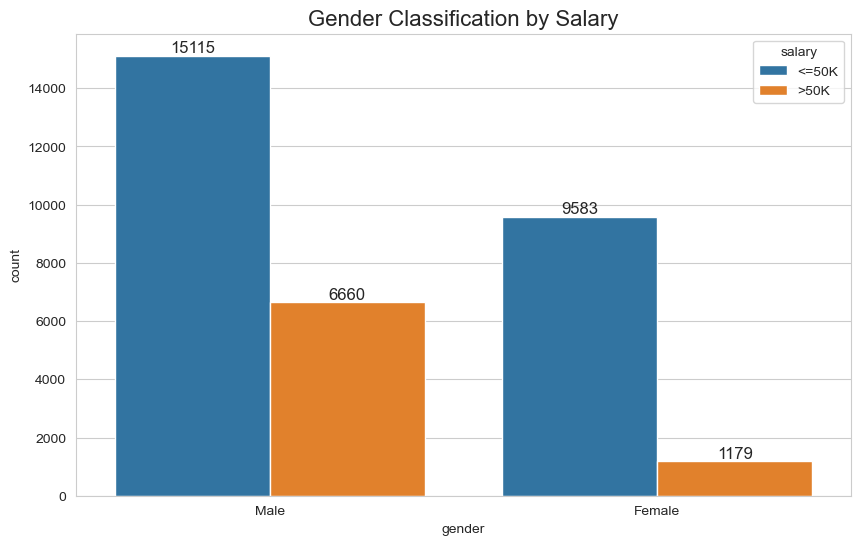

In [182]:
# Visualizing the number of people in each sub-categories of "gender" by "salary" levels  

ax = sns.countplot(data=df, x="gender", hue="salary")

plt.title("Gender Classification by Salary", fontsize=16);

for container in ax.containers:
    ax.bar_label(container, fontsize=12);

### Check the percentage distribution of person in each "salary" levels by each gender and visualize it with pie plot

In [183]:
# Checking the percentage of people in each "salary" level by "gender"  

gender = df.groupby("gender").salary.value_counts(normalize=True)*100
gender

gender  salary
Female  <=50K    89.045
        >50K     10.955
Male    <=50K    69.414
        >50K     30.586
Name: salary, dtype: float64

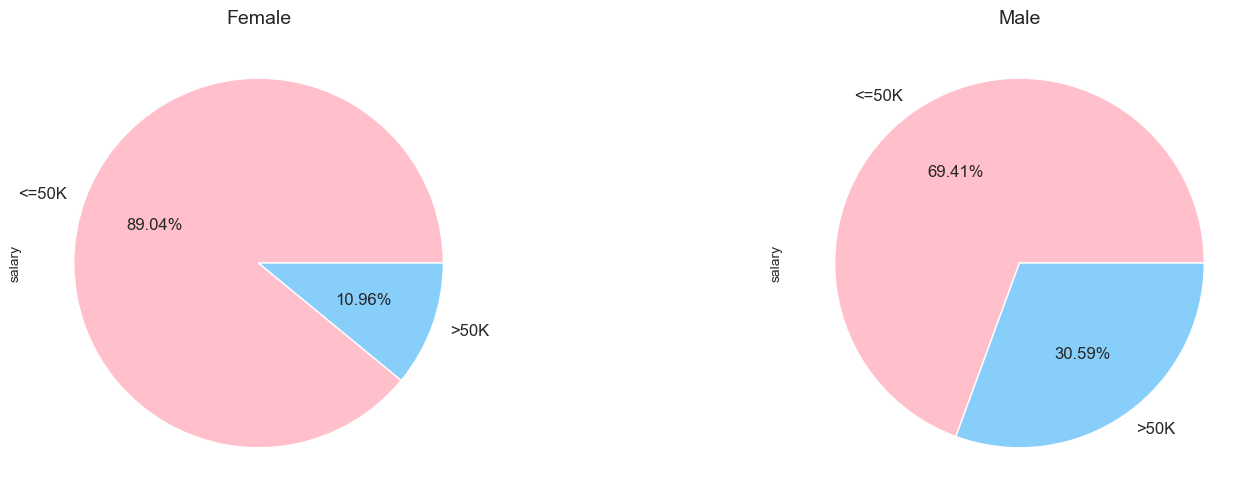

In [184]:
# Visualizing the percentage of people in each "salary" level by "gender"

plt.figure(figsize = (18, 6))
index = 1
for i in [0, 2]:
    plt.subplot(1, 2, index)
    gender[i:i+2].plot.pie(subplots=True,
                           labels=["<=50K", ">50K"],
                           autopct="%.2f%%",
                           textprops={'fontsize': 12},
                           colors=['pink', 'lightskyblue'],
                           )
    plt.title(gender.index[i][0], fontdict = {'fontsize': 14})
#    plt.legend()
    index += 1

**Some Remarks on "gender" Feature:** 11% of females earn above 50K compared to 30,6% of males, about 3 times lower ratio on females side.

### Check the count of person in each gender by "salary" levels and visualize it with countplot

In [185]:
# Checking the number of people in each sub-categories of "gender" by "salary" levels  

df.groupby("salary").gender.value_counts()

salary  gender
<=50K   Male      15115
        Female     9583
>50K    Male       6660
        Female     1179
Name: gender, dtype: int64

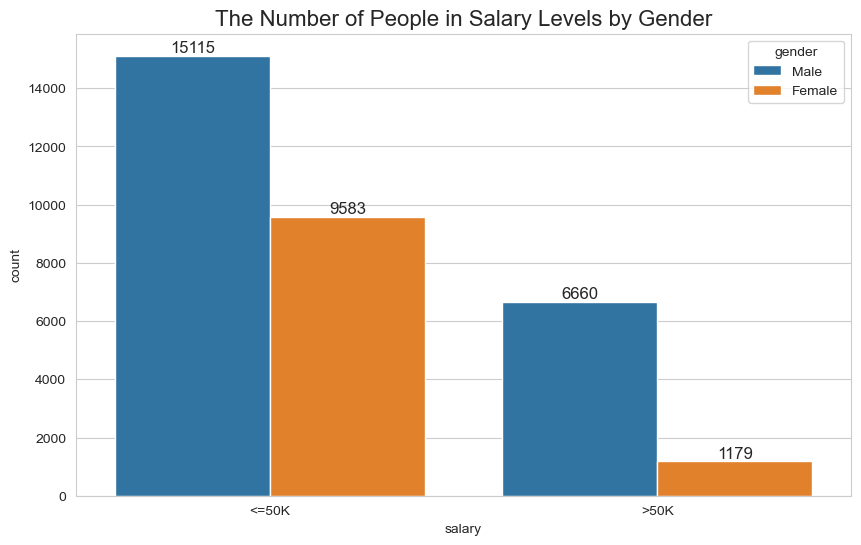

In [186]:
# Visualizing the number of persons in each sub-categories of "gender" by "salary" levels  

ax = sns.countplot(data=df, x="salary", hue="gender")

plt.title("The Number of People in Salary Levels by Gender", fontsize=16);

for container in ax.containers:
    ax.bar_label(container, fontsize=12);

### Check the the percentage distribution of person in each gender by "salary" levels and visualize it with pie plot

In [187]:
# Checking the percentage of persons at "gender" by "salary" levels 

gender = df.groupby("salary").gender.value_counts(normalize=True)*100
gender

salary  gender
<=50K   Male     61.199
        Female   38.801
>50K    Male     84.960
        Female   15.040
Name: gender, dtype: float64

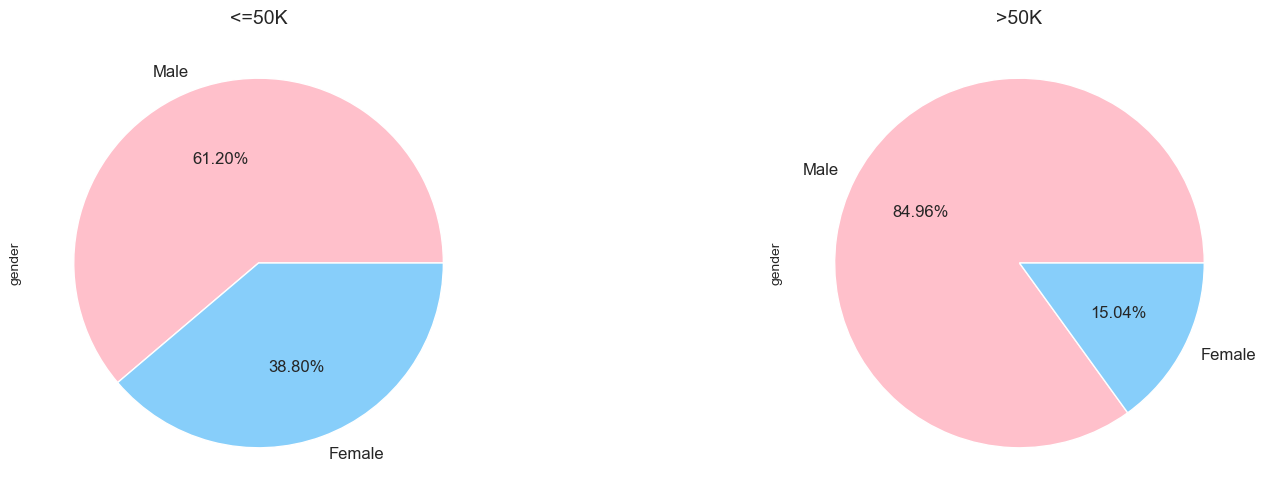

In [188]:
# Visualizing the percentage of persons at "gender" by "salary" levels 

plt.figure(figsize=(18, 6))
index = 1
for i in [0, 2]:
    plt.subplot(1, 2, index)
    gender[i:i+2].plot.pie(subplots=True,
                         labels=["Male", "Female"],
                         autopct="%.2f%%",
                         textprops={'fontsize': 12},
                         colors=['pink', 'lightskyblue'],
                         )
    plt.title(gender.index[i][0], fontdict = {'fontsize': 14})
#    plt.legend()
    index += 1

### Write down the conclusions you draw from your analysis

**Some Remarks on "gender" Feature :** It can easily be stated that males have been making more money than females have. From salary perspective, of those that get 50K or more, males dominate the category by 85% compared to only 15% females.

### <div class="alert alert-info"><font color=black>native_country :</font></div>

### Check the count of person in each categories and visualize it with countplot

In [189]:
# Checking the counts of unique values in "native_country" feature

df.native_country.value_counts(dropna=False)

United-States                 29153
Mexico                          639
?                               582
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Japan                            62
Guatemala                        62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

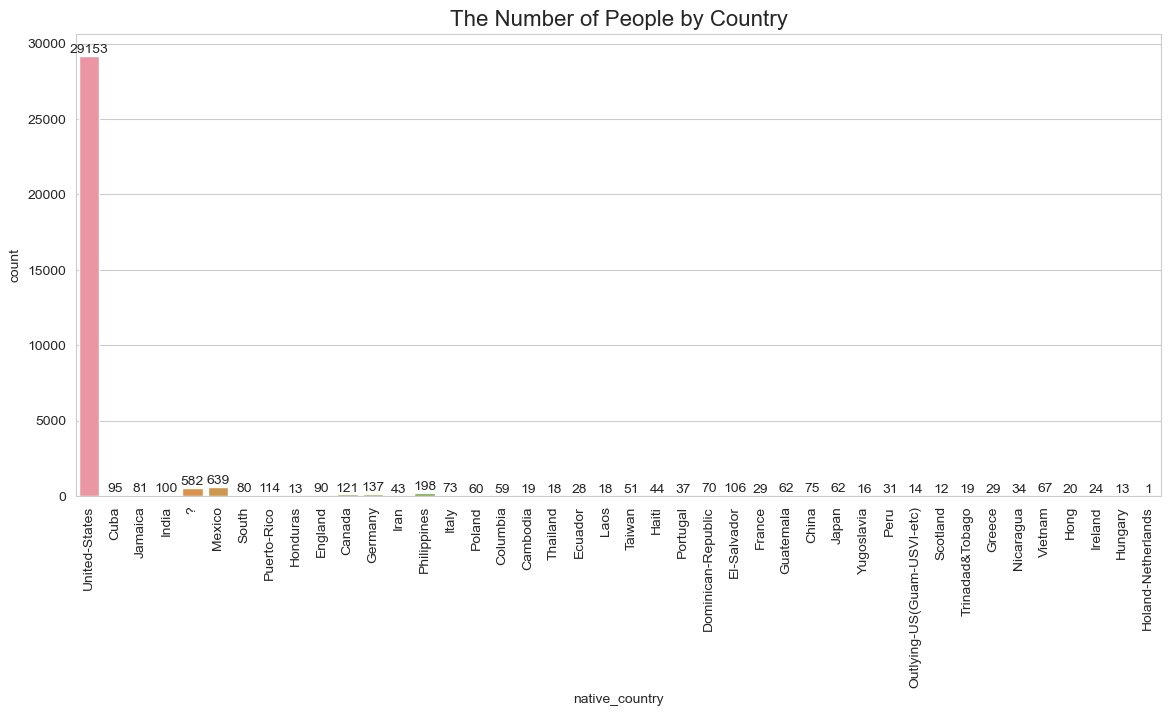

In [190]:
# Visualizing the number of people in each category of "native_country"

plt.figure(figsize=(14, 6))

ax = sns.countplot(data=df, x="native_country")

plt.title("The Number of People by Country", fontsize=16)
plt.xticks(rotation=90)

for container in ax.containers:
    ax.bar_label(container);

### Replace the value "?" to the value "Unknown" 

In [191]:
# Replacing "?" values with "Unknown"

df.native_country.replace("?", "Unknown", inplace = True)

In [192]:
df.native_country.value_counts(dropna=False)

United-States                 29153
Mexico                          639
Unknown                         582
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Japan                            62
Guatemala                        62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

### Decrease the number of categories in "native_country" feature as US, and Others and create a new feature with this new categorical data

In [193]:
def mapping_native_country(x):
    if x == "United-States":
        return "US"
    else:
        return "Others"

In [194]:
# Decreasing the number of categories in "native_country" feature as "US", and "Others"   

df.native_country.apply(mapping_native_country).value_counts(dropna=False)

US        29153
Others     3384
Name: native_country, dtype: int64

In [195]:
# Creating a new feature named "native_country_summary"

df["native_country_summary"] = df.native_country.apply(mapping_native_country)
df["native_country_summary"]

0            US
1            US
2            US
3            US
4        Others
          ...  
32556        US
32557        US
32558        US
32559        US
32560        US
Name: native_country_summary, Length: 32537, dtype: object

### Visualize the count of person in each new categories (US, Others)

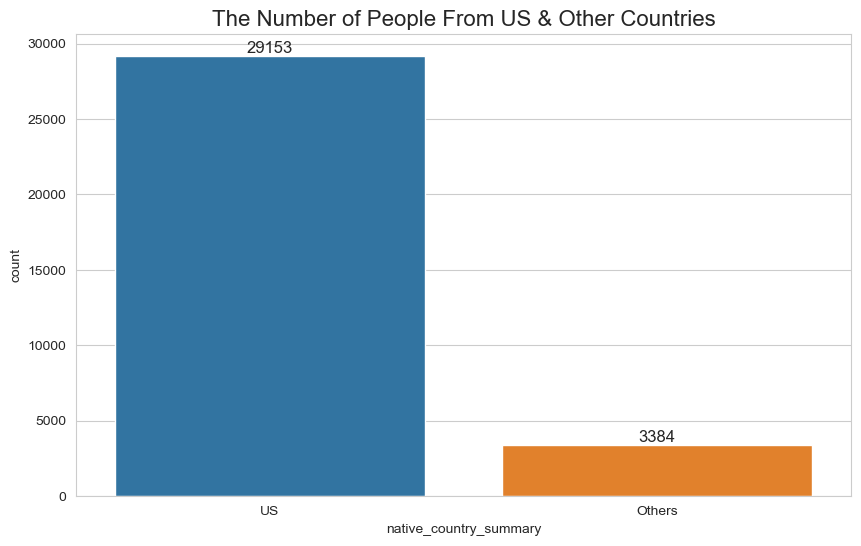

In [196]:
# Visualizing the number of people in each category of "native_country_summary"

ax = sns.countplot(data=df, x="native_country_summary")

plt.title("The Number of People From US & Other Countries", fontsize=16);

for container in ax.containers:
    ax.bar_label(container, fontsize=12);

### Check the count of person in each "salary" levels by these new native countries (US, Others) and visualize it with countplot

In [197]:
# Checking the number of persons in each sub-categories of "salary" by "native_country_summary"   

df.groupby("native_country_summary").salary.value_counts()

native_country_summary  salary
Others                  <=50K      2714
                        >50K        670
US                      <=50K     21984
                        >50K       7169
Name: salary, dtype: int64

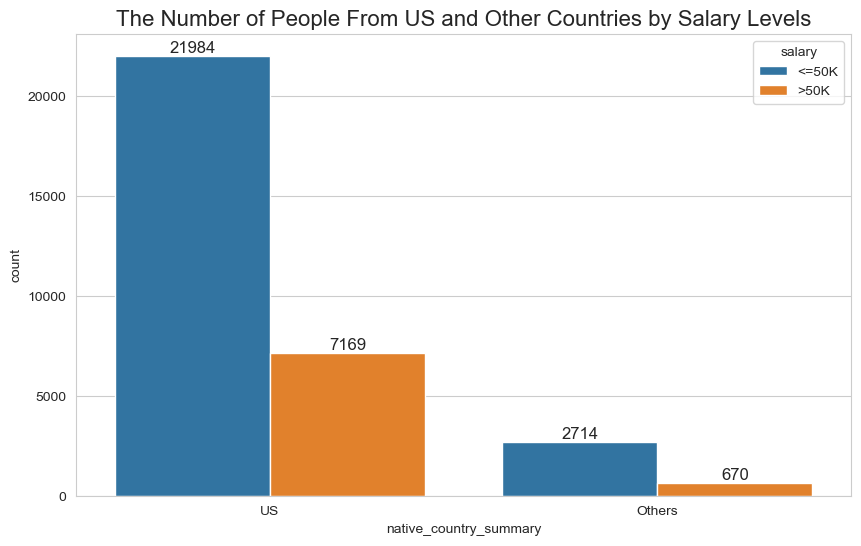

In [198]:
# Visualizing the number of persons in each sub-categories of "salary" by "native_country_summary"   

ax = sns.countplot(data=df, x="native_country_summary", hue="salary")

plt.title("The Number of People From US and Other Countries by Salary Levels", fontsize=16);

for container in ax.containers:
    ax.bar_label(container, fontsize=12);

### Check the percentage distribution of person in each "salary" levels by each new native countries (US, Others) and visualize it with pie plot separately

In [199]:
# Checking the percentage of persons in each "salary" levels by "native_country_summary" 

country = df.groupby(["native_country_summary"]).salary.value_counts(normalize=True)*100
country

native_country_summary  salary
Others                  <=50K    80.201
                        >50K     19.799
US                      <=50K    75.409
                        >50K     24.591
Name: salary, dtype: float64

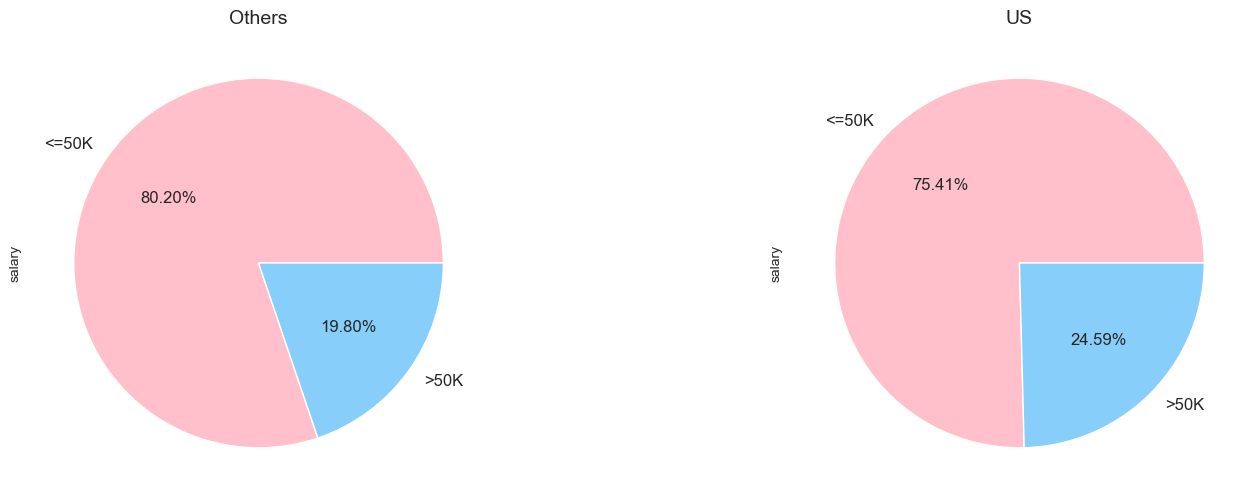

In [200]:
# Visualizing the percentage of persons in each "salary" levels by "native_country_summary" 

plt.figure(figsize = (18, 6))
index = 1
for i in [0, 2]:
    plt.subplot(1, 2, index)
    country[i:i+2].plot.pie(subplots=True,
                            labels=["<=50K", ">50K"],
                            autopct="%.2f%%",
                            textprops={'fontsize': 12},
                            colors=['pink', 'lightskyblue'],
                            )
    plt.title(country.index[i][0], fontdict = {'fontsize': 14})
#    plt.legend()
    index += 1

**Some Remarks on "Salary" and "Nationality" Features :** While 19.8% of foreign nationals are paid over 50K, this percentage is 24,6 for US nationals.

### Check the count of person in each these new native countries (US, Others) by "salary" levels and visualize it with countplot

In [201]:
# Checking the number of persons in each sub-categories of "native_country_summary" by "salary" levels  

df.groupby("salary").native_country_summary.value_counts()

salary  native_country_summary
<=50K   US                        21984
        Others                     2714
>50K    US                         7169
        Others                      670
Name: native_country_summary, dtype: int64

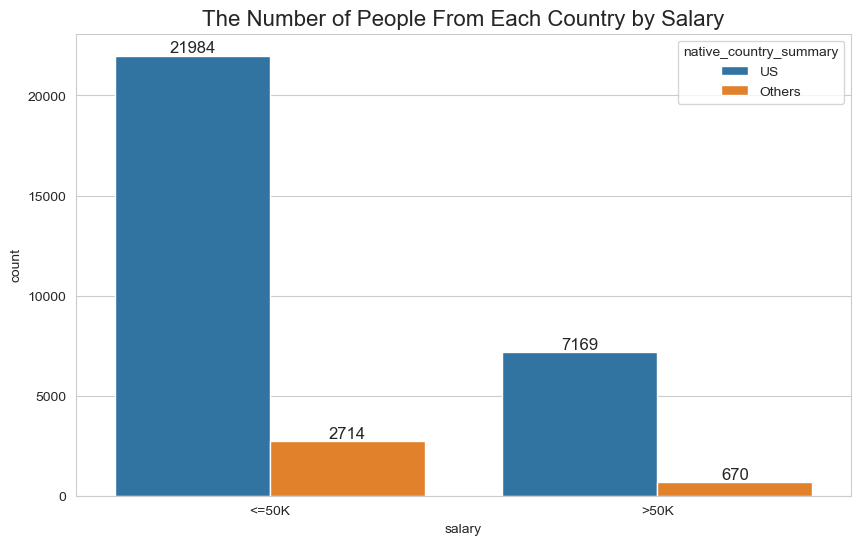

In [202]:
# Visualizing the number of persons in each sub-categories of "native_country_summary" by "salary" levels  

ax = sns.countplot(data=df, x="salary", hue="native_country_summary")

plt.title("The Number of People From Each Country by Salary", fontsize=16);

for container in ax.containers:
    ax.bar_label(container, fontsize=12);

### Check the the percentage distribution of person in each these new native countries (US, Others) by "salary" levels and visualize it with pie plot separately

In [203]:
# Checking the percentage of persons in each sub-categories of "native_country_summary" by "salary" levels  

country = df.groupby(["salary"]).native_country_summary.value_counts(normalize=True)*100
country

salary  native_country_summary
<=50K   US                       89.011
        Others                   10.989
>50K    US                       91.453
        Others                    8.547
Name: native_country_summary, dtype: float64

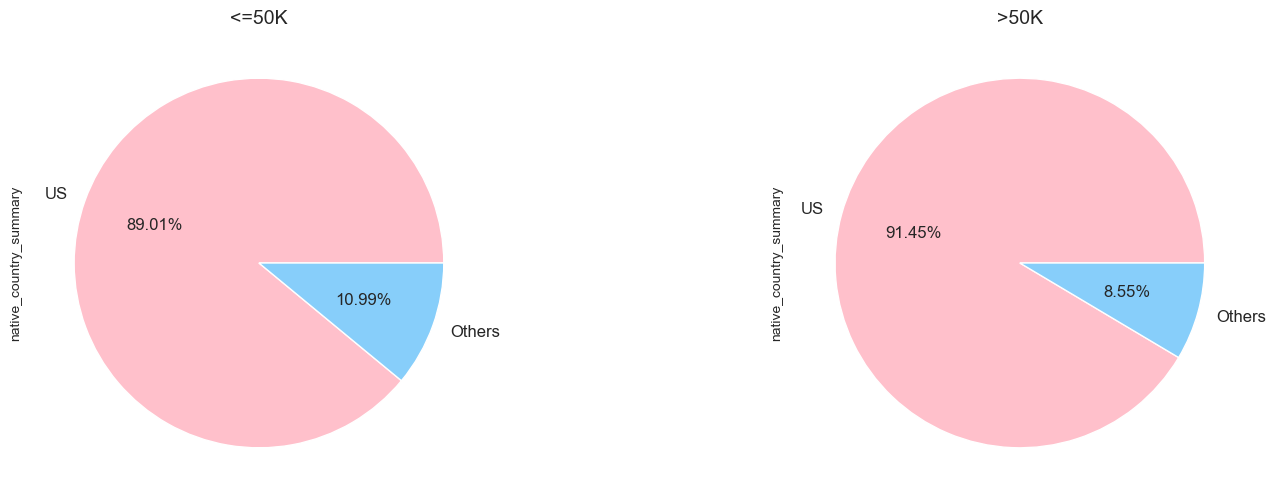

In [204]:
# Visualizing the percentage of persons in each sub-categories of "native_country_summary" by "salary" levels  

plt.figure(figsize = (18, 6))
index = 1
for i in [0, 2]:
    plt.subplot(1, 2, index)
    country[i:i+2].plot.pie(subplots=True,
                            labels=["US", "Others"],
                            autopct="%.2f%%",
                            textprops={'fontsize': 12},
                            colors=['pink', 'lightskyblue'],
                            )
    plt.title(country.index[i][0], fontdict = {'fontsize': 14})
#    plt.legend()
    index += 1

### Write down the conclusions you draw from your analysis

**Some Remarks on "native_country" Feature :** The individuals from the "United States" has a higher ratio of high-level income both in the self group and in the high-income group.

## <p style="background-color:#18ffff; font-family:newtimeroman; color:#black; font-size:175%; text-align:center; border-radius:10px 10px;">Other Specific Analysis Questions</p>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:110%; text-align:left;">1. What is the average age of males and females by income level?</p>

In [205]:
# Determining the average of people in each sub-categories of "gender" by "salary"  

df.groupby(["salary", "gender"]).age.mean()

salary  gender
<=50K   Female   36.217
        Male     37.149
>50K    Female   42.126
        Male     44.627
Name: age, dtype: float64

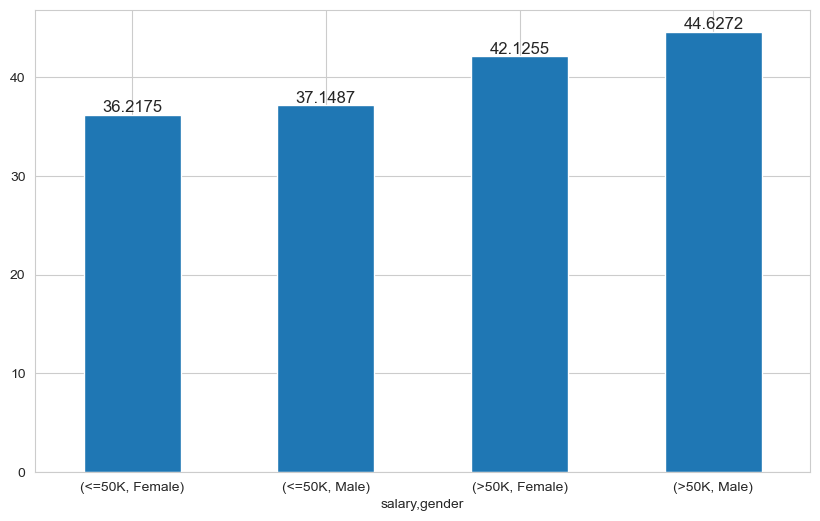

In [206]:
# Visualizing the average of people in each sub-categories of "gender" by "salary" with Pandas 

fig, ax = plt.subplots()

ax = df.groupby(["salary", "gender"]).age.mean().plot.bar()
plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container, fontsize=12);

In [207]:
age = df.groupby(["salary", "gender"])[["age"]].mean().reset_index()
age

salary  gender    age
0  <=50K  Female 36.217
1  <=50K    Male 37.149
2   >50K  Female 42.126
3   >50K    Male 44.627

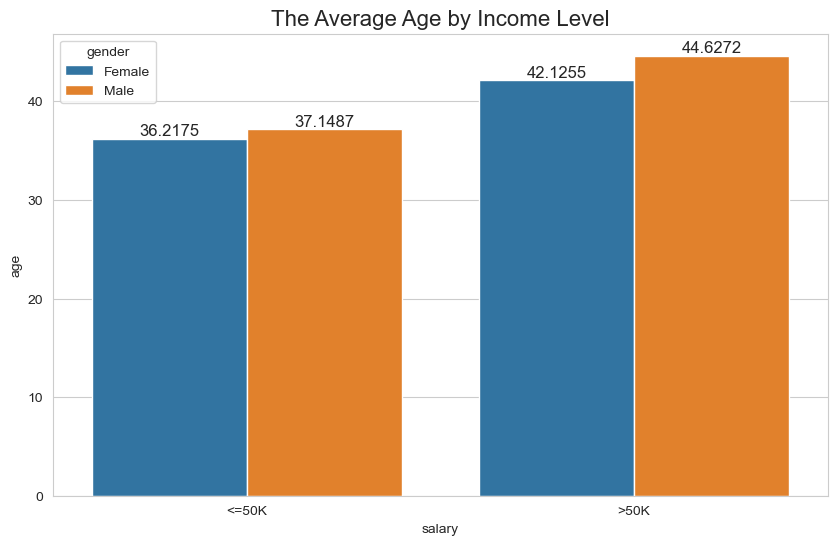

In [208]:
# Visualizing the average of people in each sub-categories of "gender" by "salary" with Seaborn 

fig, ax = plt.subplots()

ax = sns.barplot(data=age, x="salary", y="age", hue="gender")

plt.title("The Average Age by Income Level", fontsize=16)

for container in ax.containers:
    ax.bar_label(container, fontsize=12);

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:110%; text-align:left;">2. What is the workclass percentages of Americans in high-level income group?</p>

In [209]:
# Determining the percentage of US citizens in high-level income group 

workclass_US = df[(df.salary == ">50K") & (df.native_country_summary == "US")]\
                                                    .workclass.value_counts(dropna=False, normalize=True)*100
workclass_US

Private            63.314
Self-emp-not-inc    9.192
Local-gov           8.021
Self-emp-inc        7.784
Federal-gov         4.687
State-gov           4.547
Unknown             2.455
Name: workclass, dtype: float64

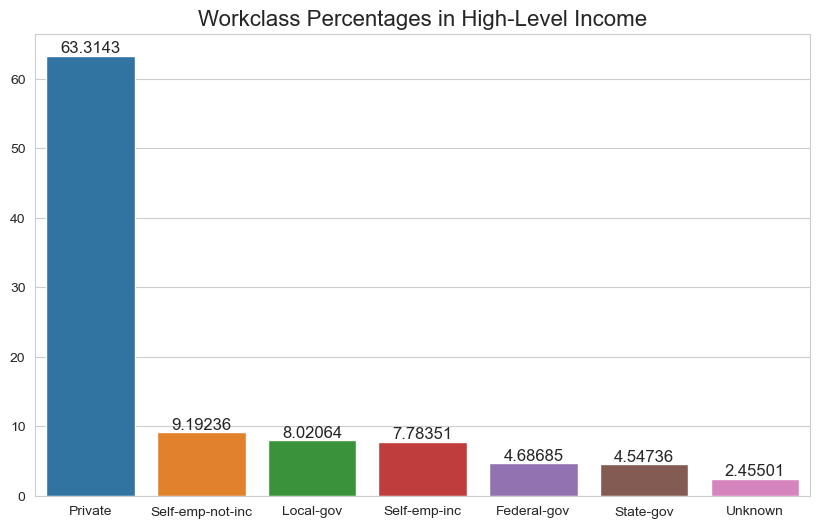

In [210]:
# Visualizing the percentage of US citizens in high-level income group 

fig, ax = plt.subplots()

ax = sns.barplot(x=workclass_US.index, y=workclass_US.values)

plt.title("Workclass Percentages in High-Level Income", fontsize=16)
plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container, fontsize=12);

**The majority of  US nationals( 63%) that make money more than 50K work in private sector.**

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:110%; text-align:left;">3. What is the occupational percentages of Americans who work as "Private" workclass in high-level income group?</p>

In [211]:
# Determining the percentage of US citizens who work as "Private" workclass in high-level income 

occupation_US = df[(df.salary == ">50K") & (df.native_country_summary == "US") & (df.workclass == "Private")]\
                  .occupation.value_counts(dropna=False, normalize=True)*100 
occupation_US

Exec-managerial     26.438
Prof-specialty      19.476
Craft-repair        14.695
Sales               14.475
Adm-clerical         6.389
Transport-moving     5.442
Tech-support         4.428
Machine-op-inspct    4.428
Other-service        1.674
Handlers-cleaners    1.344
Farming-fishing      0.595
Protective-serv      0.595
Priv-house-serv      0.022
Name: occupation, dtype: float64

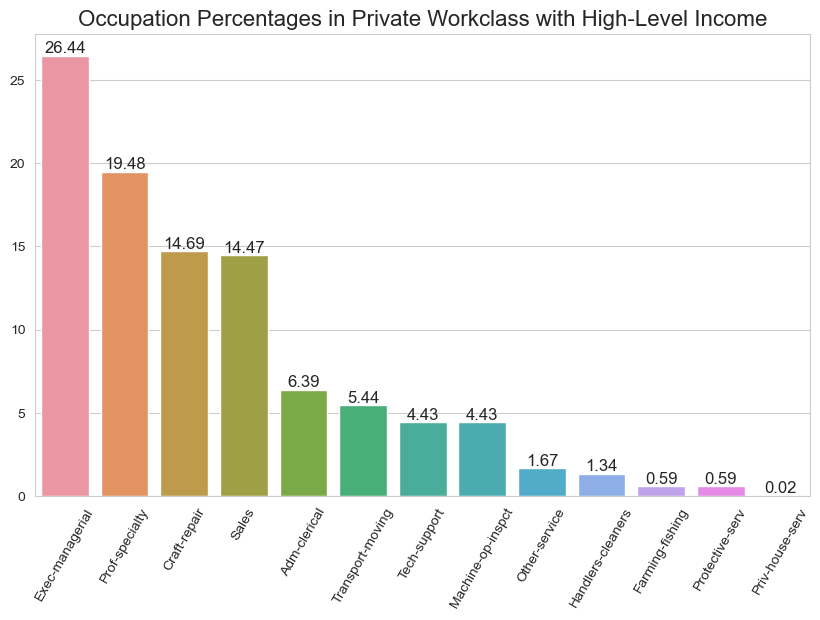

In [212]:
# Visualizng the percentage of US citizens who work as "Private" workclass in high-level income 

fig, ax = plt.subplots()

ax = sns.barplot(x=occupation_US.index, y=occupation_US.values)

plt.title("Occupation Percentages in Private Workclass with High-Level Income", fontsize=16)
plt.xticks(rotation=60)

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", fontsize=12);

**More than half of the US national (about 60%) working in private sector are clustered in three occupation groups: "Executive-managerial", "prof-specialty", "craft-repair". The last three are followed by "farming-fishing", "Protective-service", and "Priv-house-service", which may require relatively less education but more hours-per-week work.**

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:110%; text-align:left;">4. What is the percentage of educational level of Asian-Pac-Islander race group in high-level income group?</p>

In [213]:
# Determining the percentage of educational level of US citizens whose origin is Asian-Pac-Islander and income level is high 

Asian_Pac_Islander = df[(df.salary == ">50K") & (df.race == "Asian-Pac-Islander")]\
                     .education.value_counts(dropna=False, normalize=True)*100 
Asian_Pac_Islander

Bachelors      35.145
Masters        15.580
HS-grad        12.319
Some-college   11.957
Prof-school     9.783
Doctorate       6.522
Assoc-voc       3.261
Assoc-acdm      2.899
5th-6th         1.087
9th             0.362
11th            0.362
10th            0.362
12th            0.362
Name: education, dtype: float64

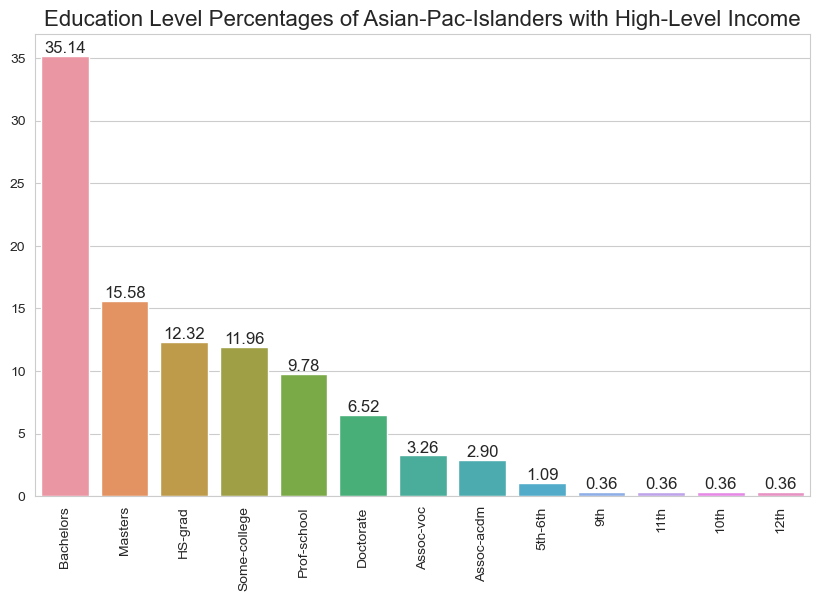

In [214]:
# Visualizing the percentage of educational level of US citizens whose origin is Asian-Pac-Islander and income level is high 

fig, ax = plt.subplots()

ax = sns.barplot(x = Asian_Pac_Islander.index, y = Asian_Pac_Islander.values)

plt.title("Education Level Percentages of Asian-Pac-Islanders with High-Level Income", fontsize=16)
plt.xticks(rotation=90)

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", fontsize=12);

**Over 56% of Asian-Pac-Islanders in high-level income group have Bachelors or higher degree.**

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:110%; text-align:left;">5. What is the occupation percentages of Asian-Pac-Islander race group who has a Bachelors degree in high-level income group?</p>

In [215]:
# Determining the percentage of occupation of US citizens 
# whose origin is Asian-Pac-Islander and has Bachelors degree in high-level income group 

Asian_Pac_Islander = df[(df.salary == ">50K") & (df.race == "Asian-Pac-Islander") & (df.education == "Bachelors")]\
                     .occupation.value_counts(dropna=False, normalize=True)*100 
Asian_Pac_Islander

Exec-managerial     27.835
Prof-specialty      25.773
Adm-clerical        12.371
Sales                9.278
Other-service        9.278
Craft-repair         7.216
Tech-support         3.093
Protective-serv      2.062
Transport-moving     1.031
Machine-op-inspct    1.031
Farming-fishing      1.031
Name: occupation, dtype: float64

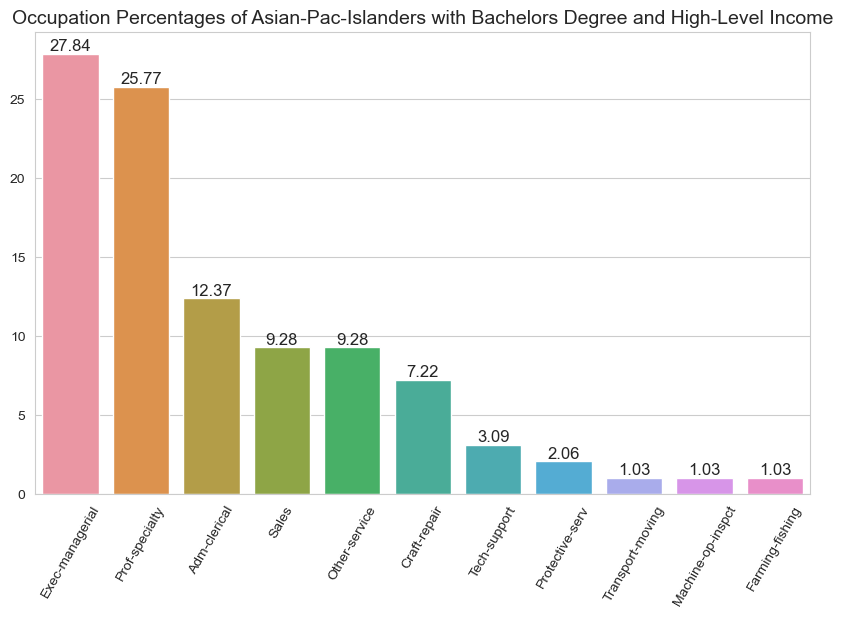

In [216]:
# Visualizing the percentage of occupation of US citizens 
# whose origin is Asian-Pac-Islander and has Bachelors degree in high-level income group 

fig, ax = plt.subplots()

ax = sns.barplot(x = Asian_Pac_Islander.index, y = Asian_Pac_Islander.values)

plt.title("Occupation Percentages of Asian-Pac-Islanders with Bachelors Degree and High-Level Income", fontsize=14)
plt.xticks(rotation=60)

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", fontsize=12);

**About 66 percent of Asian-Pac-Islanders who has a Bachelors degree in high-level income group work in three occupatinal groups: "Exec-managerial" with 27.84%, "Prof-specialty" with 25.77%, and "Adm-clerical" with 12.37%.**

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:110%; text-align:left;">6. What is the mean of working hours per week by gender for education level, workclass and marital status? Try to plot all required in one figure.</p>

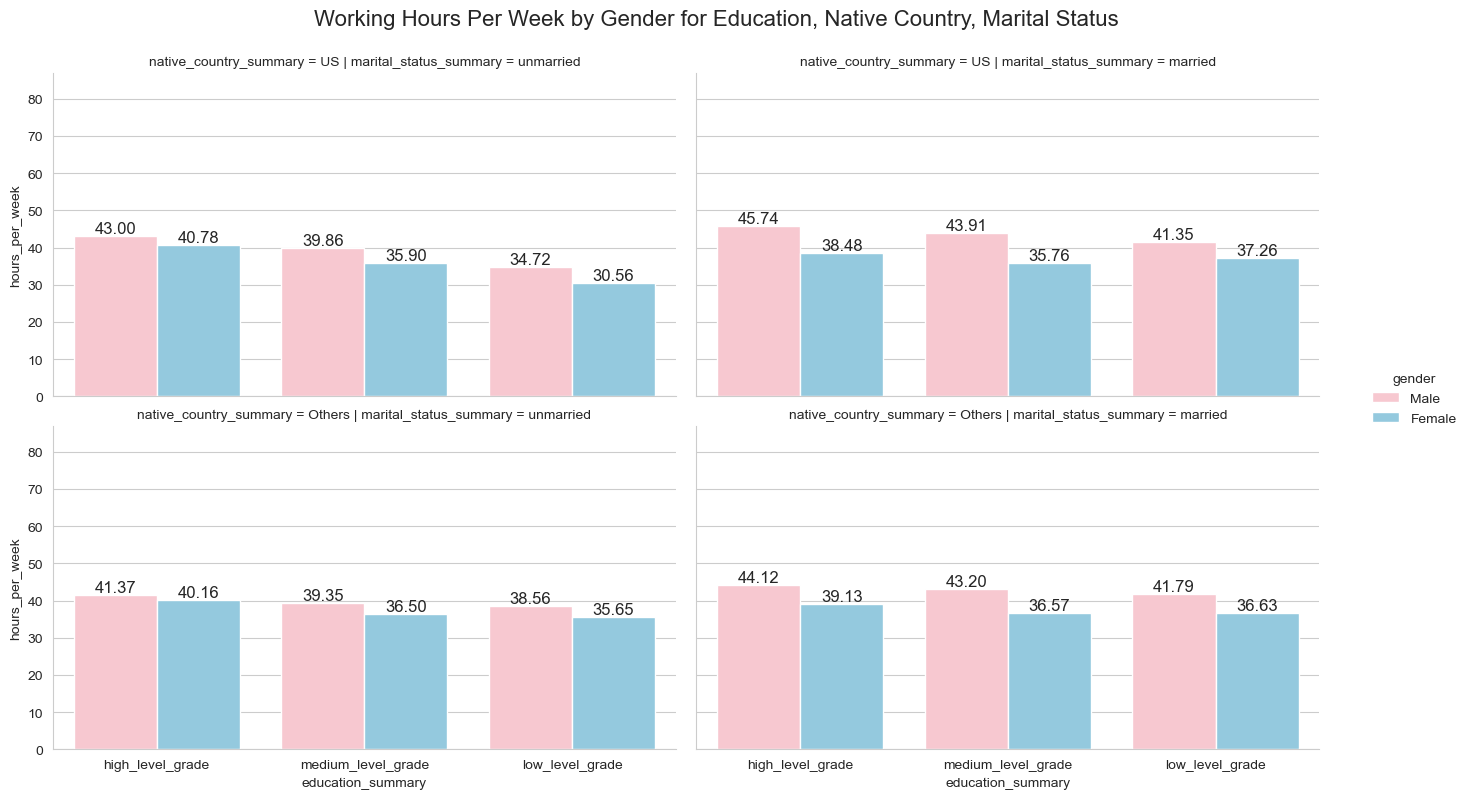

In [217]:
# Visualizing the average of working hours per week by gender for education level, native country and marital status 

g = sns.catplot(x="education_summary",
                y="hours_per_week",
                data=df,
                kind="bar",
                estimator= np.mean,
                hue="gender",
                col="marital_status_summary",
                row="native_country_summary",
                ci=None,
                palette=sns.color_palette(['pink', 'skyblue']));

g.fig.set_size_inches(15, 8)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Working Hours Per Week by Gender for Education, Native Country, Marital Status', fontsize=16)

# iterate through axes
for ax in g.axes.ravel():

    # add annotations
    for container in ax.containers:
        ax.bar_label(container, fmt="%.2f", fontsize=12);
    
    ax.margins(y=0.9)

plt.show()

## <p style="background-color:#18ffff; font-family:newtimeroman; color:#black; font-size:175%; text-align:center; border-radius:10px 10px;">Dropping Similar & Unneccessary Features</p>

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     32537 non-null  int64  
 1   workclass               32537 non-null  object 
 2   fnlwgt                  32537 non-null  int64  
 3   education               32537 non-null  object 
 4   education_num           31735 non-null  float64
 5   marital_status          32537 non-null  object 
 6   occupation              32537 non-null  object 
 7   relationship            32537 non-null  object 
 8   race                    32537 non-null  object 
 9   gender                  32537 non-null  object 
 10  capital_gain            32537 non-null  int64  
 11  capital_loss            32537 non-null  int64  
 12  hours_per_week          32537 non-null  int64  
 13  native_country          32537 non-null  object 
 14  salary                  32537 non-null

In [219]:
# We dropped "education", "education_num", "relationship", "marital_status" and "native_country" columns 
# because we created new features instead of these features like "education_summary", "marital_status_summary" 
# "native_country_summary"  

df.drop(columns = ["education", "education_num", "relationship", "marital_status", "native_country"], inplace=True)

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32537 non-null  int64 
 1   workclass               32537 non-null  object
 2   fnlwgt                  32537 non-null  int64 
 3   occupation              32537 non-null  object
 4   race                    32537 non-null  object
 5   gender                  32537 non-null  object
 6   capital_gain            32537 non-null  int64 
 7   capital_loss            32537 non-null  int64 
 8   hours_per_week          32537 non-null  int64 
 9   salary                  32537 non-null  object
 10  education_summary       32537 non-null  object
 11  marital_status_summary  32537 non-null  object
 12  native_country_summary  32537 non-null  object
dtypes: int64(5), object(8)
memory usage: 4.5+ MB


## <p style="background-color:#18ffff; font-family:newtimeroman; color:#black; font-size:175%; text-align:center; border-radius:10px 10px;">Handling with Missing Value</p>

### Check the missing values for all features basically

In [221]:
df.isnull().sum()

age                       0
workclass                 0
fnlwgt                    0
occupation                0
race                      0
gender                    0
capital_gain              0
capital_loss              0
hours_per_week            0
salary                    0
education_summary         0
marital_status_summary    0
native_country_summary    0
dtype: int64

### Besides, it's time to detect the duplicated values now, if there have been, drop them permanently

In [222]:
df.shape

(32537, 13)

In [223]:
df.duplicated().value_counts()  

False    32516
True        21
dtype: int64

In [224]:
df.drop_duplicates(keep='first', inplace=True)  

In [225]:
df.shape

(32516, 13)

In [226]:
def check_obj_columns(df):
    '''
    Returns nothing or column/s which has/have mixed object types.
    '''    
    
    tdf = df.select_dtypes(include=['object']).applymap(type)
    for col in tdf:
        if len(set(tdf[col].values)) > 1:
            print("Column {} has mixed object types.".format(col))

check_obj_columns(df)

**1. It seems that there is no missing values. But we know that "workclass", and "occupation" features have missing values named  "Unknown" as string values. Examine these features in more detail.**

**2. Decide if it's necessary to drop the "Unknown" string values or not**

In [227]:
df.workclass.value_counts()

Private             22653
Self-emp-not-inc     2540
Local-gov            2093
Unknown              1835
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [228]:
df.occupation.value_counts()

Prof-specialty       4136
Craft-repair         4089
Exec-managerial      4065
Adm-clerical         3762
Sales                3648
Other-service        3288
Machine-op-inspct    1997
Unknown              1842
Transport-moving     1597
Handlers-cleaners    1368
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

In [229]:
df[df.occupation == "Unknown"].workclass.value_counts()

Unknown         1835
Never-worked       7
Name: workclass, dtype: int64

In [230]:
df.replace("Unknown", np.nan, inplace=True)

In [231]:
df.isnull().sum()

age                          0
workclass                 1835
fnlwgt                       0
occupation                1842
race                         0
gender                       0
capital_gain                 0
capital_loss                 0
hours_per_week               0
salary                       0
education_summary            0
marital_status_summary       0
native_country_summary       0
dtype: int64

In [232]:
df.dropna(inplace=True)

In [233]:
df.isnull().sum()

age                       0
workclass                 0
fnlwgt                    0
occupation                0
race                      0
gender                    0
capital_gain              0
capital_loss              0
hours_per_week            0
salary                    0
education_summary         0
marital_status_summary    0
native_country_summary    0
dtype: int64

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30674 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     30674 non-null  int64 
 1   workclass               30674 non-null  object
 2   fnlwgt                  30674 non-null  int64 
 3   occupation              30674 non-null  object
 4   race                    30674 non-null  object
 5   gender                  30674 non-null  object
 6   capital_gain            30674 non-null  int64 
 7   capital_loss            30674 non-null  int64 
 8   hours_per_week          30674 non-null  int64 
 9   salary                  30674 non-null  object
 10  education_summary       30674 non-null  object
 11  marital_status_summary  30674 non-null  object
 12  native_country_summary  30674 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.3+ MB


## <p style="background-color:#18ffff; font-family:newtimeroman; color:#black; font-size:175%; text-align:center; border-radius:10px 10px;">Handling with Outliers</p>

### Plot boxplots for each numeric features at the same figure as subplots

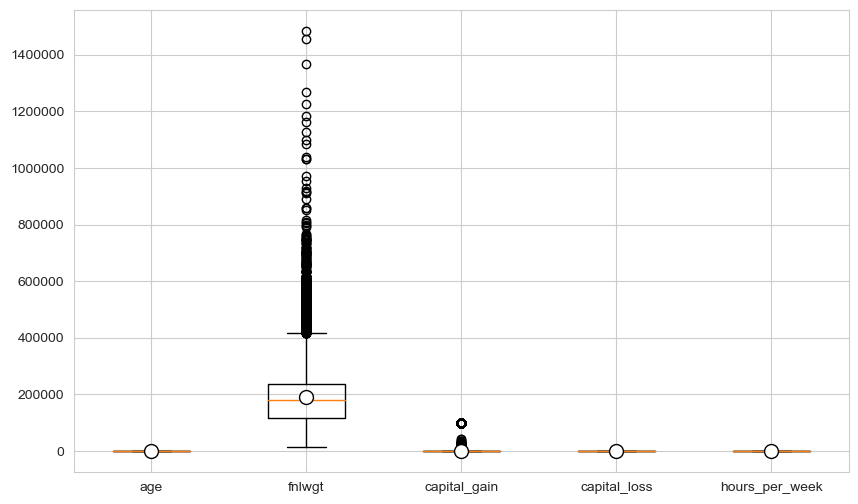

In [235]:
plt.boxplot((df[df.select_dtypes('number').columns]), 
            labels=df.select_dtypes('number').columns,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})
plt.ticklabel_format(style='plain', axis='y')
plt.show()

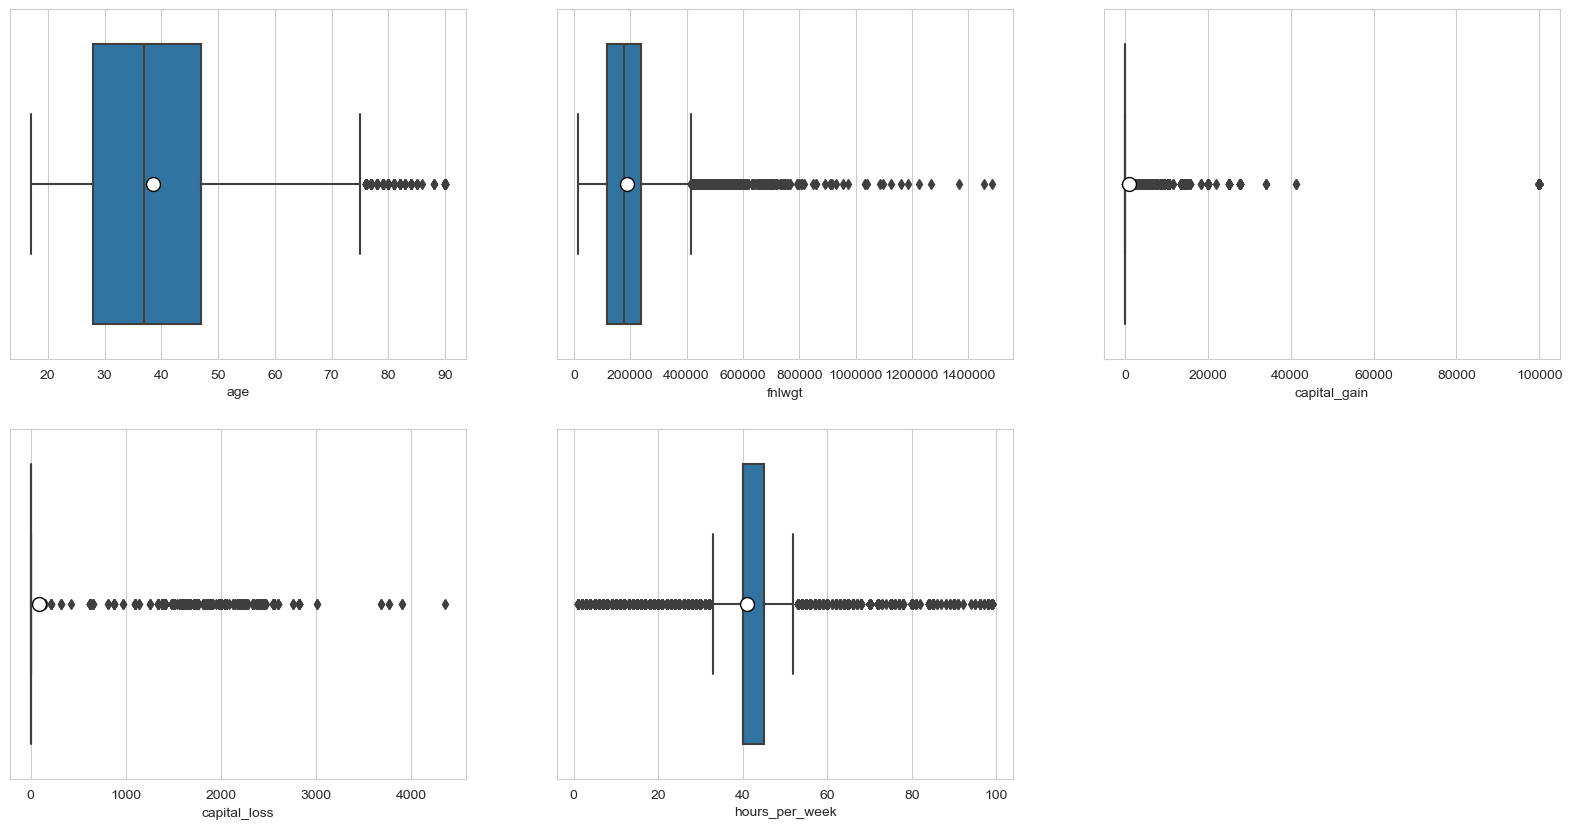

In [236]:
index = 0
plt.figure(figsize=(20, 10))

for feature in df.select_dtypes('number').columns:
    index += 1
    plt.subplot(2, 3, index)
    sns.boxplot(x=feature, 
                data=df, 
                whis=1.5,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
    plt.ticklabel_format(style='plain', axis='x')

### Plot both boxplots and histograms for each numeric features at the same figure as subplots

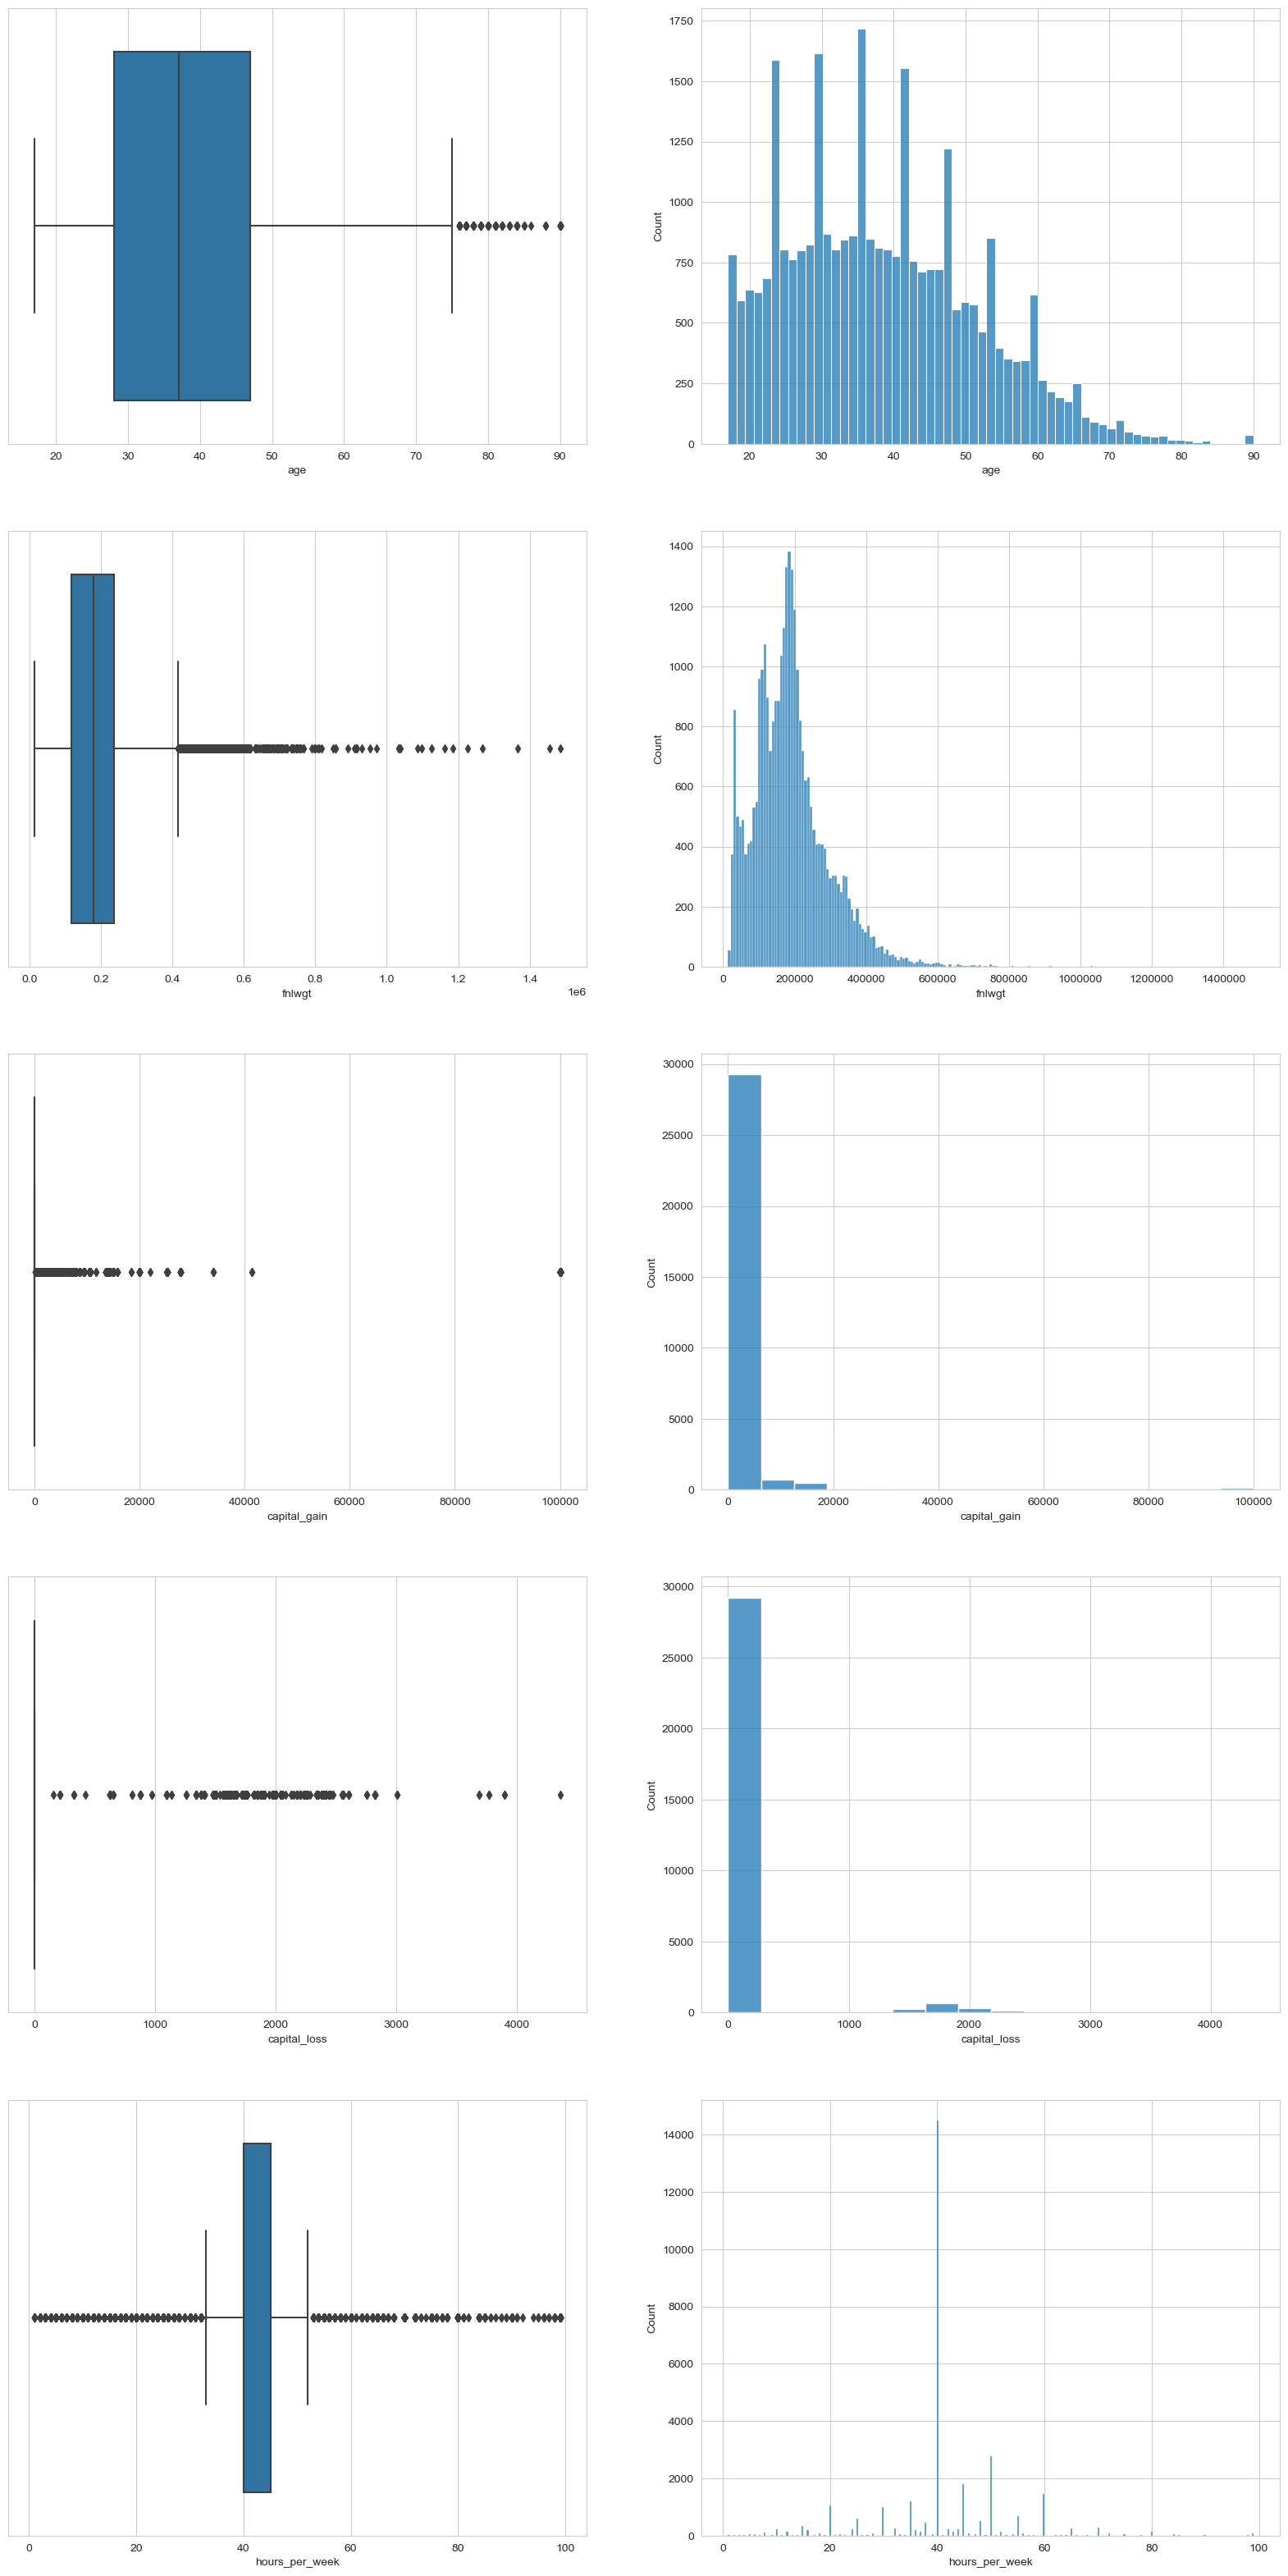

In [237]:
index = 0
plt.figure(figsize=(20, 40))

for feature in df.select_dtypes('number').columns:
    index += 1
    plt.subplot(5, 2, index)
    sns.boxplot(x=feature, data=df, whis=1.5)
    index += 1
    plt.subplot(5,2,index)
    sns.histplot(x=feature, data=df)
    plt.ticklabel_format(style='plain', axis='x')

### Check the statistical values for all numeric features

In [238]:
df.describe().T

count       mean        std       min        25%  \
age            30674.000     38.455     13.115    17.000     28.000   
fnlwgt         30674.000 189857.631 105476.148 13769.000 117818.750   
capital_gain   30674.000   1107.624   7503.122     0.000      0.000   
capital_loss   30674.000     89.038    405.934     0.000      0.000   
hours_per_week 30674.000     40.956     11.986     1.000     40.000   

                      50%        75%         max  
age                37.000     47.000      90.000  
fnlwgt         178533.500 237317.000 1484705.000  
capital_gain        0.000      0.000   99999.000  
capital_loss        0.000      0.000    4356.000  
hours_per_week     40.000     45.000      99.000

In [239]:
df[df["hours_per_week"] > 70]

age         workclass  fnlwgt       occupation                race  \
10      37           Private  280464  Exec-managerial               Black   
28      39           Private  367260  Exec-managerial               White   
265     37      Self-emp-inc  257295  Exec-managerial  Asian-Pac-Islander   
272     50  Self-emp-not-inc   30653  Farming-fishing               White   
299     38           Private  169469            Sales               White   
...    ...               ...     ...              ...                 ...   
32391   55           Private  199763  Protective-serv               White   
32402   42           Private  288154     Craft-repair               White   
32432   36           Private  208068    Other-service               Other   
32469   58      Self-emp-inc  181974   Prof-specialty               White   
32476   35           Private   30673     Craft-repair               White   

       gender  capital_gain  capital_loss  hours_per_week salary  \
10       Male             0             0              80   >50K   
28       Male             0             0              80  <=50K   
265      Male             0             0              75   >50K   
272      Male          2407             0              98  <=50K   
299      Male             0             0              80  <=50K   
...       ...           ...           ...             ...    ...   
32391    Male             0             0              81  <=50K   
32402    Male             0             0              89   >50K   
32432    Male             0             0              72  <=50K   
32469  Female             0             0              99  <=50K   
32476    Male             0             0              84  <=50K   

        education_summary marital_status_summary native_country_summary  
10     medium_level_grade                married                     US  
28     medium_level_grade              unmarried                     US  
265    medium_level_grade                married                 Others  
272      high_level_grade                married                     US  
299    medium_level_grade              unmarried                     US  
...                   ...                    ...                    ...  
32391  medium_level_grade              unmarried                     US  
32402  medium_level_grade                married                     US  
32432     low_level_grade              unmarried                 Others  
32469    high_level_grade              unmarried                 Others  
32476     low_level_grade                married                     US  

[473 rows x 13 columns]

**1. After analyzing all numerical features, we have decided that we can't evaluate extreme values in "fnlwgt, capital_gain, capital_loss" features in the scope of outliers.**

**2. So let's examine "age and hours_per_week" features and detect extreme values which could be outliers by using IQR Rule.**

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:110%; text-align:left;">age :</p>

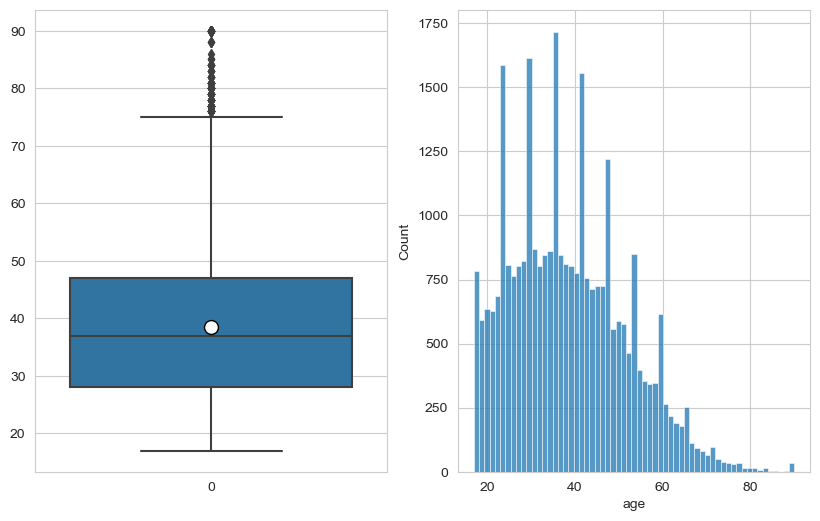

In [240]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df.age,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

plt.subplot(1, 2, 2)
sns.histplot(data=df.age);

In [241]:
low = df.age.quantile(0.25)
high = df.age.quantile(0.75)
IQR = high - low
low, high, IQR

(28.0, 47.0, 19.0)

In [242]:
lower_lim = low - (1.5 * IQR)
upper_lim = high + (1.5 * IQR)
lower_lim, upper_lim

(-0.5, 75.5)

In [243]:
df[df.age > upper_lim].age.value_counts()

90    35
76    30
77    20
80    16
79    15
81    14
78    14
84     8
82     7
83     5
88     3
85     3
86     1
Name: age, dtype: int64

In [244]:
df[df.age > upper_lim].sort_values(by="age", ascending=False)

age         workclass  fnlwgt       occupation                race  \
8806    90           Private   87372   Prof-specialty               White   
14159   90         Local-gov  187749     Adm-clerical  Asian-Pac-Islander   
28463   90       Federal-gov  195433     Craft-repair               White   
12975   90           Private  250832  Exec-managerial               White   
11996   90           Private   40388  Exec-managerial               White   
...    ...               ...     ...              ...                 ...   
15102   76         Local-gov  169133     Adm-clerical               White   
19085   76           Private  125784  Exec-managerial               White   
23515   76           Private  142535     Adm-clerical               White   
8240    76  Self-emp-not-inc  225964            Sales               White   
23354   76           Private  199949     Adm-clerical               White   

       gender  capital_gain  capital_loss  hours_per_week salary  \
8806     Male         20051             0              72   >50K   
14159    Male             0             0              20  <=50K   
28463    Male             0             0              30  <=50K   
12975    Male             0             0              40  <=50K   
11996    Male             0             0              55  <=50K   
...       ...           ...           ...             ...    ...   
15102  Female             0             0              30  <=50K   
19085    Male             0             0              40  <=50K   
23515    Male             0             0               6  <=50K   
8240     Male             0             0               8  <=50K   
23354    Male         20051             0              50   >50K   

        education_summary marital_status_summary native_country_summary  
8806     high_level_grade                married                     US  
14159  medium_level_grade                married                 Others  
28463  medium_level_grade                married                     US  
12975     low_level_grade                married                     US  
11996    high_level_grade              unmarried                     US  
...                   ...                    ...                    ...  
15102  medium_level_grade              unmarried                     US  
19085    high_level_grade                married                     US  
23515  medium_level_grade              unmarried                     US  
8240   medium_level_grade              unmarried                     US  
23354    high_level_grade                married                     US  

[171 rows x 13 columns]

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:110%; text-align:left;">hours_per_week :</p>

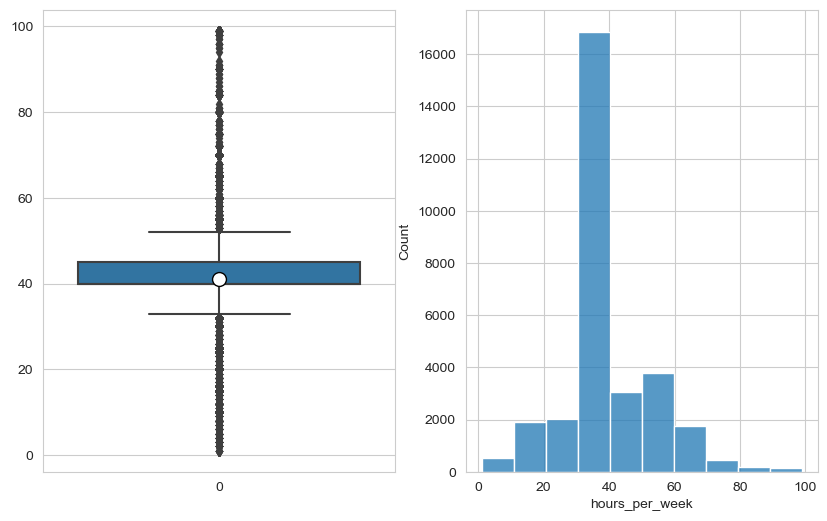

In [245]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df.hours_per_week,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

plt.subplot(1, 2, 2)
sns.histplot(data=df.hours_per_week, bins=10);

In [246]:
low = df.hours_per_week.quantile(0.25)
high = df.hours_per_week.quantile(0.75)
IQR = high - low
low, high, IQR

(40.0, 45.0, 5.0)

In [247]:
lower_lim = low - (1.5 * IQR)
upper_lim = high + (1.5 * IQR)
lower_lim, upper_lim

(32.5, 52.5)

In [248]:
df[df.hours_per_week > upper_lim].hours_per_week.value_counts().sort_index(ascending=False)

99      80
98      11
97       2
96       5
95       2
94       1
92       1
91       3
90      28
89       2
88       2
87       1
86       2
85      13
84      41
82       1
81       3
80     124
78       8
77       6
76       3
75      63
74       1
73       2
72      68
70     284
68      12
67       4
66      17
65     242
64      14
63      10
62      18
61       2
60    1441
59       5
58      27
57      17
56      91
55     683
54      39
53      23
Name: hours_per_week, dtype: int64

In [249]:
df[df.hours_per_week > upper_lim].sort_values(by="hours_per_week", ascending=False)

age         workclass  fnlwgt        occupation   race  gender  \
25986   44         Local-gov  212665   Protective-serv  Black    Male   
19529   38           Private   66326  Transport-moving  White    Male   
8796    39           Private   70995  Transport-moving  White    Male   
15534   29           Private  167716     Other-service  White  Female   
22313   26  Self-emp-not-inc  258306   Farming-fishing  White    Male   
...    ...               ...     ...               ...    ...     ...   
1138    27           Private  138705      Craft-repair  White    Male   
23244   58           Private  248739   Farming-fishing  White    Male   
28858   62           Private  123411  Transport-moving  White    Male   
18417   24           Private  117167     Other-service  White  Female   
31622   61  Self-emp-not-inc  268831             Sales  White    Male   

       capital_gain  capital_loss  hours_per_week salary   education_summary  \
25986             0             0              99  <=50K  medium_level_grade   
19529             0             0              99  <=50K  medium_level_grade   
8796          15024             0              99   >50K    high_level_grade   
15534             0             0              99  <=50K  medium_level_grade   
22313             0             0              99  <=50K     low_level_grade   
...             ...           ...             ...    ...                 ...   
1138              0             0              53  <=50K  medium_level_grade   
23244             0             0              53   >50K  medium_level_grade   
28858             0             0              53  <=50K     low_level_grade   
18417             0             0              53  <=50K  medium_level_grade   
31622             0             0              53  <=50K  medium_level_grade   

      marital_status_summary native_country_summary  
25986                married                     US  
19529                married                     US  
8796                 married                     US  
15534              unmarried                     US  
22313                married                     US  
...                      ...                    ...  
1138                 married                     US  
23244                married                     US  
28858                married                     US  
18417              unmarried                     US  
31622                married                     US  

[3402 rows x 13 columns]

In [250]:
df[df.hours_per_week < lower_lim].hours_per_week.value_counts().sort_index()

1        8
2       15
3       24
4       28
5       39
6       40
7       20
8      103
9       17
10     223
11       9
12     143
13      19
14      28
15     350
16     182
17      27
18      64
19      14
20    1063
21      23
22      39
23      20
24     220
25     582
26      30
27      28
28      74
29       6
30    1008
31       5
32     239
Name: hours_per_week, dtype: int64

In [251]:
df[df.hours_per_week < lower_lim].groupby("salary").hours_per_week.describe()

count   mean   std   min    25%    50%    75%    max
salary                                                        
<=50K  4368.000 21.548 7.345 1.000 16.000 20.000 30.000 32.000
>50K    322.000 22.028 7.813 1.000 18.000 24.000 30.000 32.000

In [252]:
df[df.hours_per_week < lower_lim].groupby("salary").age.describe()

count   mean    std    min    25%    50%    75%    max
salary                                                          
<=50K  4368.000 34.059 17.735 17.000 20.000 26.000 45.000 90.000
>50K    322.000 49.484 13.894 22.000 39.000 48.000 60.000 90.000

**Result :** As seen above, there are some number of extreme values in both "age and hours_per_week" features. But how can we know if these extreme values are outliers or not? At this point, **domain knowledge** comes to the fore.

**Domain Knowledge for this dataset:**
1. In this dataset, all values are created according to the statements of individuals. So there can be some "data entry errors".
2. In addition, we have aimed to create an ML model with some restrictions as getting better performance from the ML model.
3. In this respect, our sample space ranges for some features are as follows.
    - age : 17 to 80
    - hours_per_week : 7 to 70
    - if somebody's age is more than 60, he/she can't work more than 60 hours in a week

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:110%; text-align:left;">Dropping rows according to the domain knowledge :</p>

In [253]:
df[(df.age < 17) | (df.age > 80)].sort_values(by="age", ascending=False)

age     workclass  fnlwgt       occupation   race  gender  \
222     90       Private   51744    Other-service  Black    Male   
18832   90       Private  115306  Exec-managerial  White  Female   
10545   90       Private  175491     Craft-repair  White    Male   
11512   90       Private   87285    Other-service  White  Female   
11996   90       Private   40388  Exec-managerial  White    Male   
...    ...           ...     ...              ...    ...     ...   
19045   81     State-gov  132204    Other-service  White  Female   
6748    81       Private  122651            Sales  White    Male   
2906    81       Private  114670  Priv-house-serv  Black  Female   
21501   81       Private  177408  Exec-managerial  White    Male   
19495   81  Self-emp-inc  247232  Exec-managerial  White  Female   

       capital_gain  capital_loss  hours_per_week salary   education_summary  \
222               0          2206              40  <=50K  medium_level_grade   
18832             0             0              40  <=50K    high_level_grade   
10545          9386             0              50   >50K  medium_level_grade   
11512             0             0              24  <=50K  medium_level_grade   
11996             0             0              55  <=50K    high_level_grade   
...             ...           ...             ...    ...                 ...   
19045             0             0              20  <=50K     low_level_grade   
6748              0             0              15  <=50K  medium_level_grade   
2906           2062             0               5  <=50K     low_level_grade   
21501             0          2377              26   >50K  medium_level_grade   
19495          2936             0              28  <=50K     low_level_grade   

      marital_status_summary native_country_summary  
222                unmarried                     US  
18832              unmarried                     US  
10545                married                 Others  
11512              unmarried                     US  
11996              unmarried                     US  
...                      ...                    ...  
19045              unmarried                     US  
6748                 married                     US  
2906               unmarried                     US  
21501                married                     US  
19495                married                     US  

[76 rows x 13 columns]

In [254]:
df[(df.age < 17) | (df.age > 80)].shape

(76, 13)

In [255]:
drop_index = df[(df.age < 17) | (df.age > 80)].sort_values(by="age", ascending=False).index
drop_index

Int64Index([  222, 18832, 10545, 11512, 11996, 12975, 14159, 15892, 18277,
            18413, 18725, 19212,  8973, 19489, 19747, 20610, 22220, 24043,
            28463, 31030, 32277, 32367, 10210, 15356,  5370,  4070,  1040,
             6232,  1935,  2303,  5272,  6624,  2891,  5406,  8806,  1168,
            22895, 21835, 24027, 20463,  8381, 32459, 26731, 27795,  9471,
             6214, 14711, 11238,  7720, 15662,  7481, 24395, 23459, 19172,
            16302, 14756,  8431, 20421, 22481, 31855, 13696, 24280,  4834,
            29594, 28948, 12830,   918, 13295, 24560,  3537, 13928, 19045,
             6748,  2906, 21501, 19495],
           dtype='int64')

In [256]:
df.drop(drop_index, inplace=True)

In [257]:
df[(df.age < 17) | (df.age > 80)].shape[0]

0

In [258]:
df[(df.hours_per_week < 7) | (df.hours_per_week > 70)].sort_values(by="hours_per_week", ascending=False)

age         workclass  fnlwgt        occupation                race  \
22216   45           Private   54260      Craft-repair               White   
5432    44           Private   83508    Prof-specialty               White   
19053   27           Private   40295  Transport-moving               White   
19141   59           Private  106748     Other-service               White   
19399   39      Self-emp-inc  163057      Craft-repair               White   
...    ...               ...     ...               ...                 ...   
20909   77  Self-emp-not-inc   71676      Adm-clerical               White   
25078   74           Private  260669     Other-service               White   
19750   23           Private   72887      Craft-repair  Asian-Pac-Islander   
189     58         State-gov  109567    Prof-specialty               White   
24284   57  Self-emp-not-inc   56480   Exec-managerial               White   

       gender  capital_gain  capital_loss  hours_per_week salary  \
22216    Male             0             0              99  <=50K   
5432   Female          2354             0              99  <=50K   
19053    Male             0             0              99  <=50K   
19141  Female             0             0              99  <=50K   
19399    Male             0             0              99  <=50K   
...       ...           ...           ...             ...    ...   
20909  Female             0          1944               1  <=50K   
25078  Female             0             0               1  <=50K   
19750    Male             0             0               1  <=50K   
189      Male             0             0               1   >50K   
24284    Male             0             0               1  <=50K   

        education_summary marital_status_summary native_country_summary  
22216  medium_level_grade              unmarried                     US  
5432     high_level_grade              unmarried                     US  
19053  medium_level_grade              unmarried                     US  
19141     low_level_grade                married                     US  
19399  medium_level_grade              unmarried                     US  
...                   ...                    ...                    ...  
20909  medium_level_grade              unmarried                     US  
25078     low_level_grade              unmarried                     US  
19750  medium_level_grade              unmarried                 Others  
189      high_level_grade                married                     US  
24284  medium_level_grade                married                     US  

[621 rows x 13 columns]

In [259]:
df[(df.hours_per_week < 7) | (df.hours_per_week > 70)].shape

(621, 13)

In [260]:
drop_index = df[(df.hours_per_week < 7) | (df.hours_per_week > 70)].sort_values(by="hours_per_week", ascending=False).index
drop_index

Int64Index([22216,  5432, 19053, 19141, 19399, 19529, 19731, 19997, 20036,
            21056,
            ...
             6180, 29867,  1036, 11451, 22960, 20909, 25078, 19750,   189,
            24284],
           dtype='int64', length=621)

In [261]:
df.drop(drop_index, inplace=True)

In [262]:
df[(df.hours_per_week < 7) | (df.hours_per_week > 70)].shape[0]

0

In [263]:
df[(df.age > 60) & (df.hours_per_week > 60)]

age         workclass  fnlwgt        occupation                race  \
1541    62           Private  162245    Prof-specialty               White   
2154    75           Private  101887   Priv-house-serv               White   
2184    63      Self-emp-inc   54052             Sales               White   
2665    70           Private   94692             Sales               White   
3101    65      Self-emp-inc   81413   Farming-fishing               White   
5417    67           Private  197816             Sales               White   
6826    68           Private  284763  Transport-moving               White   
8066    61  Self-emp-not-inc  133969             Sales  Asian-Pac-Islander   
9646    62  Self-emp-not-inc   26911     Other-service               White   
12624   63      Self-emp-inc  110890    Prof-specialty               White   
16634   62  Self-emp-not-inc  115176   Farming-fishing               White   
18367   70  Self-emp-not-inc  139889   Farming-fishing               White   
19584   64  Self-emp-not-inc  192695   Farming-fishing               White   
20125   62           Private  252668    Prof-specialty               White   
23399   63  Self-emp-not-inc   28612             Sales               White   
23585   64           Private  212838             Sales               White   
24903   61           Private  191417   Exec-managerial               Black   
25910   66      Self-emp-inc  179951   Exec-managerial               White   
26625   67  Self-emp-not-inc  152102   Farming-fishing               White   
27721   61         Local-gov   28375    Prof-specialty               White   
28294   65      Self-emp-inc  210381   Exec-managerial               White   
31342   62  Self-emp-not-inc  173631   Exec-managerial               White   
32192   64         State-gov  104361      Adm-clerical               White   

       gender  capital_gain  capital_loss  hours_per_week salary  \
1541     Male             0          1628              70  <=50K   
2154   Female             0             0              70  <=50K   
2184     Male             0             0              68   >50K   
2665     Male             0             0              70   >50K   
3101     Male             0          2352              65  <=50K   
5417     Male             0          1844              70  <=50K   
6826     Male             0             0              70  <=50K   
8066     Male             0             0              63  <=50K   
9646   Female             0             0              66  <=50K   
12624    Male             0             0              70   >50K   
16634    Male             0             0              65  <=50K   
18367    Male          2653             0              70  <=50K   
19584    Male             0             0              70  <=50K   
20125    Male             0             0              70  <=50K   
23399    Male             0             0              70  <=50K   
23585    Male             0             0              65   >50K   
24903    Male             0             0              65  <=50K   
25910    Male             0             0              70  <=50K   
26625    Male             0             0              65  <=50K   
27721  Female             0             0              70  <=50K   
28294    Male         99999             0              65   >50K   
31342    Male             0             0              70  <=50K   
32192  Female             0             0              65  <=50K   

        education_summary marital_status_summary native_country_summary  
1541     high_level_grade                married                     US  
2154      low_level_grade              unmarried                     US  
2184     high_level_grade                married                     US  
2665     high_level_grade                married                     US  
3101   medium_level_grade                married                     US  
5417   medium_level_grade                married         

In [264]:
df[(df.age > 60) & (df.hours_per_week > 60)].shape

(23, 13)

In [265]:
drop_index = df[(df.age > 60) & (df.hours_per_week > 60)].index
drop_index

Int64Index([ 1541,  2154,  2184,  2665,  3101,  5417,  6826,  8066,  9646,
            12624, 16634, 18367, 19584, 20125, 23399, 23585, 24903, 25910,
            26625, 27721, 28294, 31342, 32192],
           dtype='int64')

In [266]:
df.drop(drop_index, inplace=True)

In [267]:
df.shape

(29954, 13)

In [268]:
df.reset_index(drop=True, inplace=True)
df.head()

age         workclass  fnlwgt         occupation   race  gender  \
0   39         State-gov   77516       Adm-clerical  White    Male   
1   50  Self-emp-not-inc   83311    Exec-managerial  White    Male   
2   38           Private  215646  Handlers-cleaners  White    Male   
3   53           Private  234721  Handlers-cleaners  Black    Male   
4   28           Private  338409     Prof-specialty  Black  Female   

   capital_gain  capital_loss  hours_per_week salary   education_summary  \
0          2174             0              40  <=50K    high_level_grade   
1             0             0              13  <=50K    high_level_grade   
2             0             0              40  <=50K  medium_level_grade   
3             0             0              40  <=50K     low_level_grade   
4             0             0              40  <=50K    high_level_grade   

  marital_status_summary native_country_summary  
0              unmarried                     US  
1                married                     US  
2              unmarried                     US  
3                married                     US  
4                married                 Others

## <p style="background-color:#18ffff; font-family:newtimeroman; color:#black; font-size:175%; text-align:center; border-radius:10px 10px;">Final Step to Make the Dataset Ready for ML Models</p>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:110%; text-align:left;">1. Convert all features to numeric</p>

### Convert target feature (salary) to numeric (0 and 1) by using map function

In [269]:
df["salary"] = df.salary.map({"<=50K": 0, ">50K": 1})
df["salary"]

0        0
1        0
2        0
3        0
4        0
        ..
29949    0
29950    1
29951    0
29952    0
29953    1
Name: salary, Length: 29954, dtype: int64

In [270]:
df.salary.value_counts(dropna=False)

0    22505
1     7449
Name: salary, dtype: int64

### Convert all features to numeric by using get_dummies function

In [271]:
df_dummy = pd.get_dummies(df, drop_first=True)
df_dummy

age  fnlwgt  capital_gain  capital_loss  hours_per_week  salary  \
0       39   77516          2174             0              40       0   
1       50   83311             0             0              13       0   
2       38  215646             0             0              40       0   
3       53  234721             0             0              40       0   
4       28  338409             0             0              40       0   
...    ...     ...           ...           ...             ...     ...   
29949   27  257302             0             0              38       0   
29950   40  154374             0             0              40       1   
29951   58  151910             0             0              40       0   
29952   22  201490             0             0              20       0   
29953   52  287927         15024             0              40       1   

       workclass_Local-gov  workclass_Private  workclass_Self-emp-inc  \
0                        0                  0                       0   
1                        0                  0                       0   
2                        0                  1                       0   
3                        0                  1                       0   
4                        0                  1                       0   
...                    ...                ...                     ...   
29949                    0                  1                       0   
29950                    0                  1                       0   
29951                    0                  1                       0   
29952                    0                  1                       0   
29953                    0                  0                       1   

       workclass_Self-emp-not-inc  workclass_State-gov  workclass_Without-pay  \
0                               0                    1                      0   
1                               1                    0                      0   
2                               0                    0                      0   
3                               0                    0                      0   
4                               0                    0                      0   
...                           ...                  ...                    ...   
29949                           0                    0                      0   
29950                           0                    0                      0   
29951                           0                    0                      0   
29952                           0                    0                      0   
29953                           0                    0                      0   

       occupation_Armed-Forces  occupation_Craft-repair  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   
...                        ...                      ...   
29949                        0                        0   
29950                        0                        0   
29951                        0                        0   
29952                        0                        0   
29953                        0                        0   

       occupation_Exec-managerial  occupation_Farming-fishing  \
0                               0                           0   
1                               1                           0   
2                               0                           0   
3                               0                           0   
4                               0                           0   
...                           ...                         ...   
29949                           0                           0   
29950                           0      

In [272]:
df.shape

(29954, 13)

In [273]:
df_dummy.shape

(29954, 34)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:110%; text-align:left;">2. Take a look at correlation between features by utilizing power of visualizing</p>

In [274]:
# function for set text color of correlation values in Dataframes

def color_correlation(val):
    """
    Takes a scalar and returns a string with the css property in a variety of color scales 
    for different correlations.
    """
   
    if val >= 0.6 and val < 0.99999 or val <= -0.6 and val > -0.99999:
        color = 'red'
    elif val < 0.6 and val >= 0.3 or val > -0.6 and val <= -0.3:
        color = 'blue'
    elif val < 0.3 and val > -0.3:
        color = 'pink'        
    elif val == 1:
        color = 'cyan'    
    else:
        color = 'black'
    return 'color: %s' % color
        
df_dummy.corr().style.applymap(color_correlation).set_precision(2)

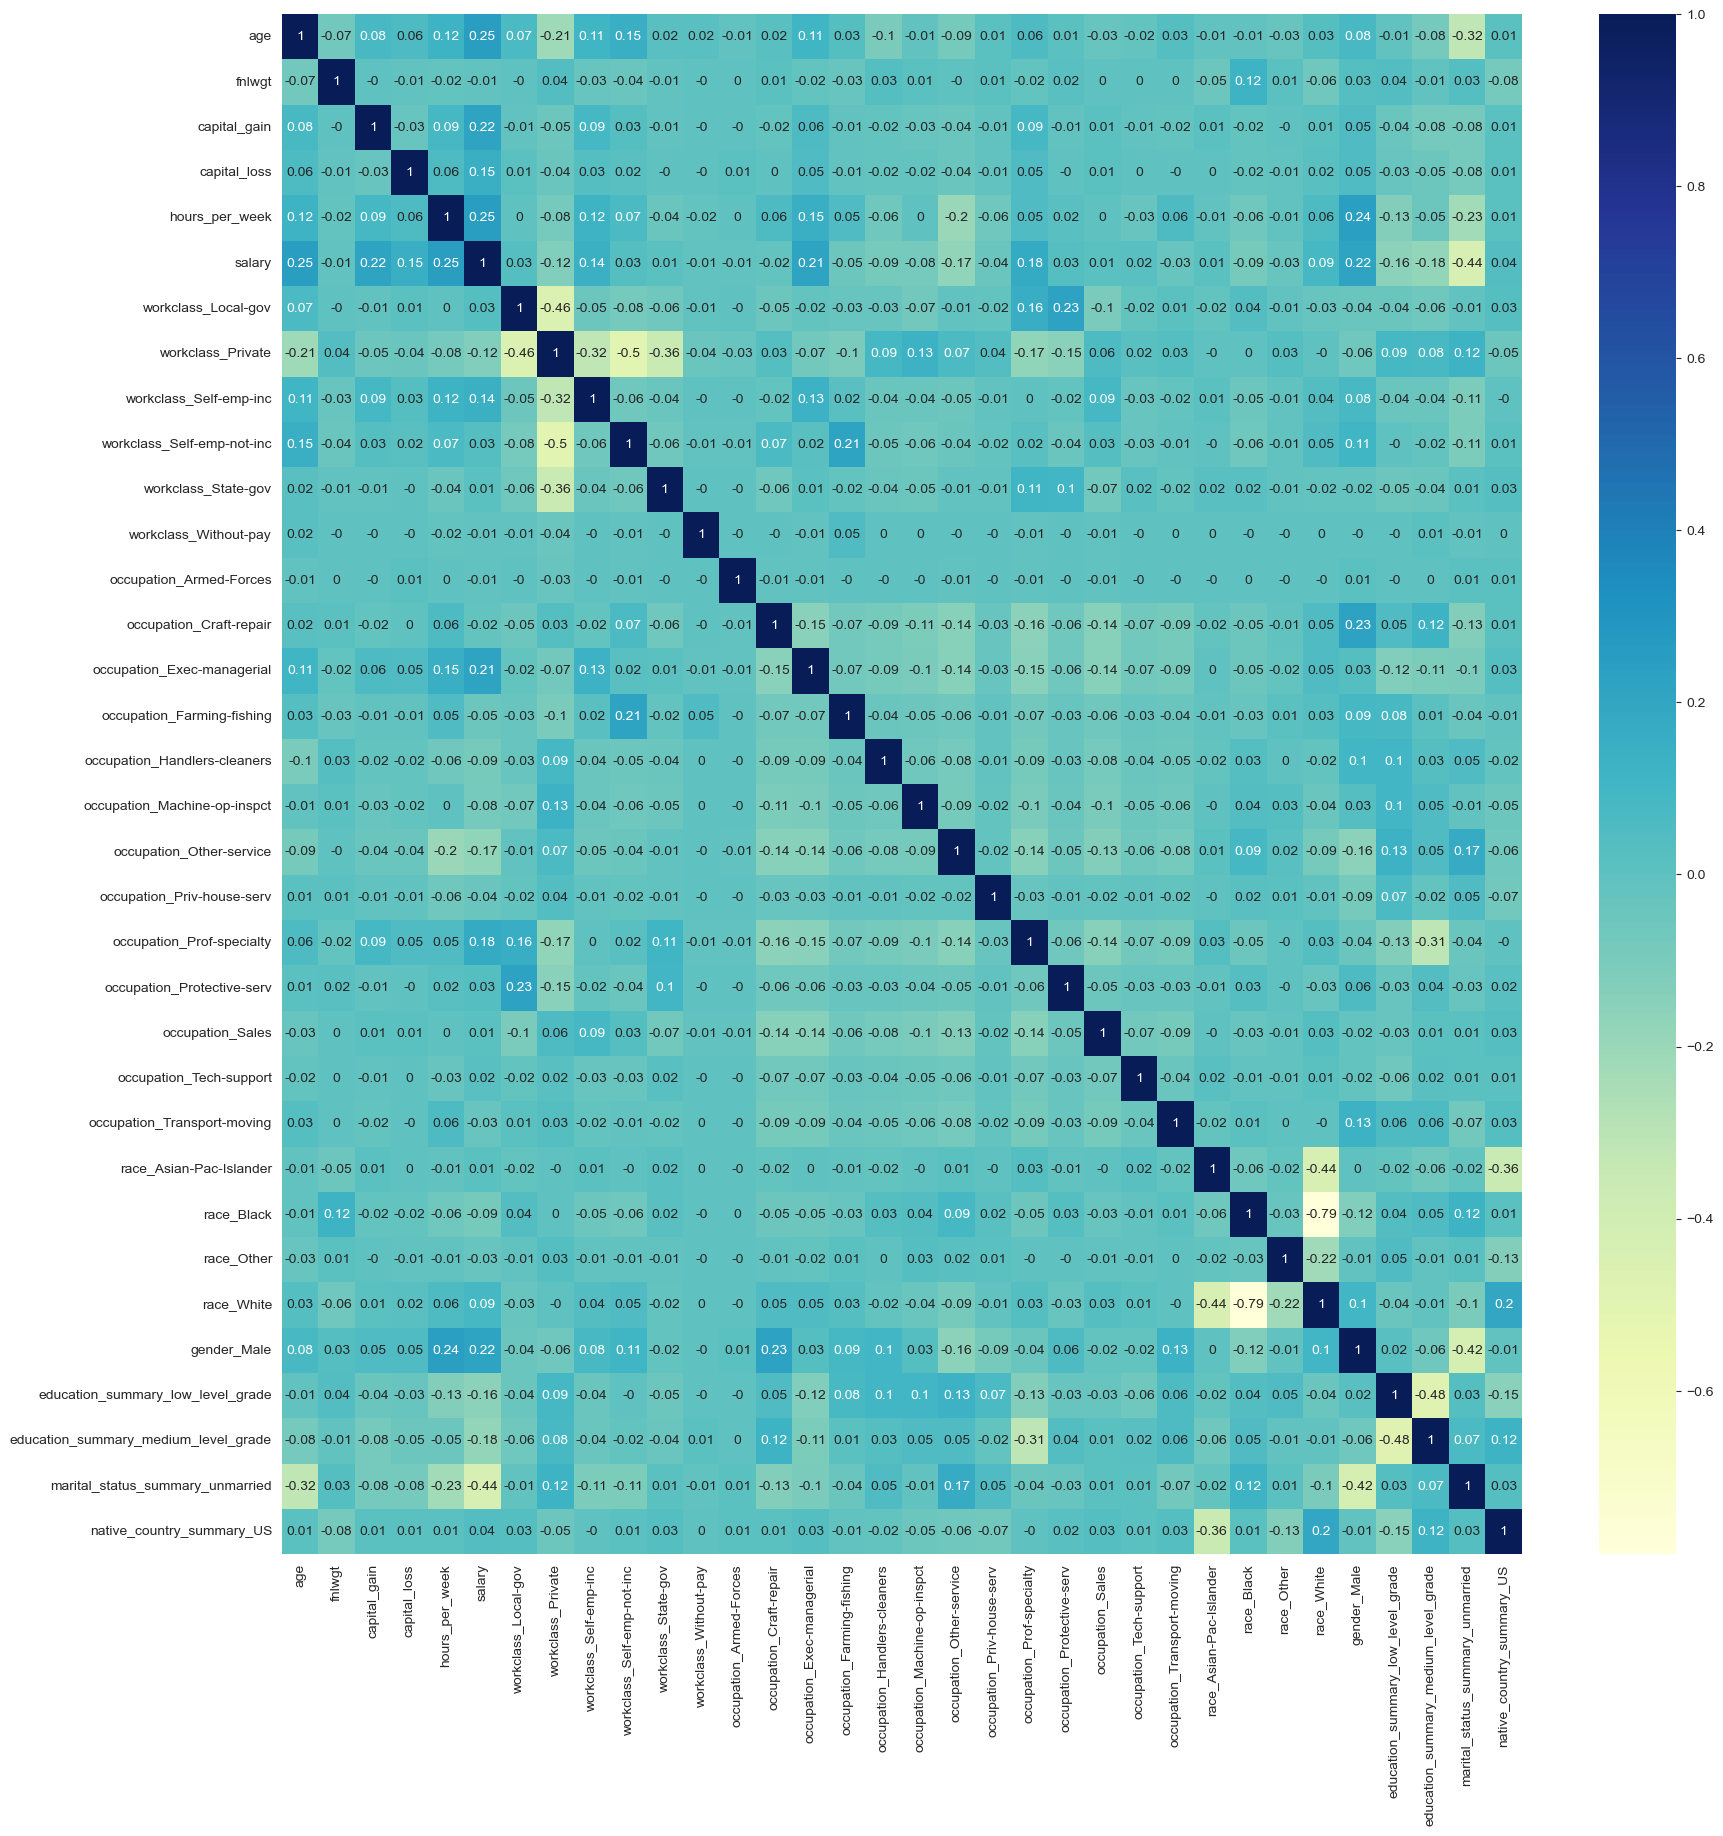

In [275]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_dummy.corr().round(2), annot=True, cmap="YlGnBu");

In [276]:
# 'salary' column whose location will be changed to the last position
target_column = df_dummy.pop('salary')
  
# insert column using insert(position,column_name, target_column) method
df_dummy.insert(33, 'salary', target_column)

In [277]:
df_dummy.columns

Index(['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week',
       'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White',
       'gender_Male', 'education_summary_low_level_grade',
       'education_summary_medium_level_grade',
       'marital_status_summary_unmarried', 'native_country_summary_US',
       'salary'],
      dtype='object')

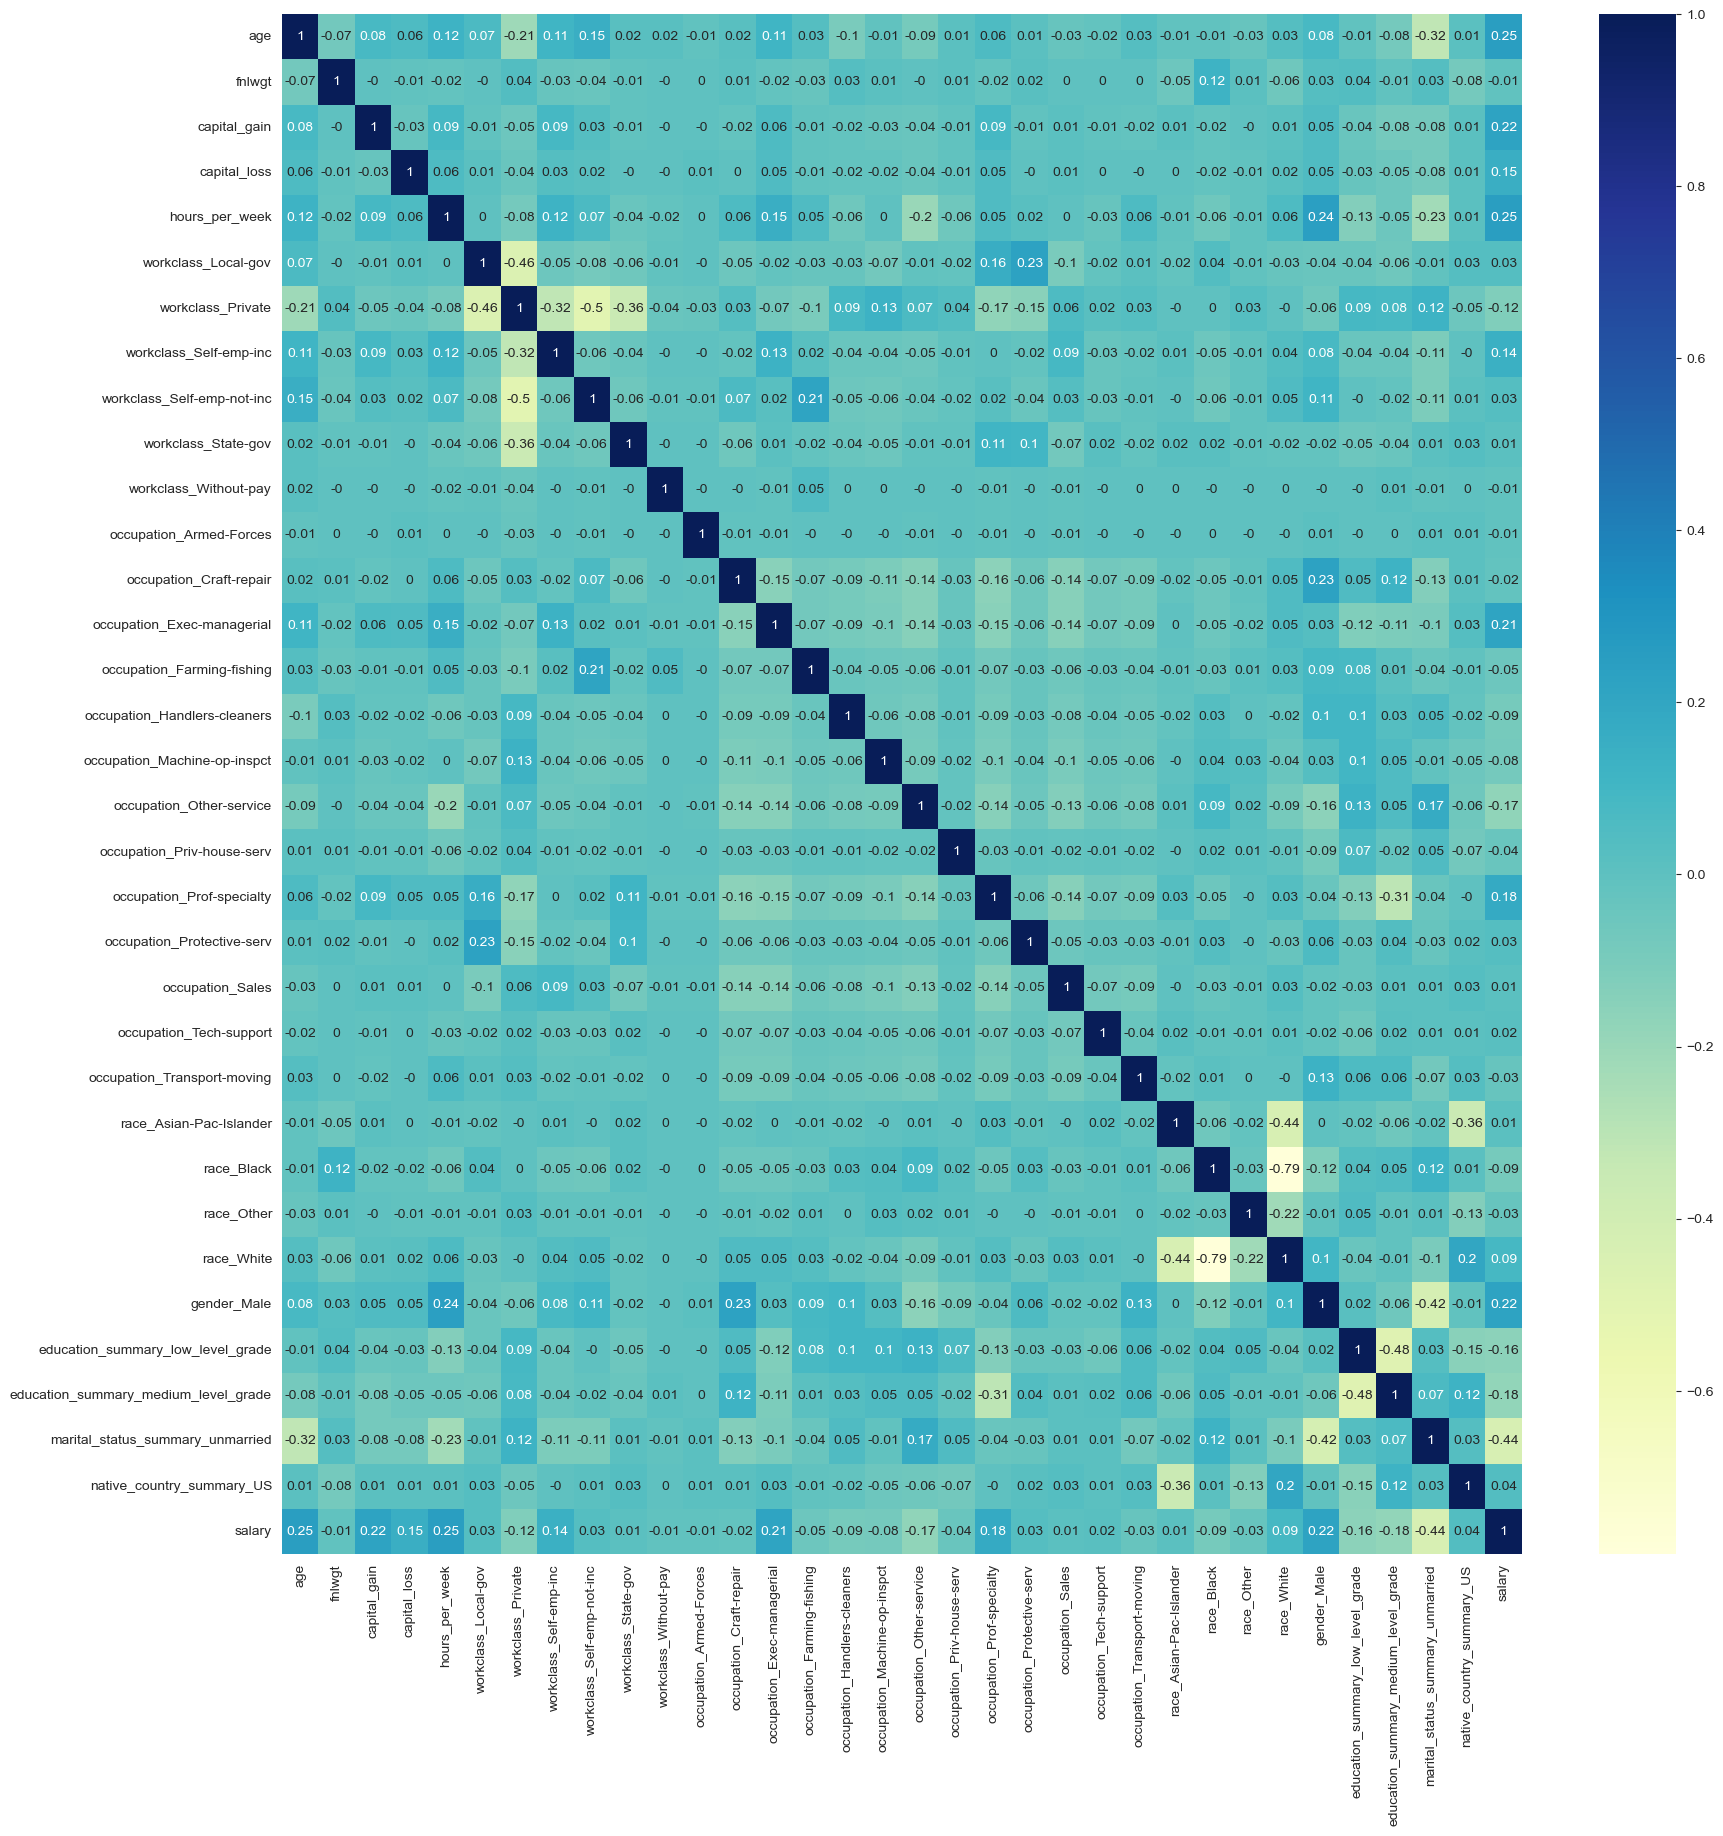

In [278]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_dummy.corr().round(2), annot=True, cmap="YlGnBu");

In [279]:
df_dummy_corr_salary = df_dummy.corr()[["salary"]].drop("salary").sort_values(by="salary", ascending=False)
df_dummy_corr_salary

salary
age                                    0.253
hours_per_week                         0.247
capital_gain                           0.222
gender_Male                            0.216
occupation_Exec-managerial             0.215
occupation_Prof-specialty              0.185
capital_loss                           0.152
workclass_Self-emp-inc                 0.138
race_White                             0.086
native_country_summary_US              0.035
workclass_Self-emp-not-inc             0.030
workclass_Local-gov                    0.029
occupation_Protective-serv             0.026
occupation_Tech-support                0.023
occupation_Sales                       0.015
race_Asian-Pac-Islander                0.012
workclass_State-gov                    0.011
occupation_Armed-Forces               -0.006
fnlwgt                                -0.010
workclass_Without-pay                 -0.012
occupation_Craft-repair               -0.021
occupation_Transport-moving           -0.029
race_Other                            -0.032
occupation_Priv-house-serv            -0.038
occupation_Farming-fishing            -0.054
occupation_Machine-op-inspct          -0.077
race_Black                            -0.091
occupation_Handlers-cleaners          -0.094
workclass_Private                     -0.121
education_summary_low_level_grade     -0.163
occupation_Other-service              -0.166
education_summary_medium_level_grade  -0.183
marital_status_summary_unmarried      -0.437

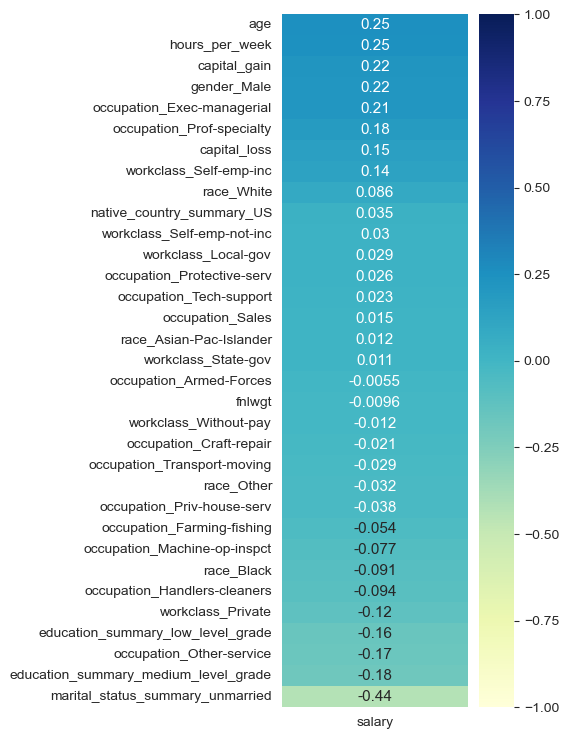

In [280]:
plt.figure(figsize = (3, 9))
sns.heatmap(df_dummy_corr_salary, 
            annot=True, 
            cmap="YlGnBu", 
            vmin=-1, 
            vmax=1, 
            annot_kws={"size": 11}, 
            cbar_kws={'shrink': 1})
plt.show()

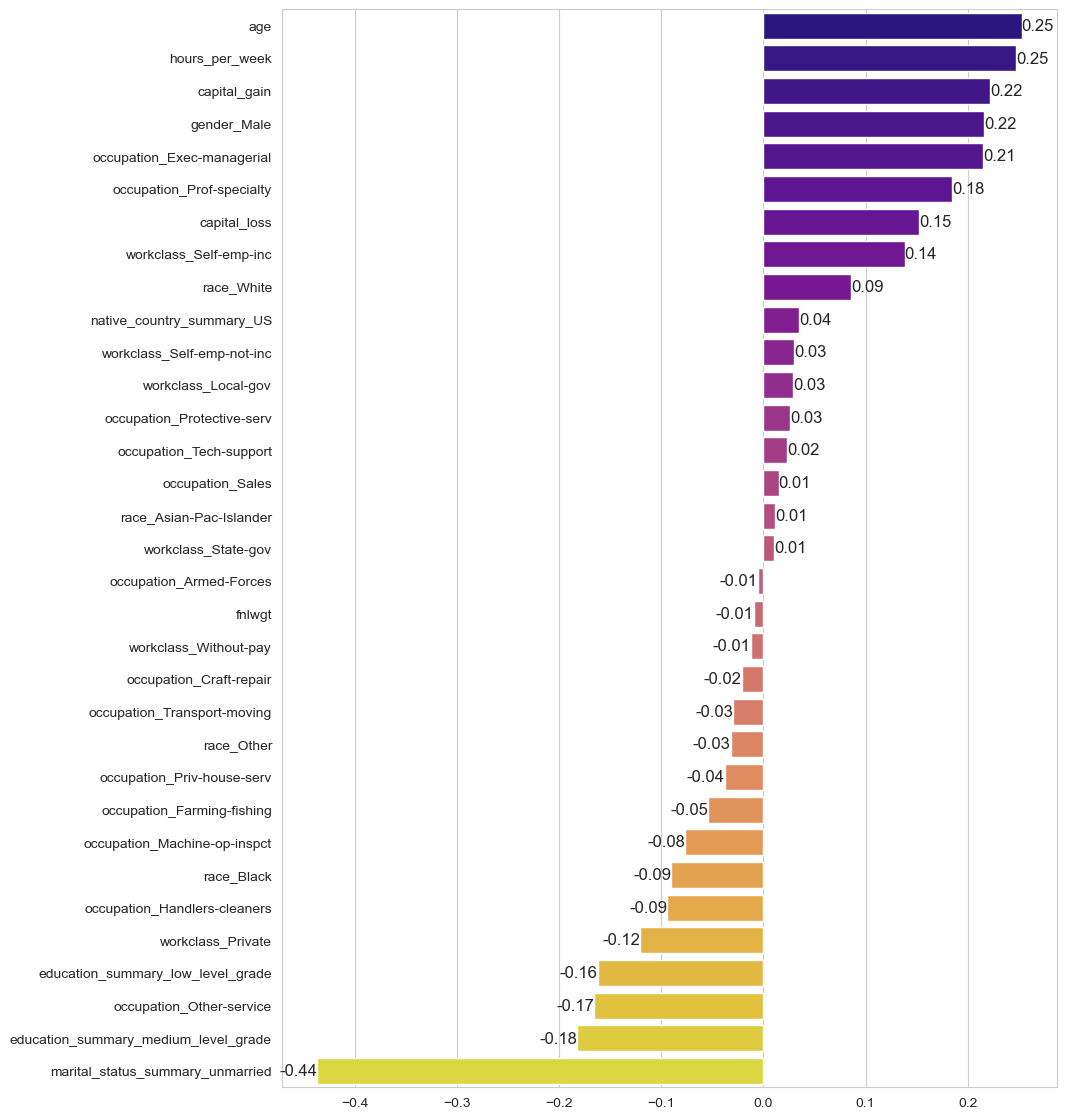

In [281]:
plt.figure(figsize = (10, 14))

ax = sns.barplot(x=df_dummy_corr_salary.values.flatten(), y=df_dummy_corr_salary.index, palette='plasma')

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", fontsize=12);

In [282]:
df_dummy.to_csv("adult_dummy.csv", index=False)

In [283]:
pd.read_csv('adult_dummy.csv')

age  fnlwgt  capital_gain  capital_loss  hours_per_week  \
0       39   77516          2174             0              40   
1       50   83311             0             0              13   
2       38  215646             0             0              40   
3       53  234721             0             0              40   
4       28  338409             0             0              40   
...    ...     ...           ...           ...             ...   
29949   27  257302             0             0              38   
29950   40  154374             0             0              40   
29951   58  151910             0             0              40   
29952   22  201490             0             0              20   
29953   52  287927         15024             0              40   

       workclass_Local-gov  workclass_Private  workclass_Self-emp-inc  \
0                        0                  0                       0   
1                        0                  0                       0   
2                        0                  1                       0   
3                        0                  1                       0   
4                        0                  1                       0   
...                    ...                ...                     ...   
29949                    0                  1                       0   
29950                    0                  1                       0   
29951                    0                  1                       0   
29952                    0                  1                       0   
29953                    0                  0                       1   

       workclass_Self-emp-not-inc  workclass_State-gov  workclass_Without-pay  \
0                               0                    1                      0   
1                               1                    0                      0   
2                               0                    0                      0   
3                               0                    0                      0   
4                               0                    0                      0   
...                           ...                  ...                    ...   
29949                           0                    0                      0   
29950                           0                    0                      0   
29951                           0                    0                      0   
29952                           0                    0                      0   
29953                           0                    0                      0   

       occupation_Armed-Forces  occupation_Craft-repair  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   
...                        ...                      ...   
29949                        0                        0   
29950                        0                        0   
29951                        0                        0   
29952                        0                        0   
29953                        0                        0   

       occupation_Exec-managerial  occupation_Farming-fishing  \
0                               0                           0   
1                               1                           0   
2                               0                           0   
3                               0                           0   
4                               0                           0   
...                           ...                         ...   
29949                           0                           0   
29950                           0                           0   
29951                           0                           0   
29952

## <p style="background-color:#18ffff; font-family:newtimeroman; color:#black; font-size:175%; text-align:center; border-radius:10px 10px;">The End of the Project </p>